### Telecom Churn Case Study
##### Problem Statement :

 - Telecommunications industry experiences an average of 15 - 25% annual churn rate. 
 
 - Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition.
 
- Here we are given with 3 months of data related to customer usage. In this case study, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
- Churn is predicted using two approaches. Usage based churn and Revenue based churn. Usage based churn:
- Customers who have zero usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
- This case study only considers usage based churn.
- In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.
- The dataset contains customer-level information for a span of four consecutive months - June, July, August. The months are encoded as 6, 7 and 8 respectively.

- The business objective is to predict the churn in the last (i.e. eighth) month using the data (features) from the first three months.

- This is a classification problem, where we need to predict whether the customers is about to churn or not. 

### Data Cleaning

 1. We have checked the number of columns, their data types, Null count and unique value_value_count to get some understanding about data and to check if the columns are under correct data-type. 
 
 2. Checked for missing values handling.
 
 3. Checking for duplicate records (rows) in the data. There were no duplicates.
 
 4. We have been given 3 months data. Since each months revenue and usage data is not related to other, we did month-wise drill down on missing values.
 
 5. We have found some columns with only one unique value, so it is of no use for the analysis, hence we have dropped those columns.
 
 6. Some columns had similar range of missing values. So, we have looked at their related columns and checked if these might be imputed.
 
 7. Correlation analysis has been performed.
 
 8. Outlier treatment has been performed. We have looked at the quantiles to understand the spread of Data.
 
 9. Our analysis is focused on the HVC(High value customers), we have filtered for high value customers to carryout the further analysis. The metric of this filtering of HVC is such that all the customers whose 'Average_rech_amt' of months 6 and 7 greater than or equal to 70th percentile of the 'Average_rech_amt' are considered as High Value Customers.
 
### Exploratory Data Analysis

 - The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'.
 
- Revenue generated by the Customers who are about to churn is very unstable.

- The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

- The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest.

- The Customers with decrease in rate of total_ic_mou in 7th month are more likely to churn, compared to the rest.

- Customers with stable usage of 2g volume throughout 6 and 7 months are less likely to churn.

- Customers with fall in usage of 2g volume in 7th month are more likely to Churn.

- Customers with stable usage of 3g volume throughout 6 and 7 months are less likely to churn.

- Customers with fall in consumption of 3g volume in 7th month are more likely to Churn.

- The customers with lower total_og_mou in 6th and 8th months are more likely to Churn compared to the ones with higher total_og_mou.

- The customers with lesser total_og_mou_8 and aon are more likely to churn compared to the one with higher total_og_mou_8 and aon.

- The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
The customers with total_ic_mou_8 > 2000 are very less likely to churn.

### Pre-processing Steps
1. Train-Test Split has been performed.
2. The data has high class-imbalance with the ratio of 0.095 (class 1 : class 0).
3. SMOTE technique has been used to overcome class-imbalance.

### Model Development for Churn Prediction

Our modeling approach aims to achieve two primary objectives:

#### Predict Churn:

Develop a predictive model to forecast whether high-value customers will churn in the near future (i.e., churn phase). This will enable the company to take proactive measures, such as offering special plans and discounts on recharge, to retain these customers.

#### Identify Key Predictors of Churn:

Create a model that identifies significant variables strongly associated with churn. These variables can provide insights into why customers opt to switch to other networks.
In some cases, both of these goals can be addressed with a single machine learning model. However, given the large number of attributes, it is advisable to employ dimensionality reduction techniques like Principal Component Analysis (PCA) before building a predictive model. After PCA, we can utilize various classification models.

Additionally, because churn rates are typically low (approximately 5-10%, resulting in class imbalance), we will employ techniques to handle this class imbalance effectively.

Here's a step-by-step guide to building the model:

1. Data Preprocessing:

    - Transform columns into appropriate formats.
    - Handle missing values and perform necessary data cleaning.
    

2.  Exploratory Analysis:

    - Conduct exploratory analysis to extract valuable insights that can be directly useful for business decisions or later for feature engineering.
    

3. Feature Engineering:

   - Create new features that could enhance the predictive power of the model.
   

4. Dimensionality Reduction:

   - Utilize PCA to reduce the number of variables while retaining essential information.
   

5. Model Training:

   - Train a range of machine learning models.
   - Tune model hyperparameters for optimal performance.
   - Implement techniques to address class imbalance effectively.
   

6. Model Evaluation:

   - Assess model performance using suitable evaluation metrics. Prioritize identifying   churners over non-churners accurately. Select an evaluation metric aligned with this business objective.
   

7. Model Selection:

   - Choose the best-performing model based on the selected evaluation metric.
   

For the second objective of identifying important predictor attributes:

1. Attribute Importance Model:

    - Build a separate model to identify essential predictor attributes related to churn.
      Consider logistic regression or tree-based models. Ensure multi-collinearity is       addressed in the case of logistic regression.
      
      
2. Visualization of Key Predictors:

   - Present the significant predictor attributes visually, using plots, summary tables, or other suitable means to convey their importance to the business.
   
   
3. Strategy Recommendation:

   - Based on the observations and insights from the model, recommend strategies to manage customer churn effectively. These strategies can help the company retain high-value customers and minimize churn.
   
   
By following these steps, we can create models that not only predict churn but also provide valuable insights into the key factors driving customer attrition. This, in turn, enables data-driven decision-making and effective customer retention strategies.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-case-study-hackathon-c53/data_dictionary.csv
/kaggle/input/telecom-churn-case-study-hackathon-c53/sample.csv
/kaggle/input/telecom-churn-case-study-hackathon-c53/starter-notebook - Labs 1.ipynb
/kaggle/input/telecom-churn-case-study-hackathon-c53/train.csv
/kaggle/input/telecom-churn-case-study-hackathon-c53/test.csv


#### Loading dependencies & datasets

In [2]:
#Importing required libraries
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display,HTML

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

!pip install sidetable
import sidetable

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, metrics
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import sensitivity_specificity_support

import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls

### Step 1:  Inspecting the Dataframes for understanding provided Train & Test data

In [3]:
#Reading Train Data file

data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c53/train.csv")

#Reading Test Data file

test = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c53/test.csv")

In [4]:
pd.set_option('display.max_columns',500)

In [5]:
pd.set_option('display.max_rows',500)

In [6]:
# Checking for Data in Train data file.
display(
    data.head(10)
)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   
5   5        109             0.0             0.0             0.0   
6   6        109             0.0             0.0             0.0   
7   7        109             0.0             0.0             0.0   
8   8        109             0.0             0.0             0.0   
9   9        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   
5            6/30/2014            7/31/2014            8/31/2014   86.193   
6            6/30/2014            7/31/2014            8/31/2014   54.173   
7            6/30/2014            7/31/2014            8/31/2014  167.861   
8            6/30/2014            7/31/2014            8/31/2014  163.550   
9            6/30/2014            7/31/2014            8/31/2014  101.984   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   
5   83.351   88.462         1.39         1.78         0.45         17.14   
6   95.130    6.386        38.81        40.56        19.61         31.63   
7  167.869  167.866         0.00         0.00         0.00          0.00   
8   90.250   51.726         0.00         0.00         0.00         47.81   
9  259.265   65.686        27.49       111.78        53.38        110.51   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00           0.00           0.00   
1         25.99         30.89           0.00           0.00           0.00   
2         82.05          0.00           0.00           0.00           0.00   
3         78.48         50.23           0.00           0.00           0.00   
4         38.11          9.63          53.64           0.00           0.00   
5         24.26          3.44           0.00           0.00           0.00   
6         54.18          5.69           0.00           0.00           0.00   
7          0.00          0.00           0.00           0.00           0.00   
8         50.88         21.74          28.26          11.31          47.81   
9        124.04         85.54           0.00           7.23           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              2.23   
1           0.00           0.00           0.00              0.00   
2           0.00           0.00           0.00              0.53   
3           0.00           0.00           1.63              6.99   
4          15.73           0.00           0.00             10.16   
5           0.00           0.00           0.00              1.39   
6           0.00           0.00           0.00             38.81   
7           0.00           0.00           0.00              0.00   
8          47.81          50.88          21.74              0.00   
9           0.00          32.2

In [7]:
#Checking for data in Testa data file.
display(
    test.head(10)
)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   
5  70004        109             0.0             0.0             0.0   
6  70005        109             0.0             0.0             0.0   
7  70006        109             0.0             0.0             0.0   
8  70007        109             0.0             0.0             0.0   
9  70008        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   
5            6/30/2014            7/31/2014            8/31/2014  134.798   
6            6/30/2014            7/31/2014            8/31/2014   41.890   
7            6/30/2014            7/31/2014            8/31/2014   52.177   
8            6/30/2014            7/31/2014            8/31/2014  273.082   
9            6/30/2014            7/31/2014            8/31/2014    0.000   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   
5   58.016    0.200        60.19        23.59          NaN         75.58   
6   20.120  129.610        13.13        12.34        33.33         22.54   
7   54.063   24.408         0.21         0.00         0.00         51.91   
8  298.166  256.839       290.08       165.11        68.04        158.28   
9  302.970   76.833          NaN        15.31          NaN           NaN   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   
5         26.68           NaN         123.31         121.19            NaN   
6          8.34         32.13           0.00           0.00           2.15   
7         49.31         21.21           0.00           0.00           0.00   
8        141.11         25.88           0.00           0.00           0.00   
9         46.81           NaN            NaN           0.00            NaN   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   
5         136.06          50.28            NaN              0.00   
6           0.00           0.00          19.45             13.13   
7           0.00           0.00           0.00              0.21   
8           0.00           0.00           0.00              4.01   


In [8]:
display(
    data.info(verbose=0, show_counts=True)
  
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


None

In [9]:
display(
    test.info(verbose=0, show_counts=True)
  
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


None

In [10]:
#display basic statistical information for train data
display(
    data.describe()
)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [11]:
#display basic statistical information for test data
display(
   test.describe()
)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  30000.000000    30000.0         29684.0         29684.0   
mean   84998.500000      109.0             0.0             0.0   
std     8660.398374        0.0             0.0             0.0   
min    69999.000000      109.0             0.0             0.0   
25%    77498.750000      109.0             0.0             0.0   
50%    84998.500000      109.0             0.0             0.0   
75%    92498.250000      109.0             0.0             0.0   
max    99998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29684.0  30000.000000  30000.000000  30000.000000  28831.000000   
mean              0.0    282.644348    279.355021    279.845167    130.629693   
std               0.0    314.560212    323.205370    326.437029    290.677420   
min               0.0   -185.043000  -2014.045000   -146.859000      0.000000   
25%               0.0     92.907500     87.504750     84.180500      7.280000   
50%               0.0    198.227500    191.775000    191.690500     34.760000   
75%               0.0    371.969250    365.250750    367.804750    117.170000   
max               0.0  10955.066000  13224.119000  13505.996000   6944.360000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  28828.000000  28325.000000  28831.000000  28828.000000  28325.000000   
mean     133.148632    133.111348    195.745473    196.792375    196.647889   
std      302.921820    301.951806    316.923836    333.628481    334.277643   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.540000     34.385000     32.110000     31.740000   
50%       32.550000     33.060000     95.830000     91.435000     92.810000   
75%      115.210000    117.730000    229.230000    224.972500    225.760000   
max     7411.010000   6723.790000   6962.460000   9667.130000  13547.840000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   28831.000000   28828.000000   28325.000000   28831.000000   
mean       10.380431       7.465889       7.967267      13.269785   
std        99.973352     103.337675      94.622596      66.475975   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13724.380000   15371.040000   13095.360000    2165.440000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   28828.000000   28325.000000      28831.000000      28828.000000   
mean        9.763957      10.440251         47.557601         47.188688   
std        58.325466      64.933372        150.588656        156.664295   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.650000          1.580000   
50%         0.000000       0.000000         11.930000         11.680000   
75%         0.000000       0.000000         41.410000         40.190000   
max      1878.860000    2860.510000       5878.530000       7163.210000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      28325.000000      28831.000000      28828.000000      28325.000000   
mean          46.359887         93.584273         92.793180         93.238288   
std          145.087354        164.481651        165.674188        164.516683   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.580000          9.770000          9.890000          9.740000   
50%           11.690000         41.010000         41.060000         40.440000   
75%           40.490000        110.330000        107.645000        108.680000   
max         6723.790000       4729

### Step 2: Data Cleansing Process -> Handling null & missing values

In [12]:
# check if any missing values are present in the data
data.isnull().sum().sum()

1835086

In [13]:
# display the column names that have missing values
data.columns[data.isnull().any()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=125)

In [14]:
# Checking information about data.
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


Datatype  Non_Null_Count  Null_Count  \
arpu_3g_6                 float64           17568       52431   
count_rech_2g_6           float64           17568       52431   
night_pck_user_6          float64           17568       52431   
arpu_2g_6                 float64           17568       52431   
date_of_last_rech_data_6   object           17568       52431   
total_rech_data_6         float64           17568       52431   
av_rech_amt_data_6        float64           17568       52431   
max_rech_data_6           float64           17568       52431   
count_rech_3g_6           float64           17568       52431   
fb_user_6                 float64           17568       52431   
night_pck_user_7          float64           17865       52134   
date_of_last_rech_data_7   object           17865       52134   
total_rech_data_7         float64           17865       52134   
max_rech_data_7           float64           17865       52134   
fb_user_7                 float64           17865       52134   
count_rech_2g_7           float64           17865       52134   
count_rech_3g_7           float64           17865       52134   
arpu_3g_7                 float64           17865       52134   
av_rech_amt_data_7        float64           17865       52134   
arpu_2g_7                 float64           17865       52134   
count_rech_2g_8           float64           18417       51582   
av_rech_amt_data_8        float64           18417       51582   
night_pck_user_8          float64           18417       51582   
max_rech_data_8           float64           18417       51582   
total_rech_data_8         float64           18417       51582   
arpu_2g_8                 float64           18417       51582   
arpu_3g_8                 float64           18417       51582   
date_of_last_rech_data_8   object           18417       51582   
fb_user_8                 float64           18417       51582   
count_rech_3g_8           float64           18417       51582   
isd_og_mou_8              float64           66296        3703   
std_ic_t2o_mou_8          float64           66296        3703   
std_og_t2c_mou_8          float64           66296        3703   
std_ic_t2f_mou_8          float64           66296        3703   
std_og_mou_8              float64           66296        3703   
std_ic_t2m_mou_8          float64           66296        3703   
std_ic_mou_8              float64           66296        3703   
std_ic_t2t_mou_8          float64           66296        3703   
og_others_8               float64           66296        3703   
spl_og_mou_8              float64           66296        3703   
loc_ic_t2m_mou_8          float64           66296        3703   
loc_ic_mou_8              float64           66296        3703   
loc_ic_t2f_mou_8          float64           66296        3703   
std_og_t2f_mou_8          float64           66296        3703   
loc_og_t2c_mou_8          float64           66296        3703   
ic_others_8               float64           66296        3703   
loc_og_mou_8              float64           66296        3703   
onnet_mou_8               float64           66296        3703   
offnet_mou_8              float64           66296        3703   
roam_ic_mou_8             float64           66296        3703   
roam_og_mou_8             float64           66296        3703   
loc_og_t2t_mou_8          float64           66296        3703   
loc_og_t2m_mou_8          float64           66296        3703   
loc_og_t2f_mou_8          float64           66296        3703   
std_og_t2m_mou_8          float64           66296        3703   
loc_ic_t2t_mou_8          float64           66296        3703   
isd_ic_mou_8              float64           66296        3703   
std_og_t2t_mou_8          float64           66296        3703   
spl_ic_mou_8              float64           66296        3703   
std_ic_t2m_mou_6          float64           67231        2768   
std_ic_t2t_mou_6          float64           67231        276

In [15]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

Null values in %
Feature names                             
arpu_3g_6                             74.9
count_rech_2g_6                       74.9
night_pck_user_6                      74.9
arpu_2g_6                             74.9
date_of_last_rech_data_6              74.9
total_rech_data_6                     74.9
av_rech_amt_data_6                    74.9
max_rech_data_6                       74.9
count_rech_3g_6                       74.9
fb_user_6                             74.9

In [16]:
## Dropping ID columns since all values are unique
## Dropping circle_id since all columns have value 109

data_v1 = data.drop(columns=['id','circle_id'])

#data_corr = data_v1

test_v1 = test.drop(columns=['id','circle_id'])

In [17]:
## No of rows which have the all null values

display("No of rows = {} which are having null values in all columns".format(data_v1.isnull().all(axis=1).sum()))

'No of rows = 0 which are having null values in all columns'

In [18]:
## No of colummns which have the all null values

display("No of columns = {} which have null values in all rows".format(data_v1.isnull().all(axis=0).sum()))

'No of columns = 0 which have null values in all rows'

In [19]:
# dropping columns which have null values in all the rows i.e. 100 % Null Values

data_v1.dropna(axis=1, how='all',inplace=True)
test_v1.dropna(axis=1, how='all',inplace=True)

In [20]:
# Check Duplicate Rows - No Duplicate rows found

duplicate = data_v1[data_v1.duplicated()]

display(duplicate)

Empty DataFrame
Columns: [loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ...]
Index: []

In [21]:
## Dropping columns since these columns have single value only : 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
## 'std_ic_t2o_mou_7','std_ic_t2o_mou_8

test_v1 = test_v1.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

data_v1 = data_v1.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [22]:
display(data_v1.shape)


## We are now having 69999 rows and 161 columns

(69999, 161)

In [23]:
# Check for dimensionaity in Test data file
display(test_v1.shape)

(30000, 160)

In [24]:
# Percentage of Missing Columns
pd.options.display.max_rows = None # This function is to display all rows
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou

In [25]:
#Check for separating categorical , continuous and date columns

cat_col = []
num_col = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

dt_col = cat_col

cat_col = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

num_col = [column for column in num_col if column not in cat_col]

print("No.of Numerical Columns: ",len(num_col))
print("No.of Categorical Columns: ",len(cat_col))
print("No.of Date related columns: ",len(dt_col))

No.of Numerical Columns:  134
No.of Categorical Columns:  18
No.of Date related columns:  9


In [26]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(data_v1.isnull().sum()/len(data_v1.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval

Null values in %
Feature names                             
total_rech_data_6                    74.90
arpu_2g_6                            74.90
date_of_last_rech_data_6             74.90
max_rech_data_6                      74.90
night_pck_user_6                     74.90
arpu_3g_6                            74.90
av_rech_amt_data_6                   74.90
fb_user_6                            74.90
count_rech_3g_6                      74.90
count_rech_2g_6                      74.90
count_rech_2g_7                      74.48
total_rech_data_7                    74.48
max_rech_data_7                      74.48
night_pck_user_7                     74.48
arpu_3g_7                            74.48
date_of_last_rech_data_7             74.48
av_rech_amt_data_7                   74.48
fb_user_7                            74.48
arpu_2g_7                            74.48
count_rech_3g_7                      74.48
night_pck_user_8                     73.69
fb_user_8                            73.69
date_of_last_rech_data_8             73.69
max_rech_data_8                      73.69
count_rech_2g_8                      73.69
arpu_3g_8                            73.69
count_rech_3g_8                      73.69
arpu_2g_8                            73.69
total_rech_data_8                    73.69
av_rech_amt_data_8                   73.69
std_og_mou_8                          5.29
loc_ic_t2f_mou_8                      5.29
spl_og_mou_8                          5.29
og_others_8                           5.29
loc_ic_t2t_mou_8                      5.29
loc_ic_t2m_mou_8                      5.29
std_ic_t2t_mou_8                      5.29
loc_ic_mou_8                          5.29
std_ic_t2m_mou_8                      5.29
std_ic_t2f_mou_8                      5.29
spl_ic_mou_8                          5.29
isd_ic_mou_8                          5.29
ic_others_8                           5.29
isd_og_mou_8                          5.29
std_ic_mou_8                          5.29
loc_og_t2c_mou_8                      5.29
std_og_t2f_mou_8                      5.29
loc_og_t2m_mou_8                      5.29
std_og_t2m_mou_8                      5.29
loc_og_mou_8                          5.29
loc_og_t2t_mou_8                      5.29
std_og_t2t_mou_8                      5.29
roam_og_mou_8                         5.29
loc_og_t2f_mou_8                      5.29
roam_ic_mou_8                         5.29
offnet_mou_8                          5.29
onnet_mou_8                           5.29
ic_others_6                           3.95
spl_ic_mou_6                          3.95
loc_og_mou_6                          3.95
std_ic_mou_6                          3.95
isd_ic_mou_6                          3.95
isd_og_mou_6                          3.95
loc_og_t2m_mou_6                      3.95
loc_og_t2c_mou_6                      3.95
loc_og_t2f_mou_6                      3.95
loc_og_t2t_mou_6                      3.95
roam_og_mou_6                         3.95
roam_ic_mou_6                         3.95
offnet_mou_6                          3.95
onnet_mou_6                           3.95
std_ic_t2f_mou_6                      3.95
loc_ic_mou_6                          3.95
std_ic_t2t_mou_6                      3.95
std_og_mou_6                          3.95
loc_ic_t2t_mou_6                      3.95
std_og_t2m_mou_6                      3.95
std_ic_t2m_mou_6                      3.95
loc_ic_t2f_mou_6                      3.95
og_others_6                           3.95
std_og_t2f_mou_6                      3.95
loc_ic_t2m_mou_6                      3.95
spl_og_mou_6                          3.95
std_og_t2t_mou_6                      3.95
loc_og_t2t_mou_7                      3.84
loc_og_t2m_mou_7                      3.84
loc_ic_t2t_mou_7                      3.84
loc_ic_t2m_mou_7                      3.84
loc_og_t2f_mou_7                      3.84
std_ic_t2m_mou_7                      3.84
roam_og_mou_7                         3.84
std_og_t2f_mou_7           

## Missing Data Analysis ##

#### Observations:
###### 1. Drop 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7','arpu_2g_8' since percentage of missing values are more than 70 %
###### 2. Replacing null values for below categorical variables with -1 considering no recharge has been made
 - 'night_pck_user_6', 'night_pck_user_8', 'night_pck_user_7','monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
 - 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7','monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
 - 'fb_user_6', 'fb_user_7', 'fb_user_8'

###### 3. Based on the analysis imputing null values in recharge_amount_columns list with 0 considereing no recharge has been made by the customer.
Also we can see that the min value of the recharge amount columns is 1

- 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'

###### 4. Imputing Count recharge columns with zero considering no recharge has been made by the customer

- 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

##### 5. Dropping below date columns since it will not be in use much and for other date columns we will be calculating age
- 'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8'

##### 6. Replacing Missing age data with -1 considering no recharge has been made by the user
- date_of_last_rech_6age date_of_last_rech_7age date_of_last_rech_8age

##### 7. For other Continuous columns missing values has been replaced with median since we have outliers

In [27]:
# Replacing null values for below categorical variables with -1 considering no recharge has been made

data_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
data_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
data_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
data_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
data_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
data_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

test_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
test_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
test_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
test_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
test_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
test_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

In [28]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9 in train data set
print("Correlation table for month 6\n\n", data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.930150            0.805494
arpu_2g_6            0.930150   1.000000            0.833773
av_rech_amt_data_6   0.805494   0.833773            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000    0.93443            0.799627
arpu_2g_7            0.934430    1.00000            0.815300
av_rech_amt_data_7   0.799627    0.81530            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.923875            0.786412
arpu_2g_8            0.923875   1.000000            0.800717
av_rech_amt_data_8   0.786412   0.800717            1.000000


In [29]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9 in test data set
print("Correlation table for month 6\n\n", test[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", test[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", test[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.937367            0.819683
arpu_2g_6            0.937367   1.000000            0.834719
av_rech_amt_data_6   0.819683   0.834719            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.921016            0.788083
arpu_2g_7            0.921016   1.000000            0.817526
av_rech_amt_data_7   0.788083   0.817526            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.927589            0.789041
arpu_2g_8            0.927589   1.000000            0.817402
av_rech_amt_data_8   0.789041   0.817402            1.000000


##### Observations:
 - From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 8 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 8 respectively.
 
- Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*

In [30]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
data_v1.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1,inplace=True)

test_v1.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1,inplace=True)

print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")




The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [31]:
# Handling Missing Values Recharge Columns : 

recharge_amount_columns = data.columns[data.columns.str.contains('av_rech|total_rech_data|max_rech_data|amt_data')]

recharge_amount_columns


display(
    data_v1[recharge_amount_columns].describe()
)



total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       17568.000000       17865.000000       18417.000000   
mean            2.467612           2.679989           2.652441   
std             2.794610           3.073472           3.101265   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           2.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  \
count     17568.000000     17865.000000     18417.000000        17568.000000   
mean        126.500000       126.402071       125.374925          192.831096   
std         109.352573       109.459266       109.648799          190.623115   
min           1.000000         1.000000         1.000000            1.000000   
25%          25.000000        25.000000        25.000000           82.000000   
50%         145.000000       145.000000       145.000000          154.000000   
75%         177.000000       177.000000       179.000000          252.000000   
max        1555.000000      1555.000000      1555.000000         5920.000000   

       av_rech_amt_data_7  av_rech_amt_data_8  
count        17865.000000        18417.000000  
mean           201.455940          196.815792  
std            198.346141          192.280532  
min              1.000000            1.000000  
25%             92.000000           84.000000  
50%            154.000000          154.000000  
75%            252.000000          252.000000  
max           4365.000000         4076.000000

In [32]:
#Replacing null value with 0 for all recharge amount columns assuming no recharge has been made. As its amount column, better to keep value 0 for further analysis
rchrg_amt_col=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

for column in rchrg_amt_col:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

In [33]:
# Check % of missing values after the replacing
round(100 * data_v1[rchrg_amt_col].isnull().sum()/len(data_v1.index),2)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [34]:
# Imputing Count recharge columns with 0 considering no recharge has been made by the customer

count_col = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']

for column in count_col:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

# Re-check % of missing values after the imputation
round(100 * data_v1[count_col].isnull().sum()/len(data_v1.index),2)

count_rech_2g_6    0.0
count_rech_2g_7    0.0
count_rech_2g_8    0.0
count_rech_3g_6    0.0
count_rech_3g_7    0.0
count_rech_3g_8    0.0
dtype: float64

In [35]:
#Dropping below date columns since it will not be in use much and for other date columns we will be calculating age
# 'last_date_of_month_6',
#  'last_date_of_month_7',
#  'last_date_of_month_8'

data_v1 = data_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)
test_v1 = test_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)
data_corr = data_v1

In [36]:
dt_col.remove('last_date_of_month_6')
dt_col.remove('last_date_of_month_7')
dt_col.remove('last_date_of_month_8')

In [37]:
test_v1[dt_col].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/26/2014           8/24/2014   
1           6/19/2014           7/16/2014           8/24/2014   
2           6/29/2014           7/27/2014           8/28/2014   
3           6/25/2014           7/30/2014           8/24/2014   
4           6/29/2014           7/29/2014           8/30/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                      NaN                      NaN                      NaN  
1                      NaN                      NaN                      NaN  
2                      NaN                      NaN                      NaN  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [38]:
test_v1.shape


(30000, 151)

In [39]:
data_v1.shape

(69999, 152)

In [40]:
# Handling date columns 
# Replacing Missing age data with -1 considering no recharge has been made by the user

for column in dt_col:
    colstr = column + 'age'
    display(colstr)
    data_v1[column] = pd.to_datetime(data_v1[column])
    data_v1[colstr] = data_v1[column].max() - data_v1[column]
    data_v1[colstr] = data_v1[colstr].dt.days
    data_v1 = data_v1.drop(columns=column,axis=1)
    data_v1[colstr] = data_v1[colstr].fillna(-1)
    

for column in dt_col:
    colstr = column + 'age'
    display(colstr)
    test_v1[column] = pd.to_datetime(test_v1[column])
    test_v1[colstr] = test_v1[column].max() - test_v1[column]
    test_v1[colstr] = test_v1[colstr].dt.days
    test_v1 = test_v1.drop(columns=column,axis=1)
    test_v1[colstr] = test_v1[colstr].fillna(-1)

'date_of_last_rech_6age'

'date_of_last_rech_7age'

'date_of_last_rech_8age'

'date_of_last_rech_data_6age'

'date_of_last_rech_data_7age'

'date_of_last_rech_data_8age'

'date_of_last_rech_6age'

'date_of_last_rech_7age'

'date_of_last_rech_8age'

'date_of_last_rech_data_6age'

'date_of_last_rech_data_7age'

'date_of_last_rech_data_8age'

In [41]:
#Check for separating categorical , continuous and date columns

cat_col = []
num_col = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

dt_col = cat_col

cat_col = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

num_col = [column for column in num_col if column not in cat_col]

print("No.of Numerical Columns: ",len(num_col))
print("No.of Categorical Columns: ",len(cat_col))
print("No.of Date related columns: ",len(dt_col))

No.of Numerical Columns:  134
No.of Categorical Columns:  18
No.of Date related columns:  0


In [42]:
data_v1[num_col].describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
mean     283.134365    278.185912    278.858826    133.153275    133.894438   
std      334.213918    344.366927    351.924315    299.963093    311.277193   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      7.410000      6.675000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    119.390000    115.837500   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
mean     132.978257    198.874771    197.153383    196.543577       9.765435   
std      311.896596    316.818355    322.482226    324.089234      57.374429   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.410000     34.860000     32.240000     31.575000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      115.060000    232.990000    227.630000    229.345000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   67312.000000   66296.000000   67231.000000   67312.000000   
mean        7.014568       7.004892      14.186457       9.842191   
std        55.960985      53.408135      73.469261      58.511894   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   66296.000000      67231.000000      67312.000000      66296.000000   
mean        9.771783         46.904854         46.166503         45.686109   
std        64.618388        150.971758        154.739002        153.716880   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.650000          1.610000   
50%         0.000000         11.910000         11.580000         11.740000   
75%         0.000000         40.740000         39.760000         39.895000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean          93.238231         90.799240         91.121447          3.743179   
std          162.046699        153.852597        152.997805         13.319542   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.920000         10.090000          9.830000          0.000000   
50%           41.030000         40.170000         40.350000          0.000000   
75%          110.430000        107.540000        109.245000          2.060000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean           3.777031          3.661652          1.126025          1.361052   
std           13.568110         13.009193          5.741811          7.914113   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [43]:
# Missing Value data treatment onnet_mou
onnet_mou = data_v1.columns[data_v1.columns.str.contains('onnet_mou')]

#Replacing the values with median since we have outliers here

for column in onnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [44]:
# Missing Value data treatment offnet_mou
offnet_mou = data_v1.columns[data_v1.columns.str.contains('offnet_mou')]

#Replacing the values with median since we have outliers here

for column in offnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())


In [45]:
# Missing Value data treatment roaming
roam_col = data_v1.columns[data_v1.columns.str.contains('roam')]

#Replacing the values with median since we have outliers here

for column in roam_col:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [46]:
# Missing Value data treatment loc
local_calls = data_v1.columns[data_v1.columns.str.contains('loc')]

#Replacing the values with median since we have outliers here

for column in local_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [47]:
# Missing Value data treatment std
std_calls = data_v1.columns[data_v1.columns.str.contains('std')]

#Replacing the values with median since we have outliers here

for column in std_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [48]:
# Missing Value data treatment isd
isd_calls = data_v1.columns[data_v1.columns.str.contains('isd')]

# #Replacing the values with median since we have outliers here

for column in isd_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [49]:
# Missing Value data treatment spl
spl_list = data_v1.columns[data_v1.columns.str.contains('spl')]

# #Replacing the values with median since we have outliers here

for column in spl_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [50]:
# Missing Value data treatment other
other_list = data_v1.columns[data_v1.columns.str.contains('other')]

# #Replacing the values with median since we have outliers here

for column in other_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(test_v1[column].median())

In [51]:
# Re-check  for existence of null values
display(data_v1.isnull().sum())

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [52]:
#check the percentage of missing data after imputing values
nullval = pd.DataFrame(round(data_v1.isnull().sum()/len(data_v1.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval

Null values in %
Feature names                                
arpu_6                                    0.0
total_rech_data_8                         0.0
max_rech_amt_7                            0.0
max_rech_amt_8                            0.0
last_day_rch_amt_6                        0.0
last_day_rch_amt_7                        0.0
last_day_rch_amt_8                        0.0
total_rech_data_6                         0.0
total_rech_data_7                         0.0
max_rech_data_6                           0.0
arpu_7                                    0.0
max_rech_data_7                           0.0
max_rech_data_8                           0.0
count_rech_2g_6                           0.0
count_rech_2g_7                           0.0
count_rech_2g_8                           0.0
count_rech_3g_6                           0.0
count_rech_3g_7                           0.0
max_rech_amt_6                            0.0
total_rech_amt_8                          0.0
total_rech_amt_7                          0.0
total_rech_amt_6                          0.0
total_ic_mou_6                            0.0
total_ic_mou_7                            0.0
total_ic_mou_8                            0.0
spl_ic_mou_6                              0.0
spl_ic_mou_7                              0.0
spl_ic_mou_8                              0.0
isd_ic_mou_6                              0.0
isd_ic_mou_7                              0.0
isd_ic_mou_8                              0.0
ic_others_6                               0.0
ic_others_7                               0.0
ic_others_8                               0.0
total_rech_num_6                          0.0
total_rech_num_7                          0.0
total_rech_num_8                          0.0
count_rech_3g_8                           0.0
av_rech_amt_data_6                        0.0
av_rech_amt_data_7                        0.0
monthly_3g_8                              0.0
sachet_3g_7                               0.0
sachet_3g_8                               0.0
fb_user_6                                 0.0
fb_user_7                                 0.0
fb_user_8                                 0.0
aon                                       0.0
aug_vbc_3g                                0.0
jul_vbc_3g                                0.0
jun_vbc_3g                                0.0
churn_probability                         0.0
date_of_last_rech_6age                    0.0
date_of_last_rech_7age                    0.0
date_of_last_rech_8age                    0.0
date_of_last_rech_data_6age               0.0
date_of_last_rech_data_7age               0.0
sachet_3g_6                               0.0
monthly_3g_7                              0.0
av_rech_amt_data_8                        0.0
monthly_3g_6                              0.0
vol_2g_mb_6                               0.0
vol_2g_mb_7                               0.0
vol_2g_mb_8                               0.0
vol_3g_mb_6                               0.0
vol_3g_mb_7                               0.0
vol_3g_mb_8                               0.0
night_pck_user_6                          0.0
night_pck_user_7                          0.0
night_pck_user_8                          0.0
monthly_2g_6                              0.0
monthly_2g_7                              0.0
monthly_2g_8                              0.0
sachet_2g_6                               0.0
sachet_2g_7                               0.0
sachet_2g_8                               0.0
std_ic_mou_8                              0.0
std_ic_mou_7                              0.0
std_ic_mou_6                              0.0
loc_og_t2m_mou_7                          0.0
loc_og_t2f_mou_6                          0.0
loc_og_t2f_mou_7                          0.0
loc_og_t2f_mou_8                          0.0
loc_og_t2c_mou_6                          0.0
loc_og_t2c_mou_7                          0.0
loc_og_t2c_mou_8                          0.0
loc_og_mou_6               

In [53]:
display ("Rows     : " ,data_v1.shape[0])
display ("Columns  : " ,data_v1.shape[1])
display ("Features : " ,data_v1.columns.tolist())
display ("Missing values :  ", data_v1.isnull().sum().values.sum())
display ("Unique values :  ",data_v1.nunique())

'Rows     : '

69999

'Columns  : '

152

'Features : '

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'Missing values :  '

0

'Unique values :  '

arpu_6                         61615
arpu_7                         61425
arpu_8                         60194
onnet_mou_6                    20057
onnet_mou_7                    20076
onnet_mou_8                    19726
offnet_mou_6                   26254
offnet_mou_7                   26140
offnet_mou_8                   25996
roam_ic_mou_6                   5306
roam_ic_mou_7                   4240
roam_ic_mou_8                   4252
roam_og_mou_6                   6568
roam_og_mou_7                   5305
roam_og_mou_8                   5215
loc_og_t2t_mou_6               11491
loc_og_t2t_mou_7               11359
loc_og_t2t_mou_8               11296
loc_og_t2m_mou_6               17848
loc_og_t2m_mou_7               17642
loc_og_t2m_mou_8               17617
loc_og_t2f_mou_6                3376
loc_og_t2f_mou_7                3365
loc_og_t2f_mou_8                3311
loc_og_t2c_mou_6                1945
loc_og_t2c_mou_7                2103
loc_og_t2c_mou_8                2204
l

In [54]:
#Check statistical info on modified data
data_v1[num_col].describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    129.236765    129.993840   
std      334.213918    344.366927    351.924315    294.605405    305.867956   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      8.060000      7.260000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     127.641721    194.825731    193.112523    191.002562       9.379276   
std      304.373330    311.131642    316.878225    316.270571      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        7.360000     36.880000     33.980000     34.390000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.521038         44.838857         43.890335   
std        62.923987        148.113736        151.885403        149.788556   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.930000          1.880000          1.950000   
50%         0.000000         11.910000         11.580000         11.740000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          91.173739         88.855772         88.435599          3.595161   
std          159.135994        151.184002        149.328982         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%           10.830000         10.935000         11.140000          0.000000   
50%           41.030000         40.170000         40.350000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [55]:
display ("Rows     : " ,test_v1.shape[0])
display ("Columns  : " ,test_v1.shape[1])
display ("Features : " ,test_v1.columns.tolist())
display ("Missing values :  ", test_v1.isnull().sum().values.sum())
display ("Unique values :  ",test_v1.nunique())

'Rows     : '

30000

'Columns  : '

151

'Features : '

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'Missing values :  '

0

'Unique values :  '

arpu_6                         27493
arpu_7                         27406
arpu_8                         26871
onnet_mou_6                    12283
onnet_mou_7                    12177
onnet_mou_8                    12054
offnet_mou_6                   16382
offnet_mou_7                   16152
offnet_mou_8                   16005
roam_ic_mou_6                   3072
roam_ic_mou_7                   2489
roam_ic_mou_8                   2523
roam_og_mou_6                   3661
roam_og_mou_7                   3014
roam_og_mou_8                   2933
loc_og_t2t_mou_6                7707
loc_og_t2t_mou_7                7639
loc_og_t2t_mou_8                7512
loc_og_t2m_mou_6               11835
loc_og_t2m_mou_7               11762
loc_og_t2m_mou_8               11600
loc_og_t2f_mou_6                2325
loc_og_t2f_mou_7                2359
loc_og_t2f_mou_8                2302
loc_og_t2c_mou_6                1403
loc_og_t2c_mou_7                1540
loc_og_t2c_mou_8                1557
l

 ###  Step 3: Analysis and handling of Outliers

In [56]:
# Looking at quantiles from 0.90 to 1. 
data_v1.quantile(np.arange(0.9,1.01,0.01)).style.bar()

In [57]:
# Looking at percentage change in quantiles from 0.90 to 1. 
data_v1.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

In [58]:
# Columns with outliers 
pct_change_99_1 = data_v1.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [59]:
#Removing age column from outliers treatment
col = ['churn_probability','date_of_last_rech_data_6age', 'date_of_last_rech_data_7age', 'date_of_last_rech_8age', 'date_of_last_rech_6age', 'date_of_last_rech_data_8age', 'date_of_last_rech_7age']

for i in col:
    num_col.remove(i)

In [60]:
# Handling Continuous variable - Outlier Analysis

outliers = []
out_cols = num_col
out_summary = []

for i in out_cols:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    if ((data_v1[i].min() < lower_bound) or (data_v1[i].max() > upper_bound)):
        out_summary.append("attribute \"{}\" with min value : {} -> max value : {} -> IQR {} -> lower_bound : {} match is {} -> upper_bound : {} match is {}".format(i,data_v1[i].min(),data_v1[i].max(),IQR,Q1-1.5*IQR,(data_v1[i].min() < lower_bound),Q3+1.5*IQR,data_v1[i].max() > upper_bound))
        outliers.append(i)


# List of outliers satisfying lower or upper bound        
for i in range(0,len(out_summary)):
    print("\nOutlier column with stats : \n\n{}\n".format(out_summary[i]))
    

#Outliers Treatment

for i in outliers:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    data_v1[i][data_v1[i]<=lower_bound] = lower_bound
    data_v1[i][data_v1[i]>=upper_bound] = upper_bound
    test_v1[i][test_v1[i]<=lower_bound] = lower_bound
    test_v1[i][test_v1[i]>=upper_bound] = upper_bound

print(outliers)

print("After outliers treatment\n\n",data_v1[out_cols].describe())


Outlier column with stats : 

attribute "arpu_6" with min value : -2258.709 -> max value : 27731.088 -> IQR 830.5226999999998 -> lower_bound : -1244.2840499999998 match is True -> upper_bound : 2077.8067499999997 match is True


Outlier column with stats : 

attribute "arpu_7" with min value : -1289.715 -> max value : 35145.834 -> IQR 822.3176999999982 -> lower_bound : -1232.5575499999973 match is True -> upper_bound : 2056.7132499999957 match is True


Outlier column with stats : 

attribute "arpu_8" with min value : -945.808 -> max value : 33543.624 -> IQR 828.4646999999983 -> lower_bound : -1242.6970499999975 match is False -> upper_bound : 2071.1617499999957 match is True


Outlier column with stats : 

attribute "onnet_mou_6" with min value : 0.0 -> max value : 7376.71 -> IQR 598.5999999999991 -> lower_bound : -897.8999999999987 match is False -> upper_bound : 1496.4999999999977 match is True


Outlier column with stats : 

attribute "onnet_mou_7" with min value : 0.0 -> max valu

 ###  Step 4: Evaluating Derived columns
  - calculate total data recharge amount
  - Filter High-Value Customers

In [61]:
display(data_v1.head())

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00             0.000   
1              0.00              0.00             17.65            18.725   
2              0.00              2.14              0.00             0.000   
3              0.00              0.00              0.00             8.030   
4              5.01              0.00              9.85             0.000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               0.0   

   std_og_mou_6  

In [62]:
# Temporary Data frame for retaining "High valued" customer data
data_v2 = data_v1

In [63]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
data_v2['tenure'] = (data_v2['aon']/30).round(0)

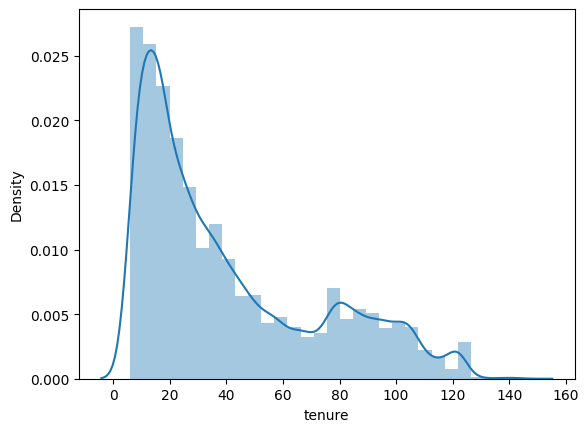

In [64]:
# Checking the distribution of tenure variable

sb.distplot(data_v2['tenure'],bins=30)
plt.show()

In [65]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_v2['tenure_range'] = pd.cut(data_v2['tenure'], tn_range, labels=tn_label)
data_v2['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

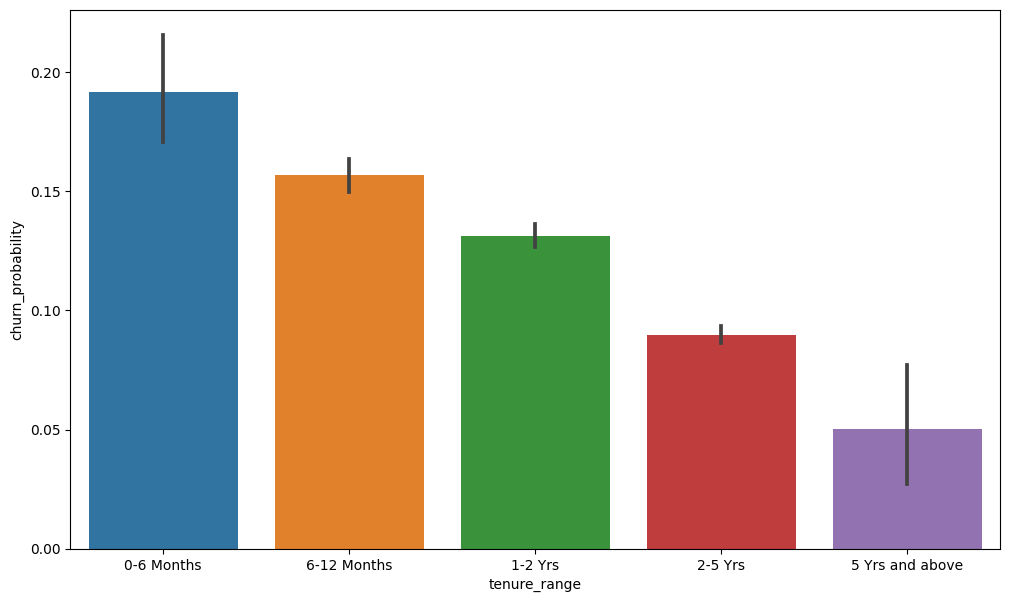

In [66]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sb.barplot(x='tenure_range',y='churn_probability', data=data_v1)
plt.show()

##### Observation(s):

 - It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.
 
 - The average revenue per user of good phase for customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [67]:
data_v1 = data_v1.drop(columns = ['tenure','tenure_range'])


In [68]:
data_v1.shape

(69999, 152)

In [69]:
# calculate the total data recharge amount for June and July 

data_v1['total_data_rech_6'] = data_v1.total_rech_data_6 * data_v1.av_rech_amt_data_6
data_v1['total_data_rech_7'] = data_v1.total_rech_data_7 * data_v1.av_rech_amt_data_7

In [70]:
# calculate total recharge amount for June and July 
data_v1['amt_data_6'] = data_v1.total_rech_amt_6 + data_v1.total_data_rech_6
data_v1['amt_data_7'] = data_v1.total_rech_amt_7 + data_v1.total_data_rech_7

In [71]:
# calculate average recharge done by customer in June and July

data_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2
test_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2


In [72]:
# look at the 70th percentile recharge amount
display("Recharge amount at 70th percentile: {0}".format(data_v1.av_amt_data_6_7.quantile(0.7)))

'Recharge amount at 70th percentile: 477.5'

##### Filtering the High Value Customer from Good Phase


In [73]:
# Retain Customers who have made the recharge equivalent to 70th Percentile

data_v1_hvc = data_v1.loc[data_v1['av_amt_data_6_7'] >= data_v1['av_amt_data_6_7'].quantile(0.7),:]
data_v1_hvc = data_v1_hvc.reset_index(drop=True)
data_v1_hvc.shape

(21009, 157)

In [74]:
#Dropping variables that are used to filter high-value customers as these will have same value

data_v1_hvc = data_v1_hvc.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7'],axis=1)

In [75]:
#Derive difference in 8th month recharge in compare to avg of 6th and 7th month fo High value customer DF

data_v1_hvc['onnet_mou_diff'] = data_v1_hvc.onnet_mou_8 - ((data_v1_hvc.onnet_mou_6 + data_v1_hvc.onnet_mou_7)/2)

data_v1_hvc['offnet_mou_diff'] = data_v1_hvc.offnet_mou_8 - ((data_v1_hvc.offnet_mou_6 + data_v1_hvc.offnet_mou_7)/2)

data_v1_hvc['roam_ic_mou_diff'] = data_v1_hvc.roam_ic_mou_8 - ((data_v1_hvc.roam_ic_mou_6 + data_v1_hvc.roam_ic_mou_7)/2)

data_v1_hvc['roam_og_mou_diff'] = data_v1_hvc.roam_og_mou_8 - ((data_v1_hvc.roam_og_mou_6 + data_v1_hvc.roam_og_mou_7)/2)

data_v1_hvc['loc_og_mou_diff'] = data_v1_hvc.loc_og_mou_8 - ((data_v1_hvc.loc_og_mou_6 + data_v1_hvc.loc_og_mou_7)/2)

data_v1_hvc['std_og_mou_diff'] = data_v1_hvc.std_og_mou_8 - ((data_v1_hvc.std_og_mou_6 + data_v1_hvc.std_og_mou_7)/2)

data_v1_hvc['isd_og_mou_diff'] = data_v1_hvc.isd_og_mou_8 - ((data_v1_hvc.isd_og_mou_6 + data_v1_hvc.isd_og_mou_7)/2)

data_v1_hvc['spl_og_mou_diff'] = data_v1_hvc.spl_og_mou_8 - ((data_v1_hvc.spl_og_mou_6 + data_v1_hvc.spl_og_mou_7)/2)

data_v1_hvc['total_og_mou_diff'] = data_v1_hvc.total_og_mou_8 - ((data_v1_hvc.total_og_mou_6 + data_v1_hvc.total_og_mou_7)/2)

data_v1_hvc['loc_ic_mou_diff'] = data_v1_hvc.loc_ic_mou_8 - ((data_v1_hvc.loc_ic_mou_6 + data_v1_hvc.loc_ic_mou_7)/2)

data_v1_hvc['std_ic_mou_diff'] = data_v1_hvc.std_ic_mou_8 - ((data_v1_hvc.std_ic_mou_6 + data_v1_hvc.std_ic_mou_7)/2)

data_v1_hvc['isd_ic_mou_diff'] = data_v1_hvc.isd_ic_mou_8 - ((data_v1_hvc.isd_ic_mou_6 + data_v1_hvc.isd_ic_mou_7)/2)

data_v1_hvc['spl_ic_mou_diff'] = data_v1_hvc.spl_ic_mou_8 - ((data_v1_hvc.spl_ic_mou_6 + data_v1_hvc.spl_ic_mou_7)/2)

data_v1_hvc['total_ic_mou_diff'] = data_v1_hvc.total_ic_mou_8 - ((data_v1_hvc.total_ic_mou_6 + data_v1_hvc.total_ic_mou_7)/2)

data_v1_hvc['total_rech_num_diff'] = data_v1_hvc.total_rech_num_8 - ((data_v1_hvc.total_rech_num_6 + data_v1_hvc.total_rech_num_7)/2)

data_v1_hvc['total_rech_amt_diff'] = data_v1_hvc.total_rech_amt_8 - ((data_v1_hvc.total_rech_amt_6 + data_v1_hvc.total_rech_amt_7)/2)

data_v1_hvc['max_rech_amt_diff'] = data_v1_hvc.max_rech_amt_8 - ((data_v1_hvc.max_rech_amt_6 + data_v1_hvc.max_rech_amt_7)/2)

data_v1_hvc['total_rech_data_diff'] = data_v1_hvc.total_rech_data_8 - ((data_v1_hvc.total_rech_data_6 + data_v1_hvc.total_rech_data_7)/2)

data_v1_hvc['max_rech_data_diff'] = data_v1_hvc.max_rech_data_8 - ((data_v1_hvc.max_rech_data_6 + data_v1_hvc.max_rech_data_7)/2)

data_v1_hvc['av_rech_amt_data_diff'] = data_v1_hvc.av_rech_amt_data_8 - ((data_v1_hvc.av_rech_amt_data_6 + data_v1_hvc.av_rech_amt_data_7)/2)

data_v1_hvc['vol_2g_mb_diff'] = data_v1_hvc.vol_2g_mb_8 - ((data_v1_hvc.vol_2g_mb_6 + data_v1_hvc.vol_2g_mb_7)/2)

data_v1_hvc['vol_3g_mb_diff'] = data_v1_hvc.vol_3g_mb_8 - ((data_v1_hvc.vol_3g_mb_6 + data_v1_hvc.vol_3g_mb_7)/2)

In [76]:
#For test data set: Derive difference in 8th month recharge in compare to avg of 6th and 7th month fo High value customer 

test_v1['onnet_mou_diff'] = test_v1.onnet_mou_8 - ((test_v1.onnet_mou_6 + test_v1.onnet_mou_7)/2)

test_v1['offnet_mou_diff'] = test_v1.offnet_mou_8 - ((test_v1.offnet_mou_6 + test_v1.offnet_mou_7)/2)

test_v1['roam_ic_mou_diff'] = test_v1.roam_ic_mou_8 - ((test_v1.roam_ic_mou_6 + test_v1.roam_ic_mou_7)/2)

test_v1['roam_og_mou_diff'] = test_v1.roam_og_mou_8 - ((test_v1.roam_og_mou_6 + test_v1.roam_og_mou_7)/2)

test_v1['loc_og_mou_diff'] = test_v1.loc_og_mou_8 - ((test_v1.loc_og_mou_6 + test_v1.loc_og_mou_7)/2)

test_v1['std_og_mou_diff'] = test_v1.std_og_mou_8 - ((test_v1.std_og_mou_6 + test_v1.std_og_mou_7)/2)

test_v1['isd_og_mou_diff'] = test_v1.isd_og_mou_8 - ((test_v1.isd_og_mou_6 + test_v1.isd_og_mou_7)/2)

test_v1['spl_og_mou_diff'] = test_v1.spl_og_mou_8 - ((test_v1.spl_og_mou_6 + test_v1.spl_og_mou_7)/2)

test_v1['total_og_mou_diff'] = test_v1.total_og_mou_8 - ((test_v1.total_og_mou_6 + test_v1.total_og_mou_7)/2)

test_v1['loc_ic_mou_diff'] = test_v1.loc_ic_mou_8 - ((test_v1.loc_ic_mou_6 + test_v1.loc_ic_mou_7)/2)

test_v1['std_ic_mou_diff'] = test_v1.std_ic_mou_8 - ((test_v1.std_ic_mou_6 + test_v1.std_ic_mou_7)/2)

test_v1['isd_ic_mou_diff'] = test_v1.isd_ic_mou_8 - ((test_v1.isd_ic_mou_6 + test_v1.isd_ic_mou_7)/2)

test_v1['spl_ic_mou_diff'] = test_v1.spl_ic_mou_8 - ((test_v1.spl_ic_mou_6 + test_v1.spl_ic_mou_7)/2)

test_v1['total_ic_mou_diff'] = test_v1.total_ic_mou_8 - ((test_v1.total_ic_mou_6 + test_v1.total_ic_mou_7)/2)

test_v1['total_rech_num_diff'] = test_v1.total_rech_num_8 - ((test_v1.total_rech_num_6 + test_v1.total_rech_num_7)/2)

test_v1['total_rech_amt_diff'] = test_v1.total_rech_amt_8 - ((test_v1.total_rech_amt_6 + test_v1.total_rech_amt_7)/2)

test_v1['max_rech_amt_diff'] = test_v1.max_rech_amt_8 - ((test_v1.max_rech_amt_6 + test_v1.max_rech_amt_7)/2)

test_v1['total_rech_data_diff'] = test_v1.total_rech_data_8 - ((test_v1.total_rech_data_6 + test_v1.total_rech_data_7)/2)

test_v1['max_rech_data_diff'] = test_v1.max_rech_data_8 - ((test_v1.max_rech_data_6 + test_v1.max_rech_data_7)/2)

test_v1['av_rech_amt_data_diff'] = test_v1.av_rech_amt_data_8 - ((test_v1.av_rech_amt_data_6 + test_v1.av_rech_amt_data_7)/2)

test_v1['vol_2g_mb_diff'] = test_v1.vol_2g_mb_8 - ((test_v1.vol_2g_mb_6 + test_v1.vol_2g_mb_7)/2)

test_v1['vol_3g_mb_diff'] = test_v1.vol_3g_mb_8 - ((test_v1.vol_3g_mb_6 + test_v1.vol_3g_mb_7)/2)

In [77]:
# Check for dimensionality of Test data file
display(test_v1.shape)

(30000, 174)

In [78]:
# Check for dimensionality of good customer data file
display(data_v1_hvc.shape)

(21009, 175)

##### Observation(s):
 - The total number of customers is now limited who lies under the High Value customer criteria basen upon which the model is built.

In [79]:
display(
    test_v1.isnull().sum()
)

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [80]:
display(data_v1_hvc['churn_probability'].value_counts())

churn_probability
0    19272
1     1737
Name: count, dtype: int64

### Step 5: Univariate Analysis

In [81]:
churned_customers = data_v1_hvc[data_v1_hvc['churn_probability'] == 1]
non_churned_customers = data_v1_hvc[data_v1_hvc['churn_probability'] == 0]

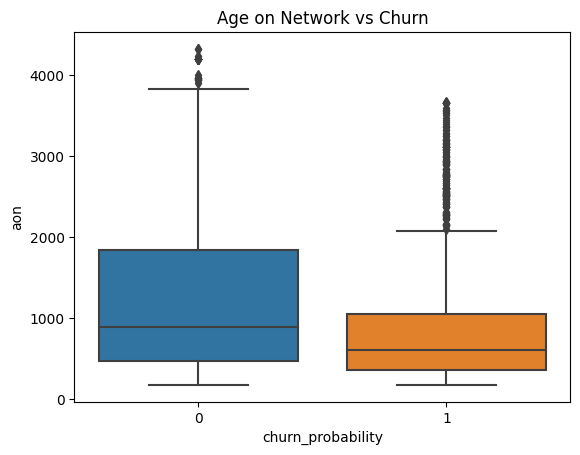

In [82]:
sb.boxplot(x = data_v1_hvc.churn_probability, y = data_v1_hvc.aon)
plt.title('Age on Network vs Churn')
plt.show()

#### Observation(s):
- Customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

In [83]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sb.barplot(x='churn_probability', y = column_names[0], data = data_v1_hvc, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sb.barplot(x='churn_probability', y = column_names[1], data = data_v1_hvc, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sb.barplot(x='churn_probability', y = column_names[2], data = data_v1_hvc, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
        
   
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [84]:
# function for categorical variable univariate analysis
#!pip install sidetable
#import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sb.countplot(x=column_names[0],hue='churn_probability',data=data_v1_hvc, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sb.countplot(x=column_names[1],hue='churn_probability',data=data_v1_hvc, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sb.countplot(x=column_names[2],hue='churn_probability',data=data_v1_hvc, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')
        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

Customers who churned (Churn : 1)
            arpu_6       arpu_7       arpu_8
count  1737.000000  1737.000000  1737.000000
mean    637.166830   518.761870   231.228507
std     431.130404   415.210118   342.191525
min    -209.465000  -158.963000    -5.253000
25%     337.738000   215.260000     0.000000
50%     558.703000   456.045000    87.067000
75%     830.777000   701.852000   335.002000
max    2077.806750  2056.713250  2071.161750

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  19272.000000  19272.000000  19272.000000
mean     541.382536    551.852308    520.741175
std      353.747620    356.509982    378.526071
min    -1244.284050  -1232.557550   -945.808000
25%      306.189250    315.547000    260.630000
50%      476.082000    481.870500    447.242500
75%      687.256250    696.683500    675.100500
max     2077.806750   2056.713250   2071.161750 



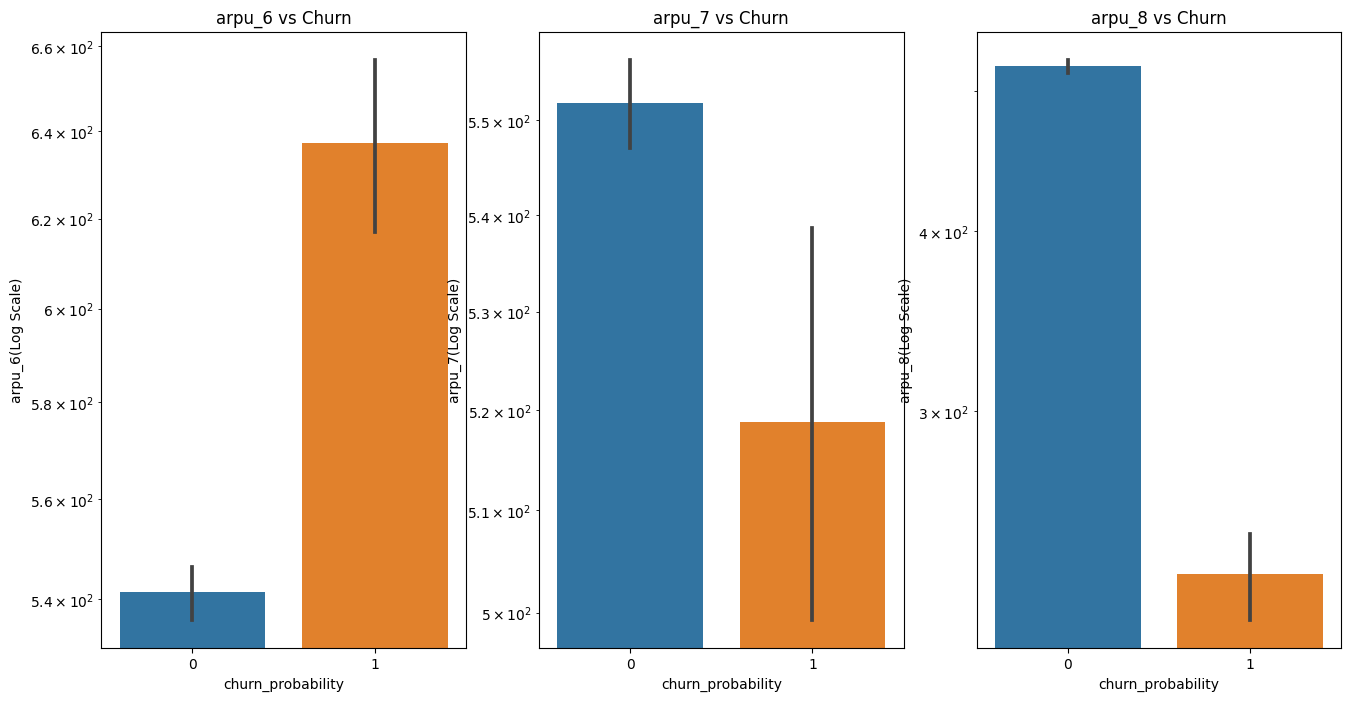

In [85]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

##### Observation(s):

- We can understand from the above plots that revenue generated by the Customers who are about to churn is very unstable.
- The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     1737.000000     1737.000000     1737.000000
mean       767.542815      608.294080      212.355590
std        778.863798      736.720612      455.872447
min          0.000000        0.000000        0.000000
25%         84.430000       17.450000        0.000000
50%        550.860000      330.460000        0.000000
75%       1195.210000      909.630000      208.940000
max       2927.970000     2983.142500     2936.380000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    19272.000000     19272.00000    19272.000000
mean       586.087686       614.66800      567.293059
std        613.381127       637.19605      623.280936
min          0.000000         0.00000        0.000000
25%        118.075000       125.11750      102.802500
50%        404.285000       430.09000      367.760000
75%        841.975000       889.09000      809.465000
max    

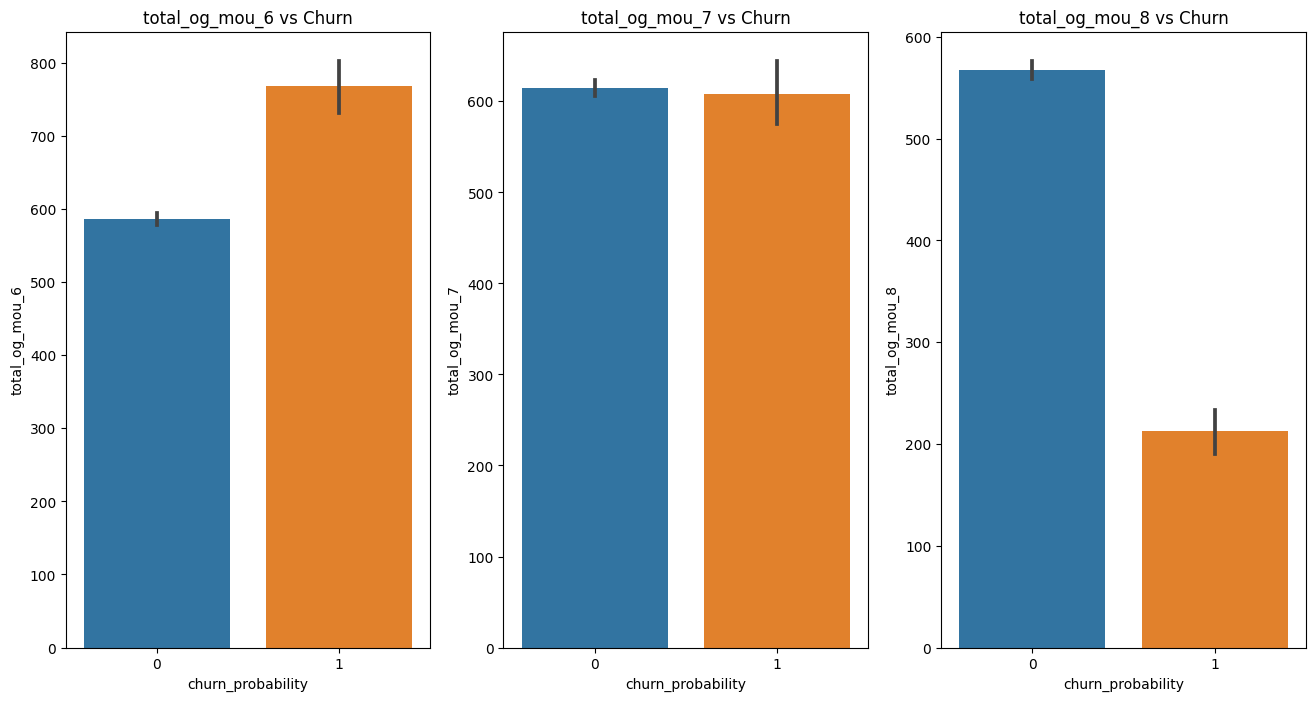

In [86]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

###### Observation(s):
- The Customers with high total_og_mou in 6th month and lower total_og_mou in 7th month are more likely to churn compared to the rest

Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     1737.000000     1737.000000     1737.000000
mean       219.746811      170.375941       61.033351
std        283.311535      240.412751      136.001649
min          0.000000        0.000000        0.000000
25%         39.140000       15.260000        0.000000
50%        126.240000       87.390000        0.000000
75%        280.660000      222.760000       57.740000
max       1670.600000     1692.260000     1508.740000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    19272.000000    19272.000000    19272.000000
mean       285.872009      295.707652      289.601350
std        313.059202      317.337298      313.738576
min          0.000000        0.000000        0.000000
25%         76.330000       85.460000       78.982500
50%        188.000000      196.160000      193.250000
75%        376.487500      386.817500      380.580000
max    

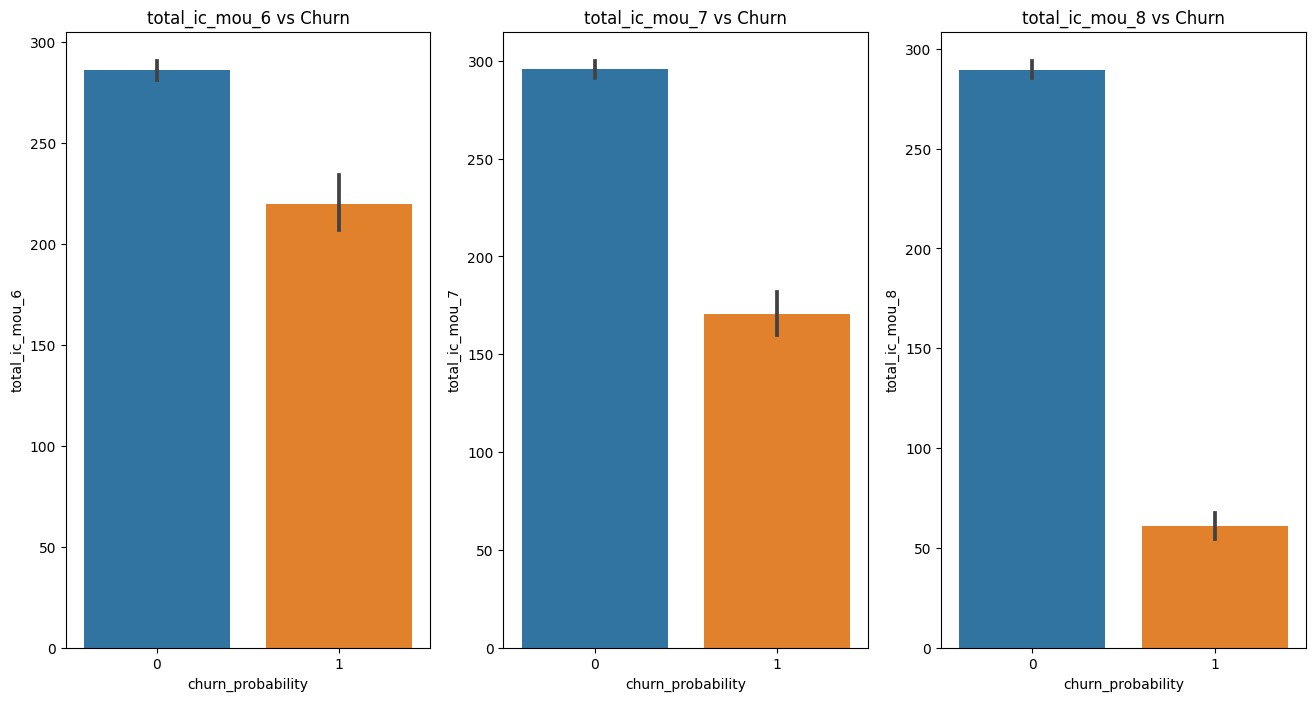

In [87]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

###### Observation(s):
- The Customers with decrease in rate of total_ic_mou in 6th month are more likely to churn, compared to the rest.

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  1737.000000  1737.000000  1737.000000
mean     87.588810    70.170599    18.205740
std     195.070822   177.418248    91.089771
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%      44.140000    14.010000     0.000000
max     818.102500   796.680000   755.710000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  19272.000000  19272.000000  19272.000000
mean     106.078093    104.917193     90.583085
std      211.654784    208.397268    190.911353
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.090000      0.545000      0.000000
75%       88.100000     83.992500     63.757500
max      818.102500    796.680000    755.710000 



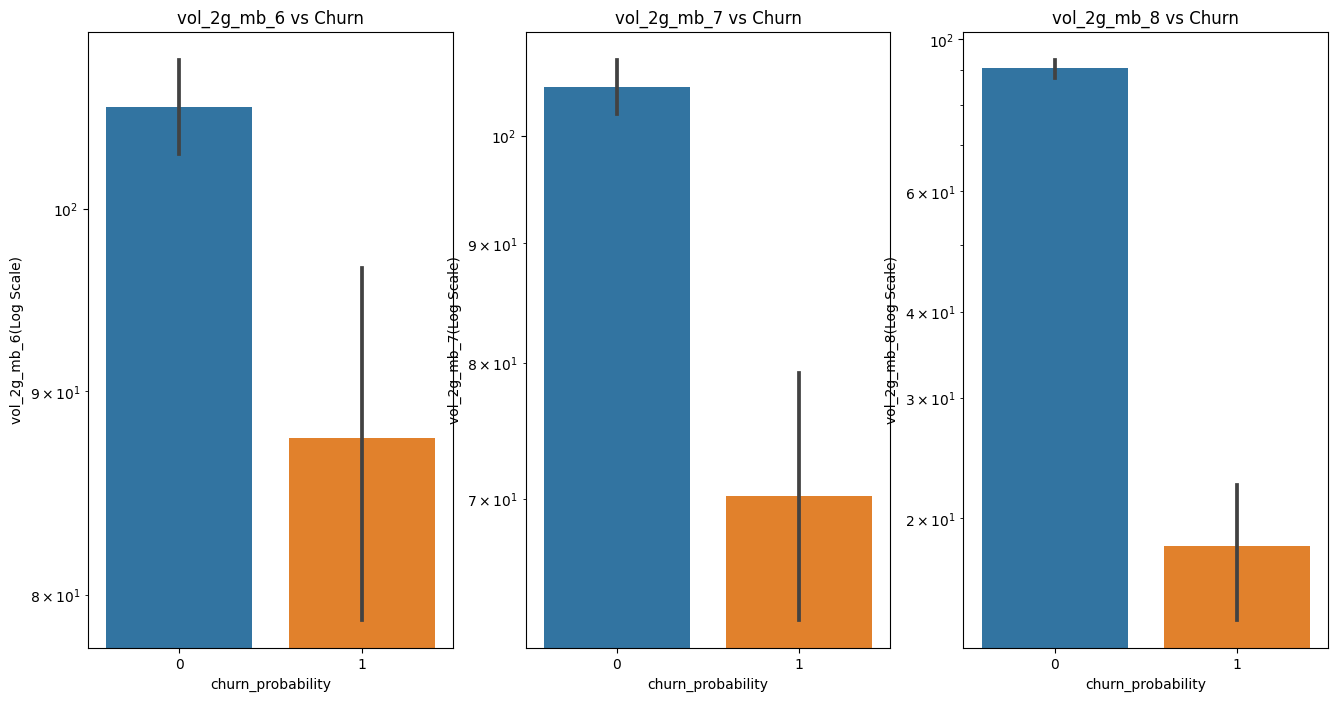

In [88]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

 ###### Observation(s):
- Customers with stable usage of 2g volumes throughout 6 and 7 months are less likely to churn.
- Customers with fall in consumption of 2g volumes in 7th month are more likely to Churn.

Customers who churned (Churn : 1)
       vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  monthly_3g_6
count  1737.000000  1737.000000  1737.000000   1737.000000
mean    231.649581   173.752159    72.621111      0.203224
std     520.777080   470.609672   320.515685      0.575649
min       0.000000     0.000000     0.000000      0.000000
25%       0.000000     0.000000     0.000000      0.000000
50%       0.000000     0.000000     0.000000      0.000000
75%      44.510000     0.000000     0.000000      0.000000
max    2077.972500  2166.160000  2247.682500      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7  vol_3g_mb_8  monthly_3g_6
count  19272.000000  19272.000000  19272.00000  19272.000000
mean     293.481375    323.000950    315.89126      0.218088
std      546.245183    575.801776    580.34212      0.606743
min        0.000000      0.000000      0.00000      0.000000
25%        0.000000      0.000000      0.00000      0.000000
50%        0.000000      0.0

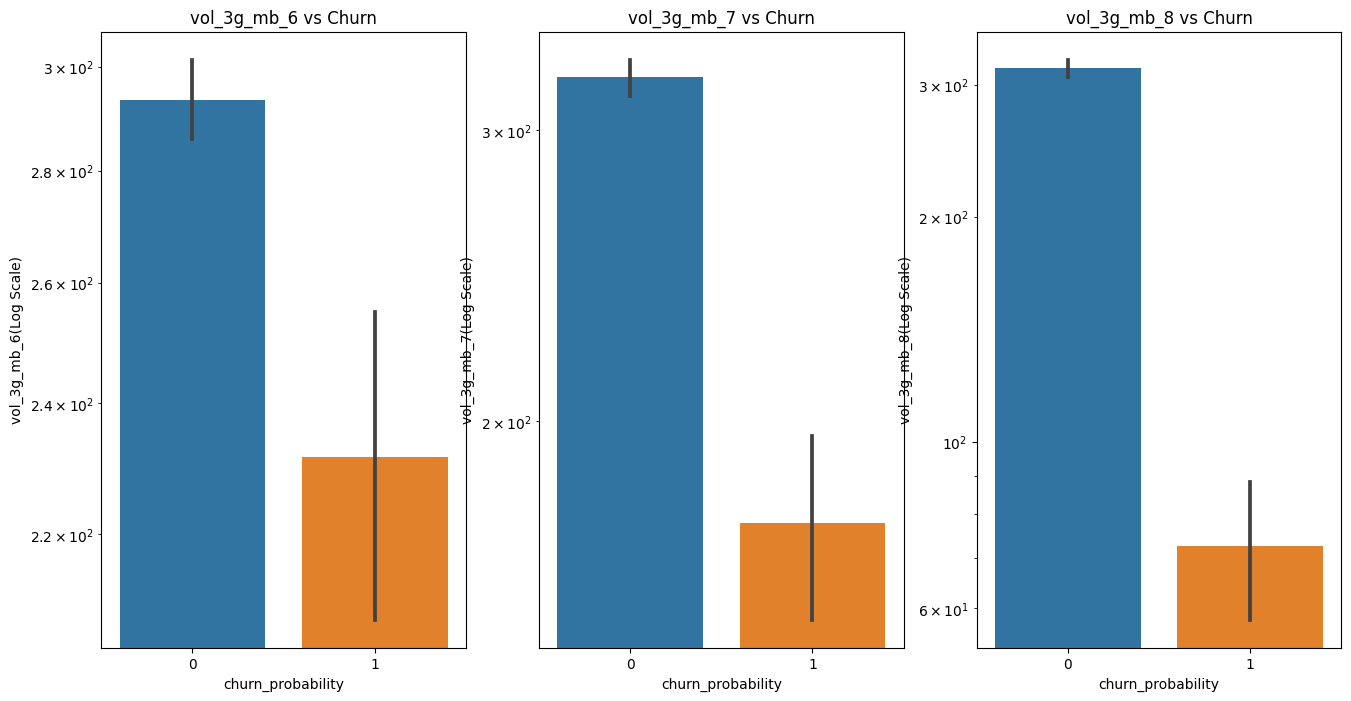

In [89]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

###### Observation(s):
- Customers with stable usage of 3g volumes throughout 6 and 7 months are less likely to churn.
- Customers with fall in consumption of 3g volumes in 7th month are more likely to Churn.

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    1601 | 92.1704    |               1601 |              92.1704 |
|  1 |              1 |     115 |  6.62061   |               1716 |              98.791  |
|  2 |              2 |      18 |  1.03627   |               1734 |              99.8273 |
|  3 |              4 |       2 |  0.115141  |               1736 |              99.9424 |
|  4 |              3 |       1 |  0.0575705 |               1737 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulat

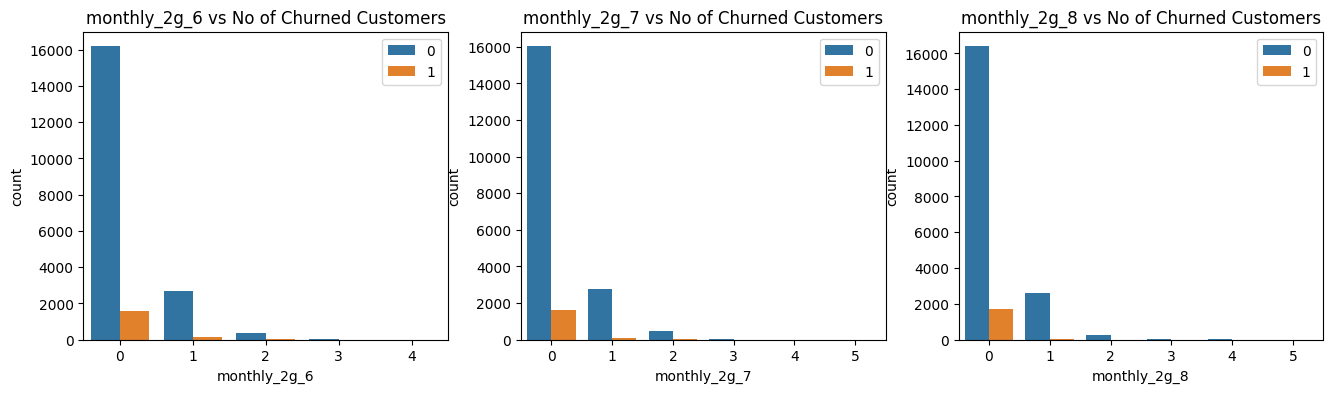

In [90]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    1483 | 85.3771    |               1483 |              85.3771 |
|  1 |              1 |     185 | 10.6505    |               1668 |              96.0276 |
|  2 |              2 |      51 |  2.9361    |               1719 |              98.9637 |
|  3 |              3 |      11 |  0.633276  |               1730 |              99.597  |
|  4 |              5 |       3 |  0.172712  |               1733 |              99.7697 |
|  5 |              4 |       3 |  0.172712  |               1736 |              99.9424 |
|  6 |              6 |       1 |  0.0575705 |               1737 |             100      |
+----+----------------+---------+------------+----------

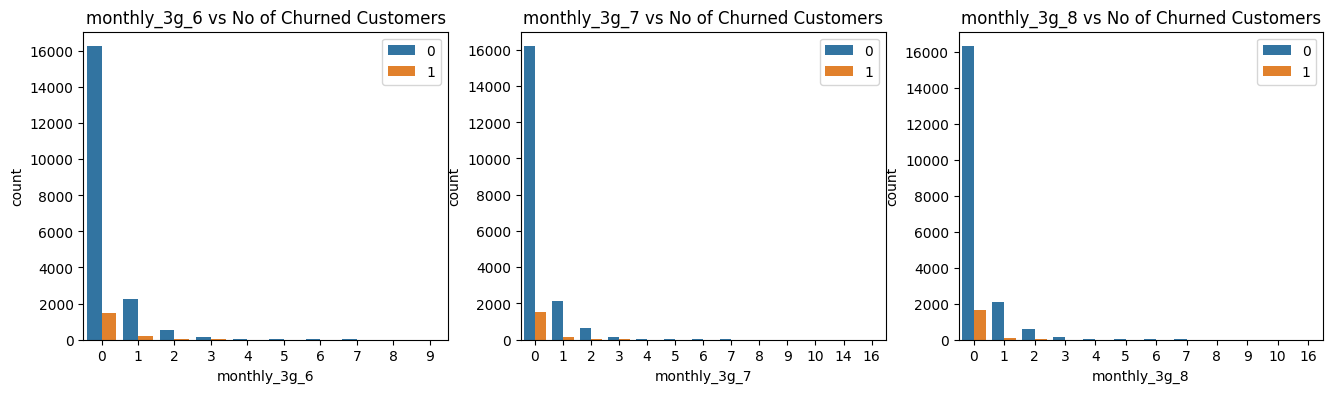

In [91]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    1564 | 90.0403    |               1564 |              90.0403 |
|  1 |             1 |     102 |  5.87219   |               1666 |              95.9125 |
|  2 |             2 |      25 |  1.43926   |               1691 |              97.3518 |
|  3 |             3 |      12 |  0.690846  |               1703 |              98.0426 |
|  4 |             4 |      11 |  0.633276  |               1714 |              98.6759 |
|  5 |             5 |       8 |  0.460564  |               1722 |              99.1364 |
|  6 |             7 |       6 |  0.345423  |               1728 |              99.4819 |
|  7 |             6 |       4 |  0.230282  |               1732 |

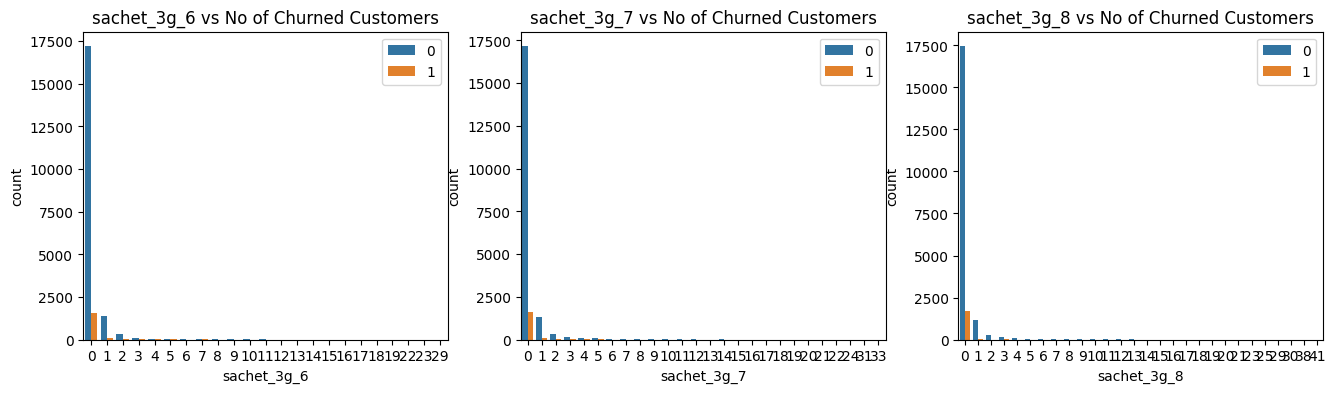

In [92]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']

cat_univariate_analysis(columns)

In [93]:
display(
    data_v1_hvc.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])
)

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean     549.301871    549.116428    496.804600    242.894972    246.510894   
std      361.726723    361.828340    384.016259    361.123686    370.337351   
min    -1244.284050  -1232.557550   -945.808000      0.000000      0.000000   
10%      171.348400    175.841600     83.883800      1.790000      1.580000   
25%      307.807000    308.747000    230.565000     20.060000     18.840000   
50%      482.626000    479.754000    427.579000     84.880000     82.360000   
75%      700.581000    697.097000    658.732000    289.390000    288.830000   
90%      996.797600    990.142000    970.494200    761.240000    786.040000   
95%     1239.597200   1247.504800   1246.253400   1141.762000   1188.570000   
99%     1981.119760   1997.063760   1971.299240   1496.500000   1522.195000   
max     2077.806750   2056.713250   2071.161750   1496.500000   1522.195000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  21009.000000  21009.000000  21009.000000  21009.000000   21009.000000   
mean     214.687785    363.004351    363.601328    323.903698       8.337763   
std      343.259613    404.118927    409.286869    384.925231      23.450287   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
10%        0.850000     17.858000     16.606000      9.906000       0.000000   
25%       15.340000     81.640000     78.840000     63.380000       0.000000   
50%       65.380000    224.160000    219.460000    183.380000       0.000000   
75%      238.080000    492.940000    496.880000    436.860000       0.000000   
90%      664.242000    910.736000    919.840000    831.994000      27.464000   
95%     1077.292000   1261.858000   1271.998000   1162.952000      85.436000   
99%     1490.312500   1797.310000   1827.865000   1789.097500      97.105000   
max     1490.312500   1797.310000   1827.865000   1789.097500      97.105000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   21009.000000   21009.000000   21009.000000   21009.000000   
mean        4.622785       4.622696      14.716427       8.927998   
std        13.473900      13.472981      40.586617      25.485975   
min         0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        14.444000      14.380000      51.300000      31.082000   
95%        53.905000      54.136000     149.872000     100.462500   
99%        53.905000      54.980000     164.827500     100.462500   
max        53.905000      54.980000     164.827500     100.462500   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   21009.000000      21009.000000      21009.000000      21009.000000   
mean        8.462690         65.693931         65.637135         61.288909   
std        24.278271        100.337295         99.350676         95.922744   
min         0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.310000          5.490000          4.390000   
50%         0.000000         24.190000         24.560000         20.560000   
75%         0.000000         77.680000         77.860000         71.260000   
90%        28.836000        186.494000        189.682000        177.450000   
95%        96.480000        318.520000        321.628000        297.410000   
99%        97.105000        430.575000        423.480000        419.090000   
max        97.105000        430.575000        423.480000        419.090000   

       loc_og_t2m_mou_6  loc_og

Variable Name:  night_pck_user_6


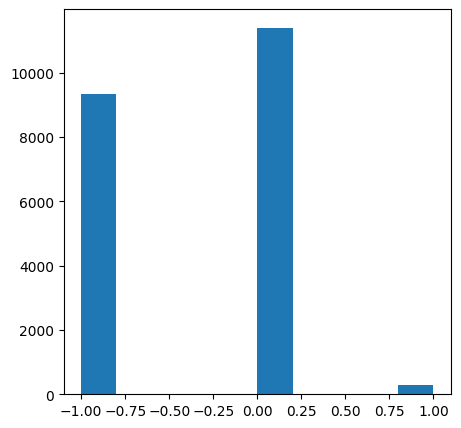

Variable Name:  night_pck_user_8


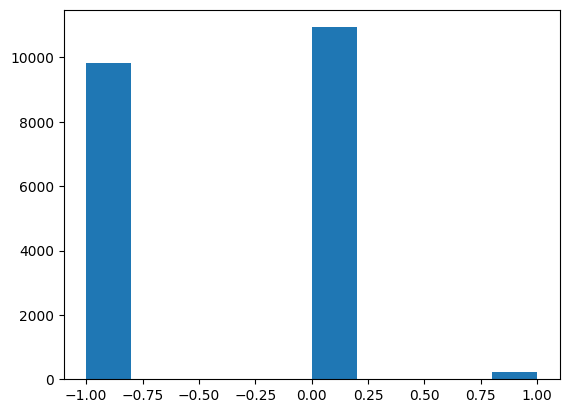

Variable Name:  night_pck_user_7


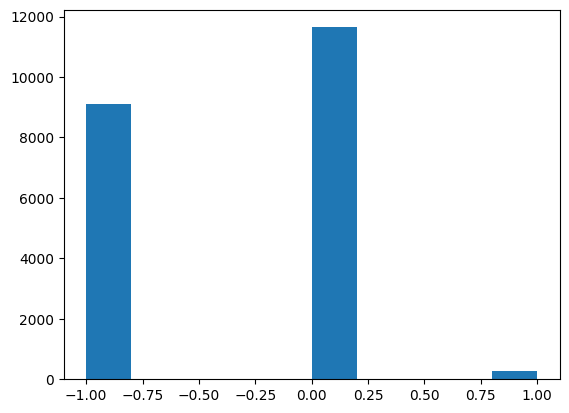

Variable Name:  monthly_2g_6


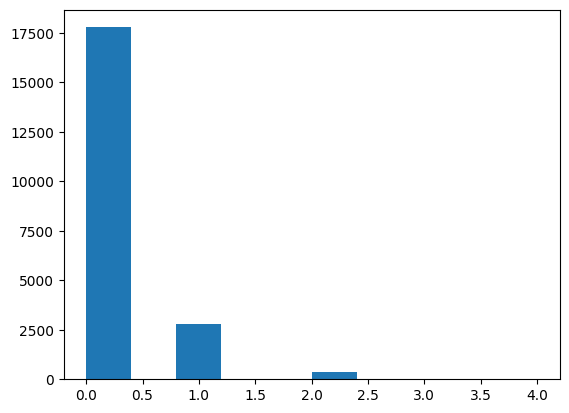

Variable Name:  monthly_2g_7


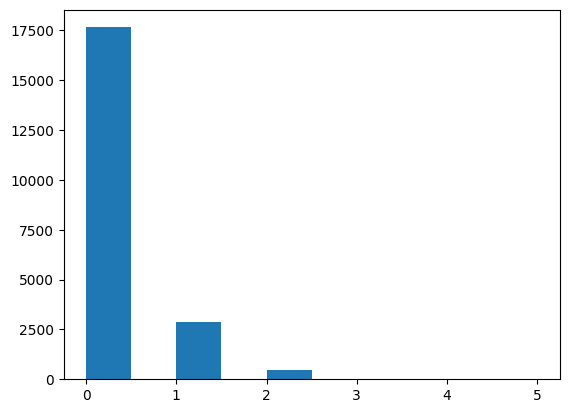

Variable Name:  monthly_2g_8


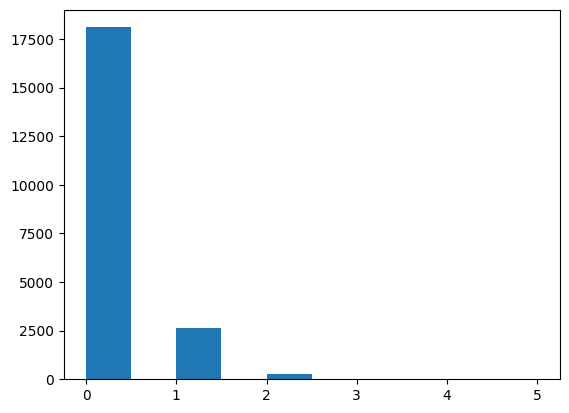

Variable Name:  sachet_2g_6


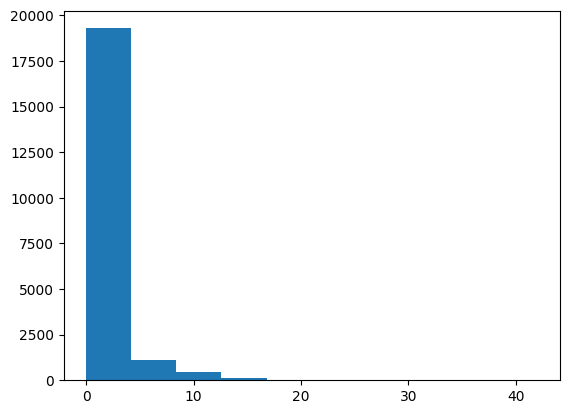

Variable Name:  sachet_2g_7


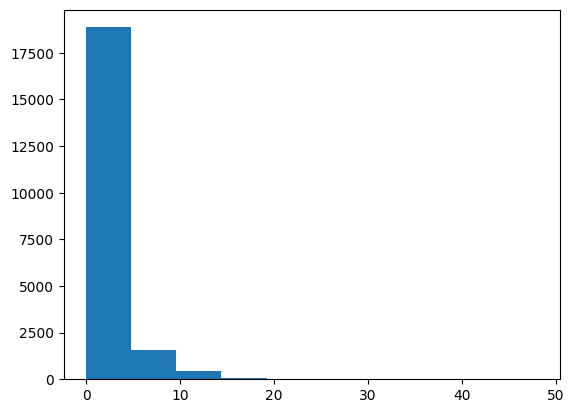

Variable Name:  sachet_2g_8


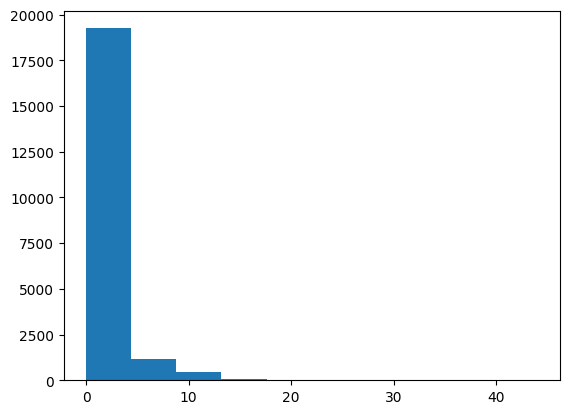

Variable Name:  monthly_3g_6


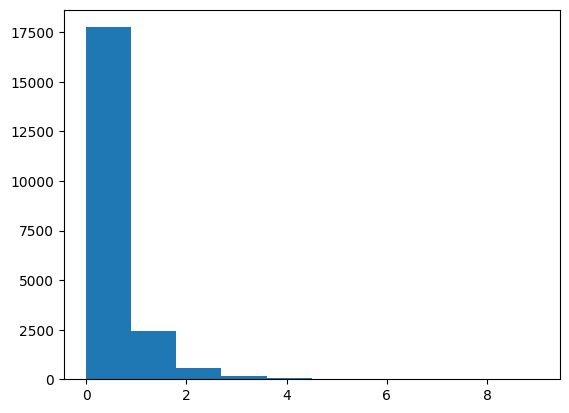

Variable Name:  monthly_3g_7


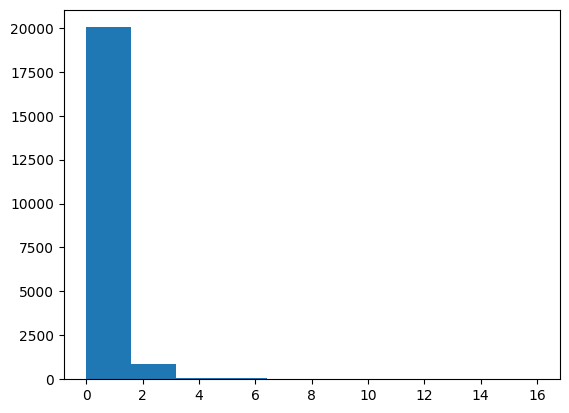

Variable Name:  monthly_3g_8


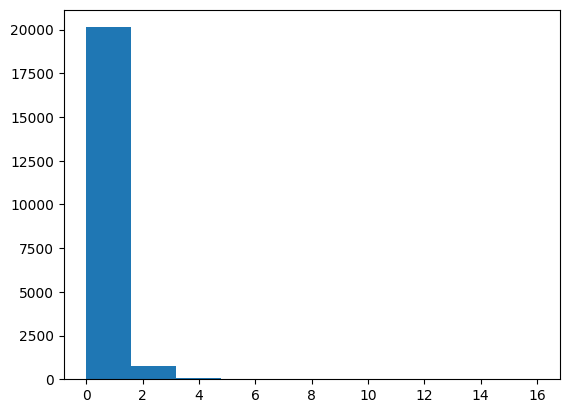

Variable Name:  sachet_3g_6


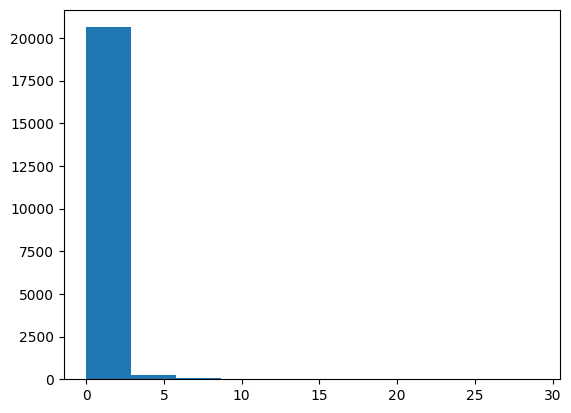

Variable Name:  sachet_3g_7


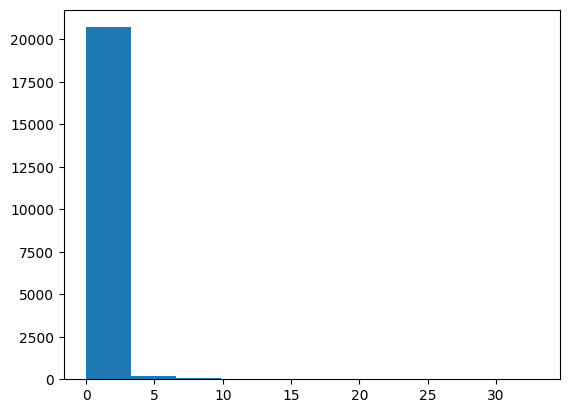

Variable Name:  sachet_3g_8


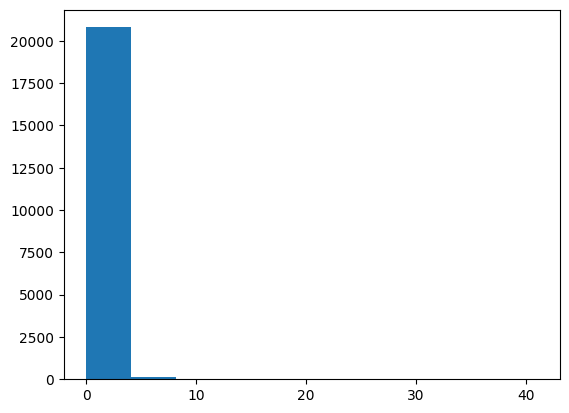

Variable Name:  fb_user_6


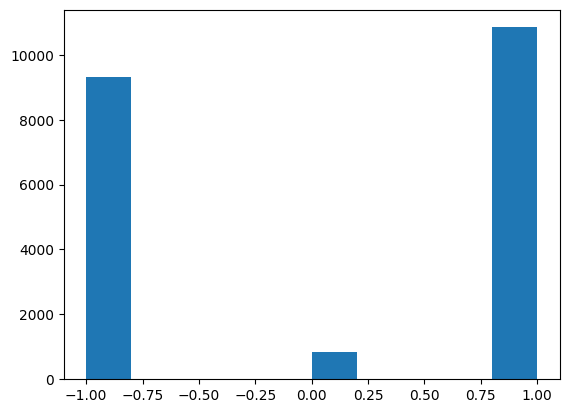

Variable Name:  fb_user_7


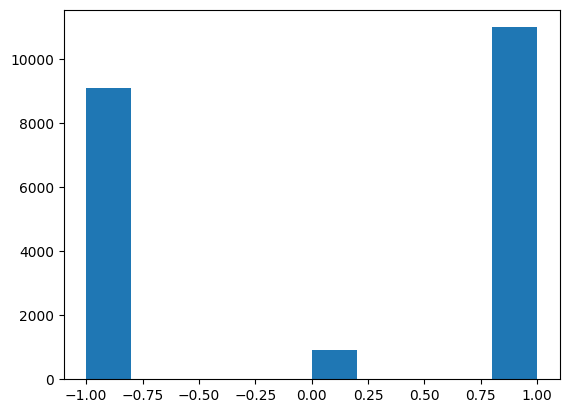

Variable Name:  fb_user_8


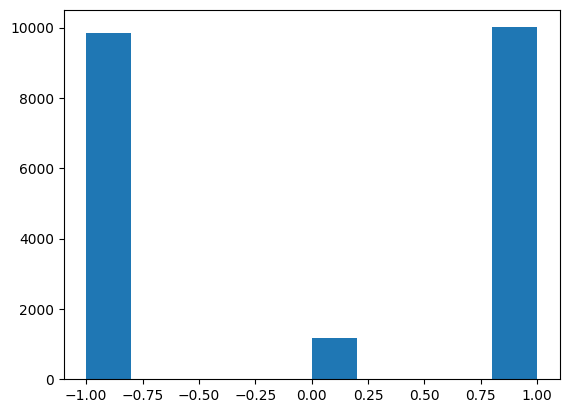

In [94]:
#Draw histogram to see the distribution of below variables
cont_ctg_var=['night_pck_user_6', 'night_pck_user_8', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
plt.figure(figsize=(5,5))
for i in cont_ctg_var:
    print("Variable Name: ",i)
    plt.hist(data_v1_hvc[i])
    plt.show()

<Axes: xlabel='churn_probability', ylabel='count'>

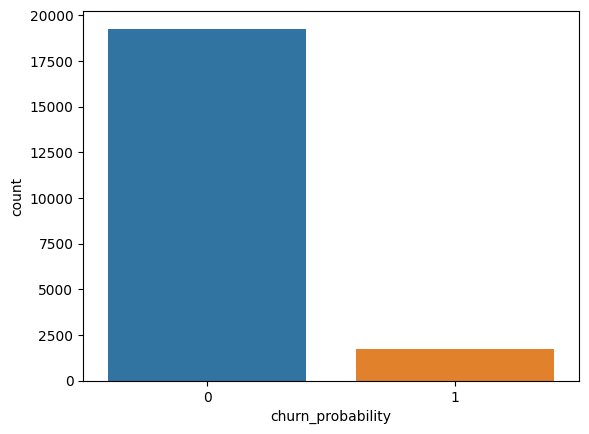

In [95]:
display(sb.countplot(x="churn_probability",data = data_v1_hvc))

##### Observation: Churn % < Non-Churn

### Step 6: Bivariate Analysis

'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn.


<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

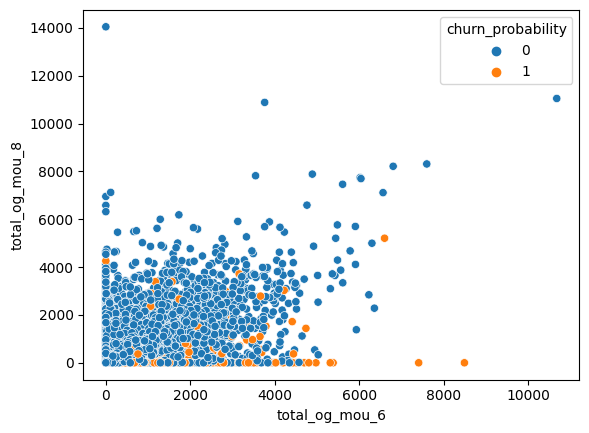

In [96]:
sb.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['churn_probability'])

'total_og_mou_7' vs 'total_og_mou_8' with respect to Churn

<Axes: xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

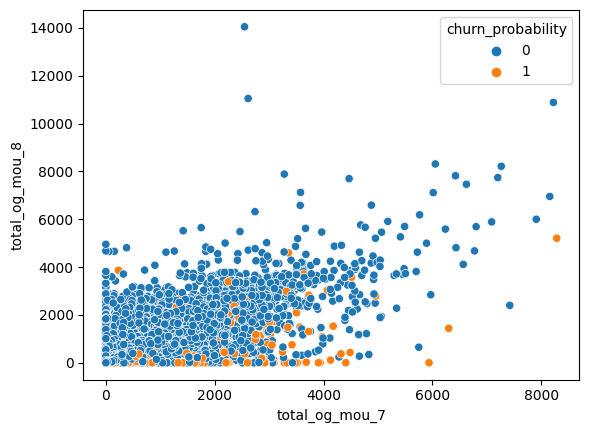

In [97]:
sb.scatterplot(x=data['total_og_mou_7'],y=data['total_og_mou_8'],hue=data['churn_probability'])

##### Observation(s):
- The customers with lower total_og_mou in 6th and 7th months are more likely to Churn compared to the ones with higher total_og_mou.

aon' vs 'total_og_mou_8' with respect to Churn

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

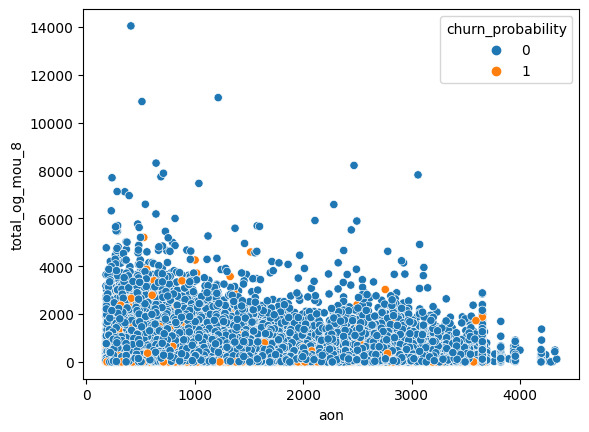

In [98]:
sb.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['churn_probability'])

#### Observation(s):
- Customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
- Customers with total_ic_mou_8 > 2000 are very less likely to churn.

'max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

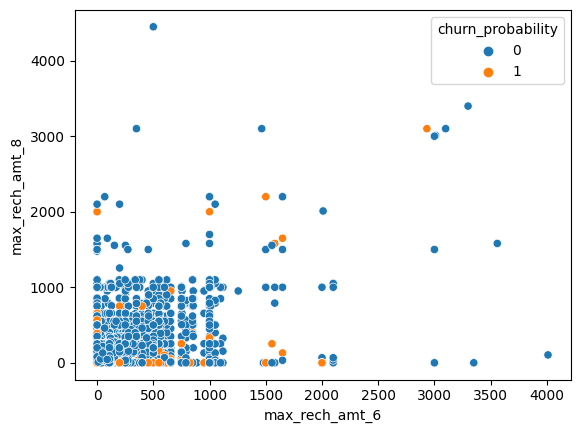

In [99]:
sb.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['churn_probability'])

#### Observation(s):
- Customers with less value for recharge amount are more to churn than comparted to larger recharge amount(s).

In [100]:
data_v1_hvc.shape

(21009, 175)

In [101]:
test_v1.shape

(30000, 174)

In [102]:
#Writing generic function for displaying box plot based on attributes given as input vs churn probability
def colboxplt(cols):
    plt.figure(figsize=(40, 25))
    for i in range(len(cols)):
        plt.subplot(2,len(cols),i+1)
        K = pd.concat([data_v1_hvc[cols[i]],data_v1_hvc['churn_probability']], axis=1)
        K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = K)
        plt.xticks()    
        plt.suptitle('Incoming Calls Usage')
        plt.subplot(2,3,3+i+1)
        sb.distplot(data[cols[i]])

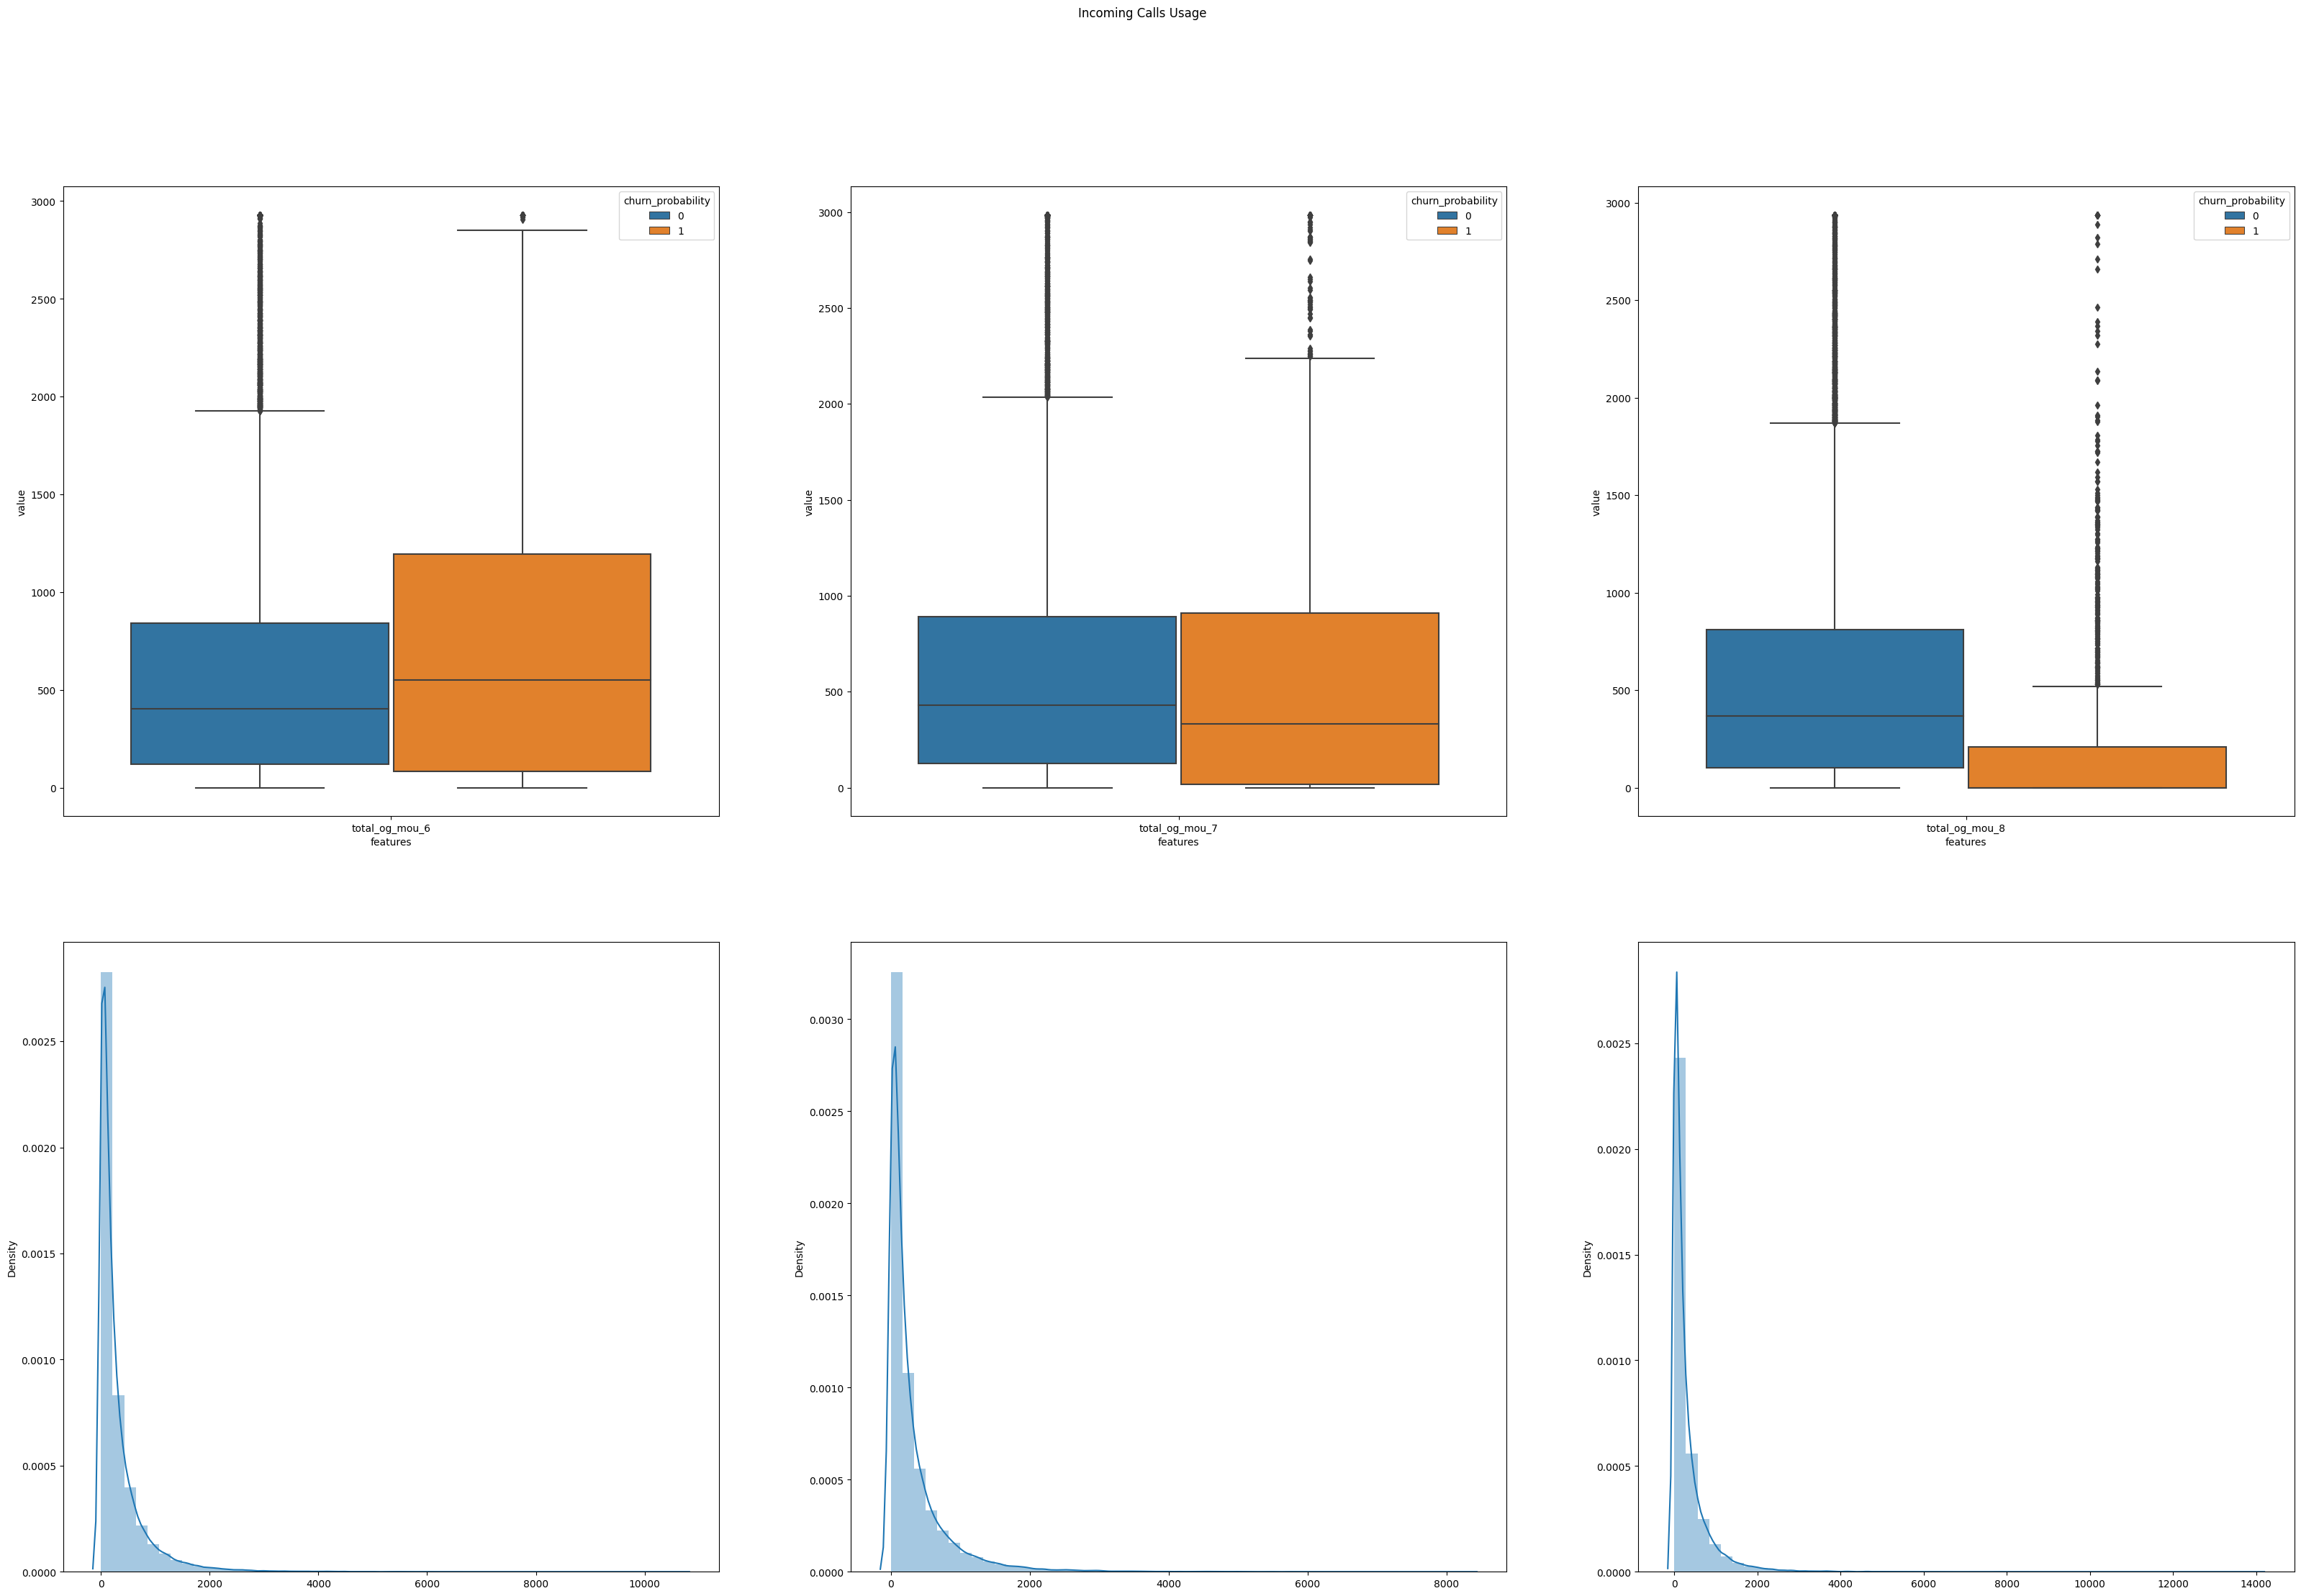

In [103]:
# Analysis Outgoing Minutes of Usage 
cols = [['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
colboxplt(cols)

#### Observation(s):
  - If amount of outgoing is increasing can see for june and july month the amount of churn is relatively more

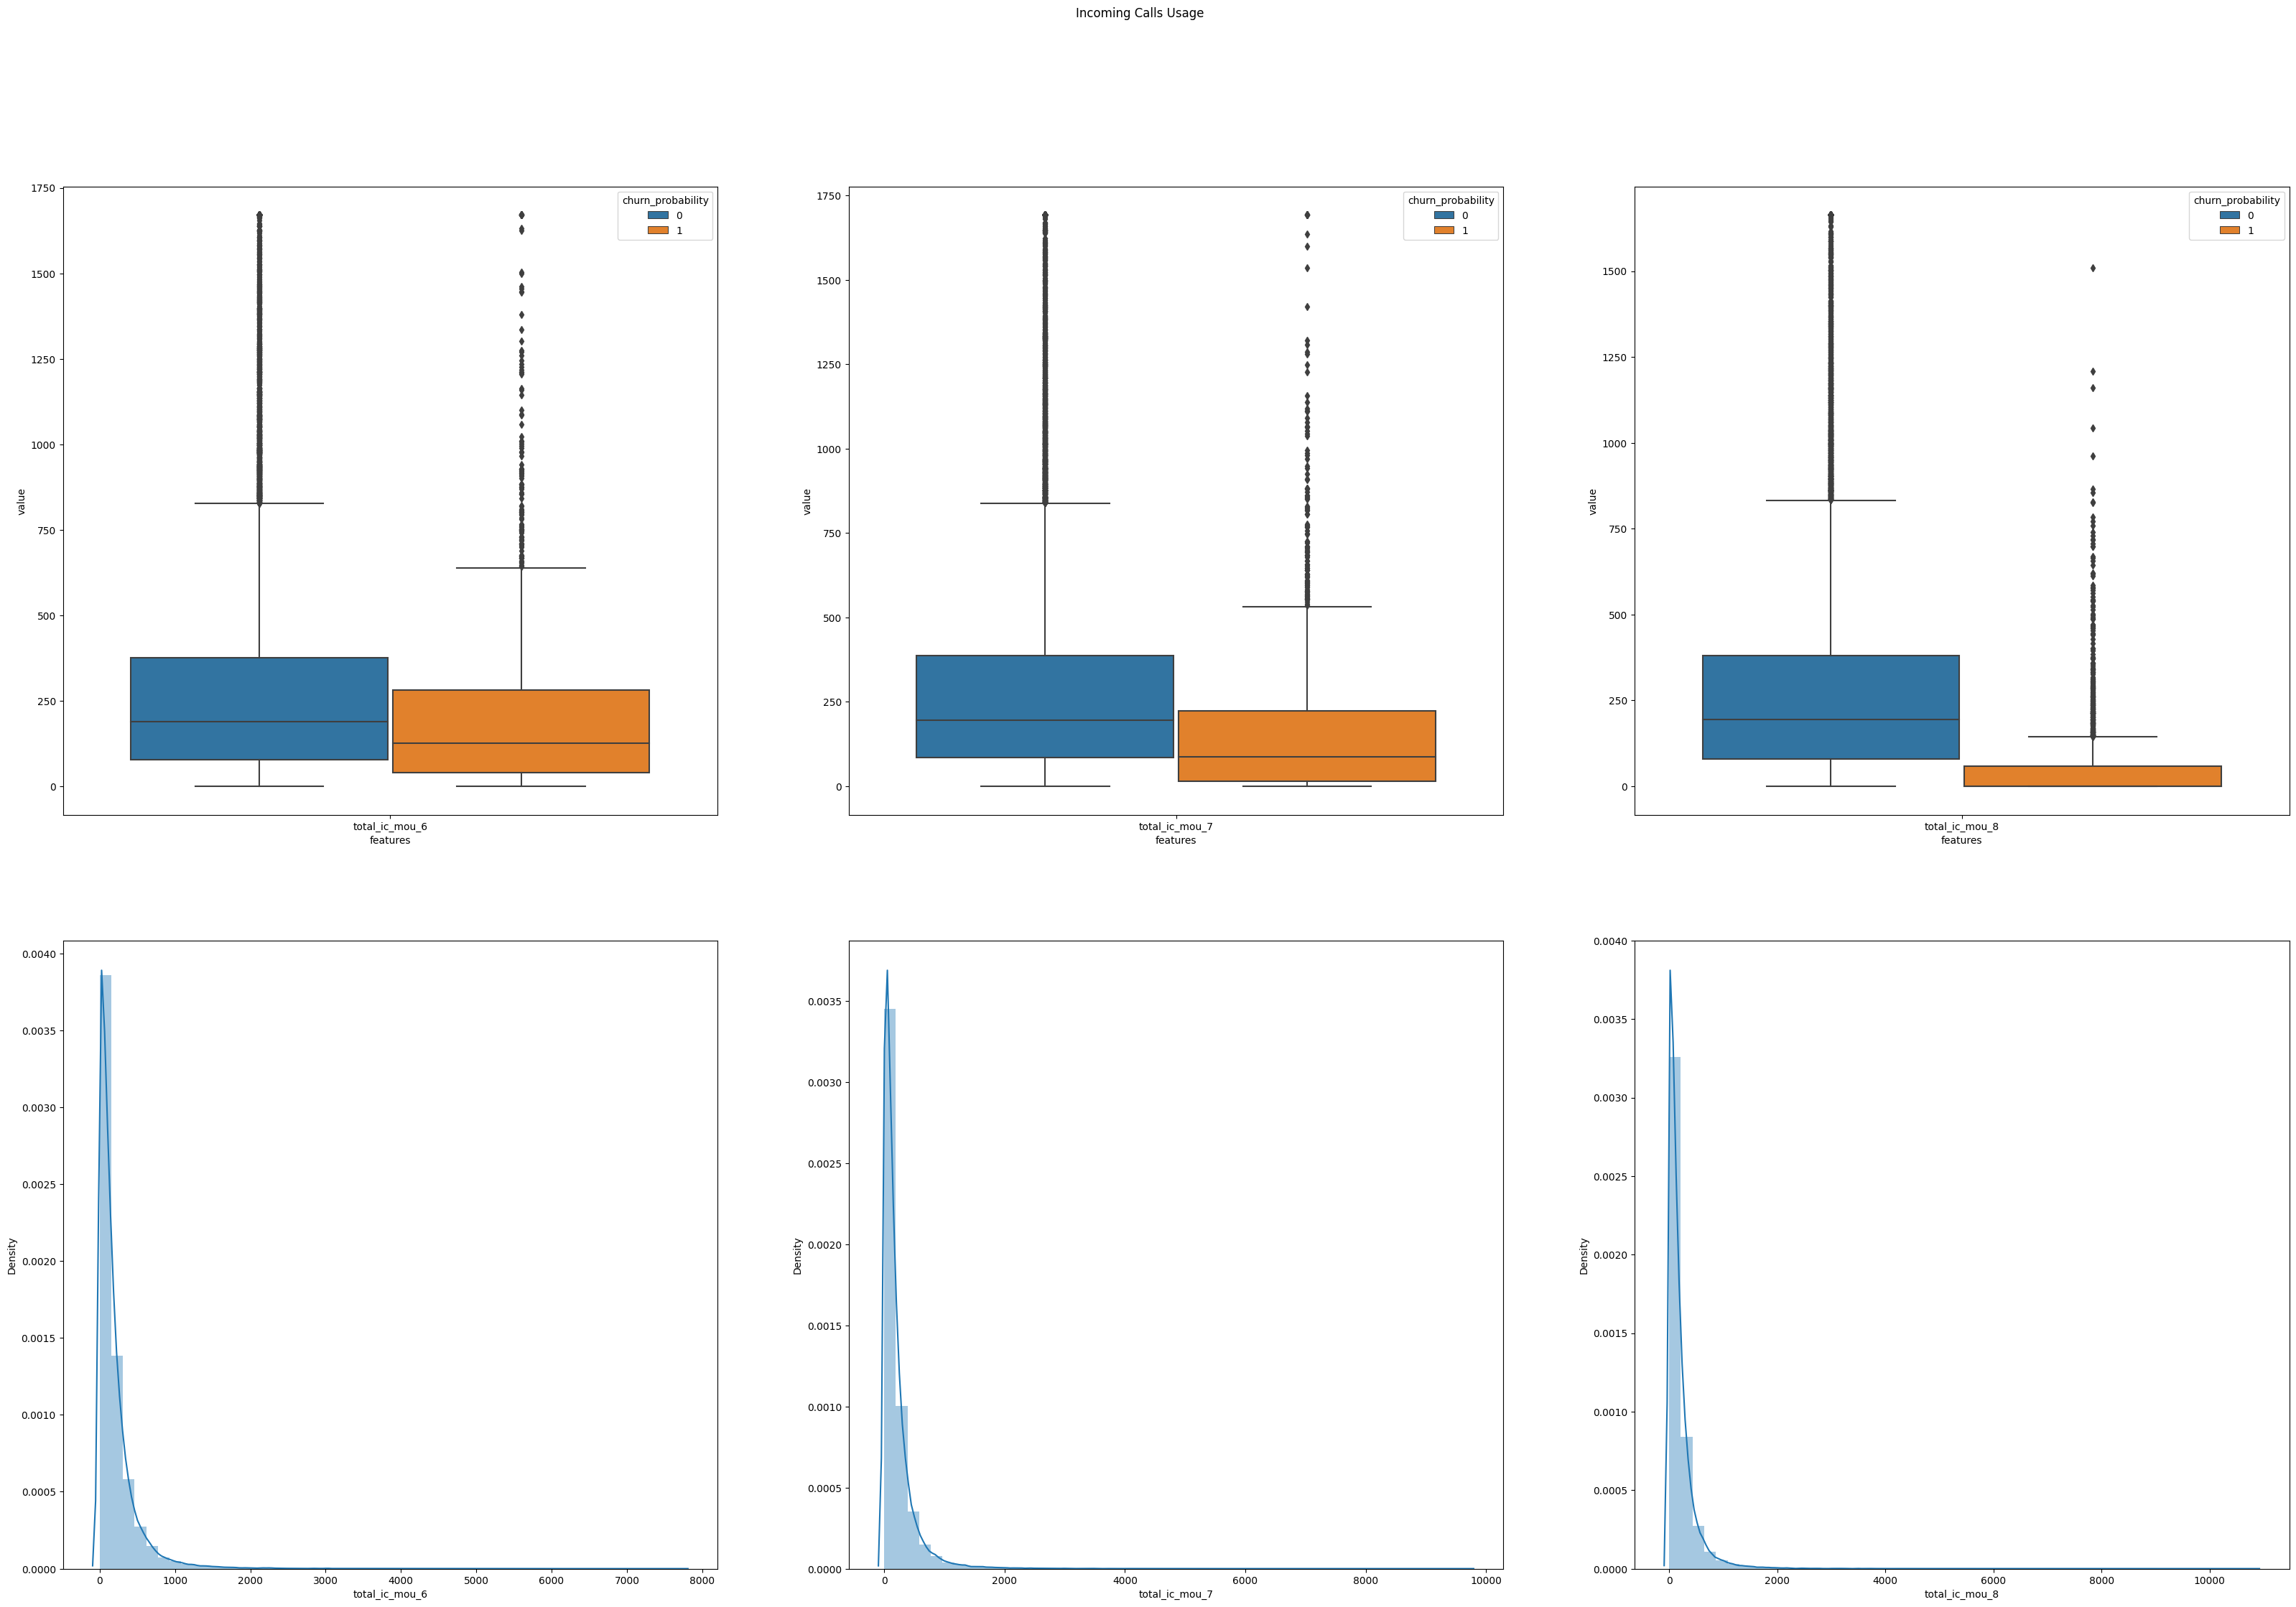

In [104]:
# Analysis Incoming Minutes of Usage 
cols =["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]
colboxplt(cols)

#### Observation(s):
  - Total Minutes of usage for Incoming calls are skewed to left side 
  - If the total MOU is more, the probability of getting churned is less

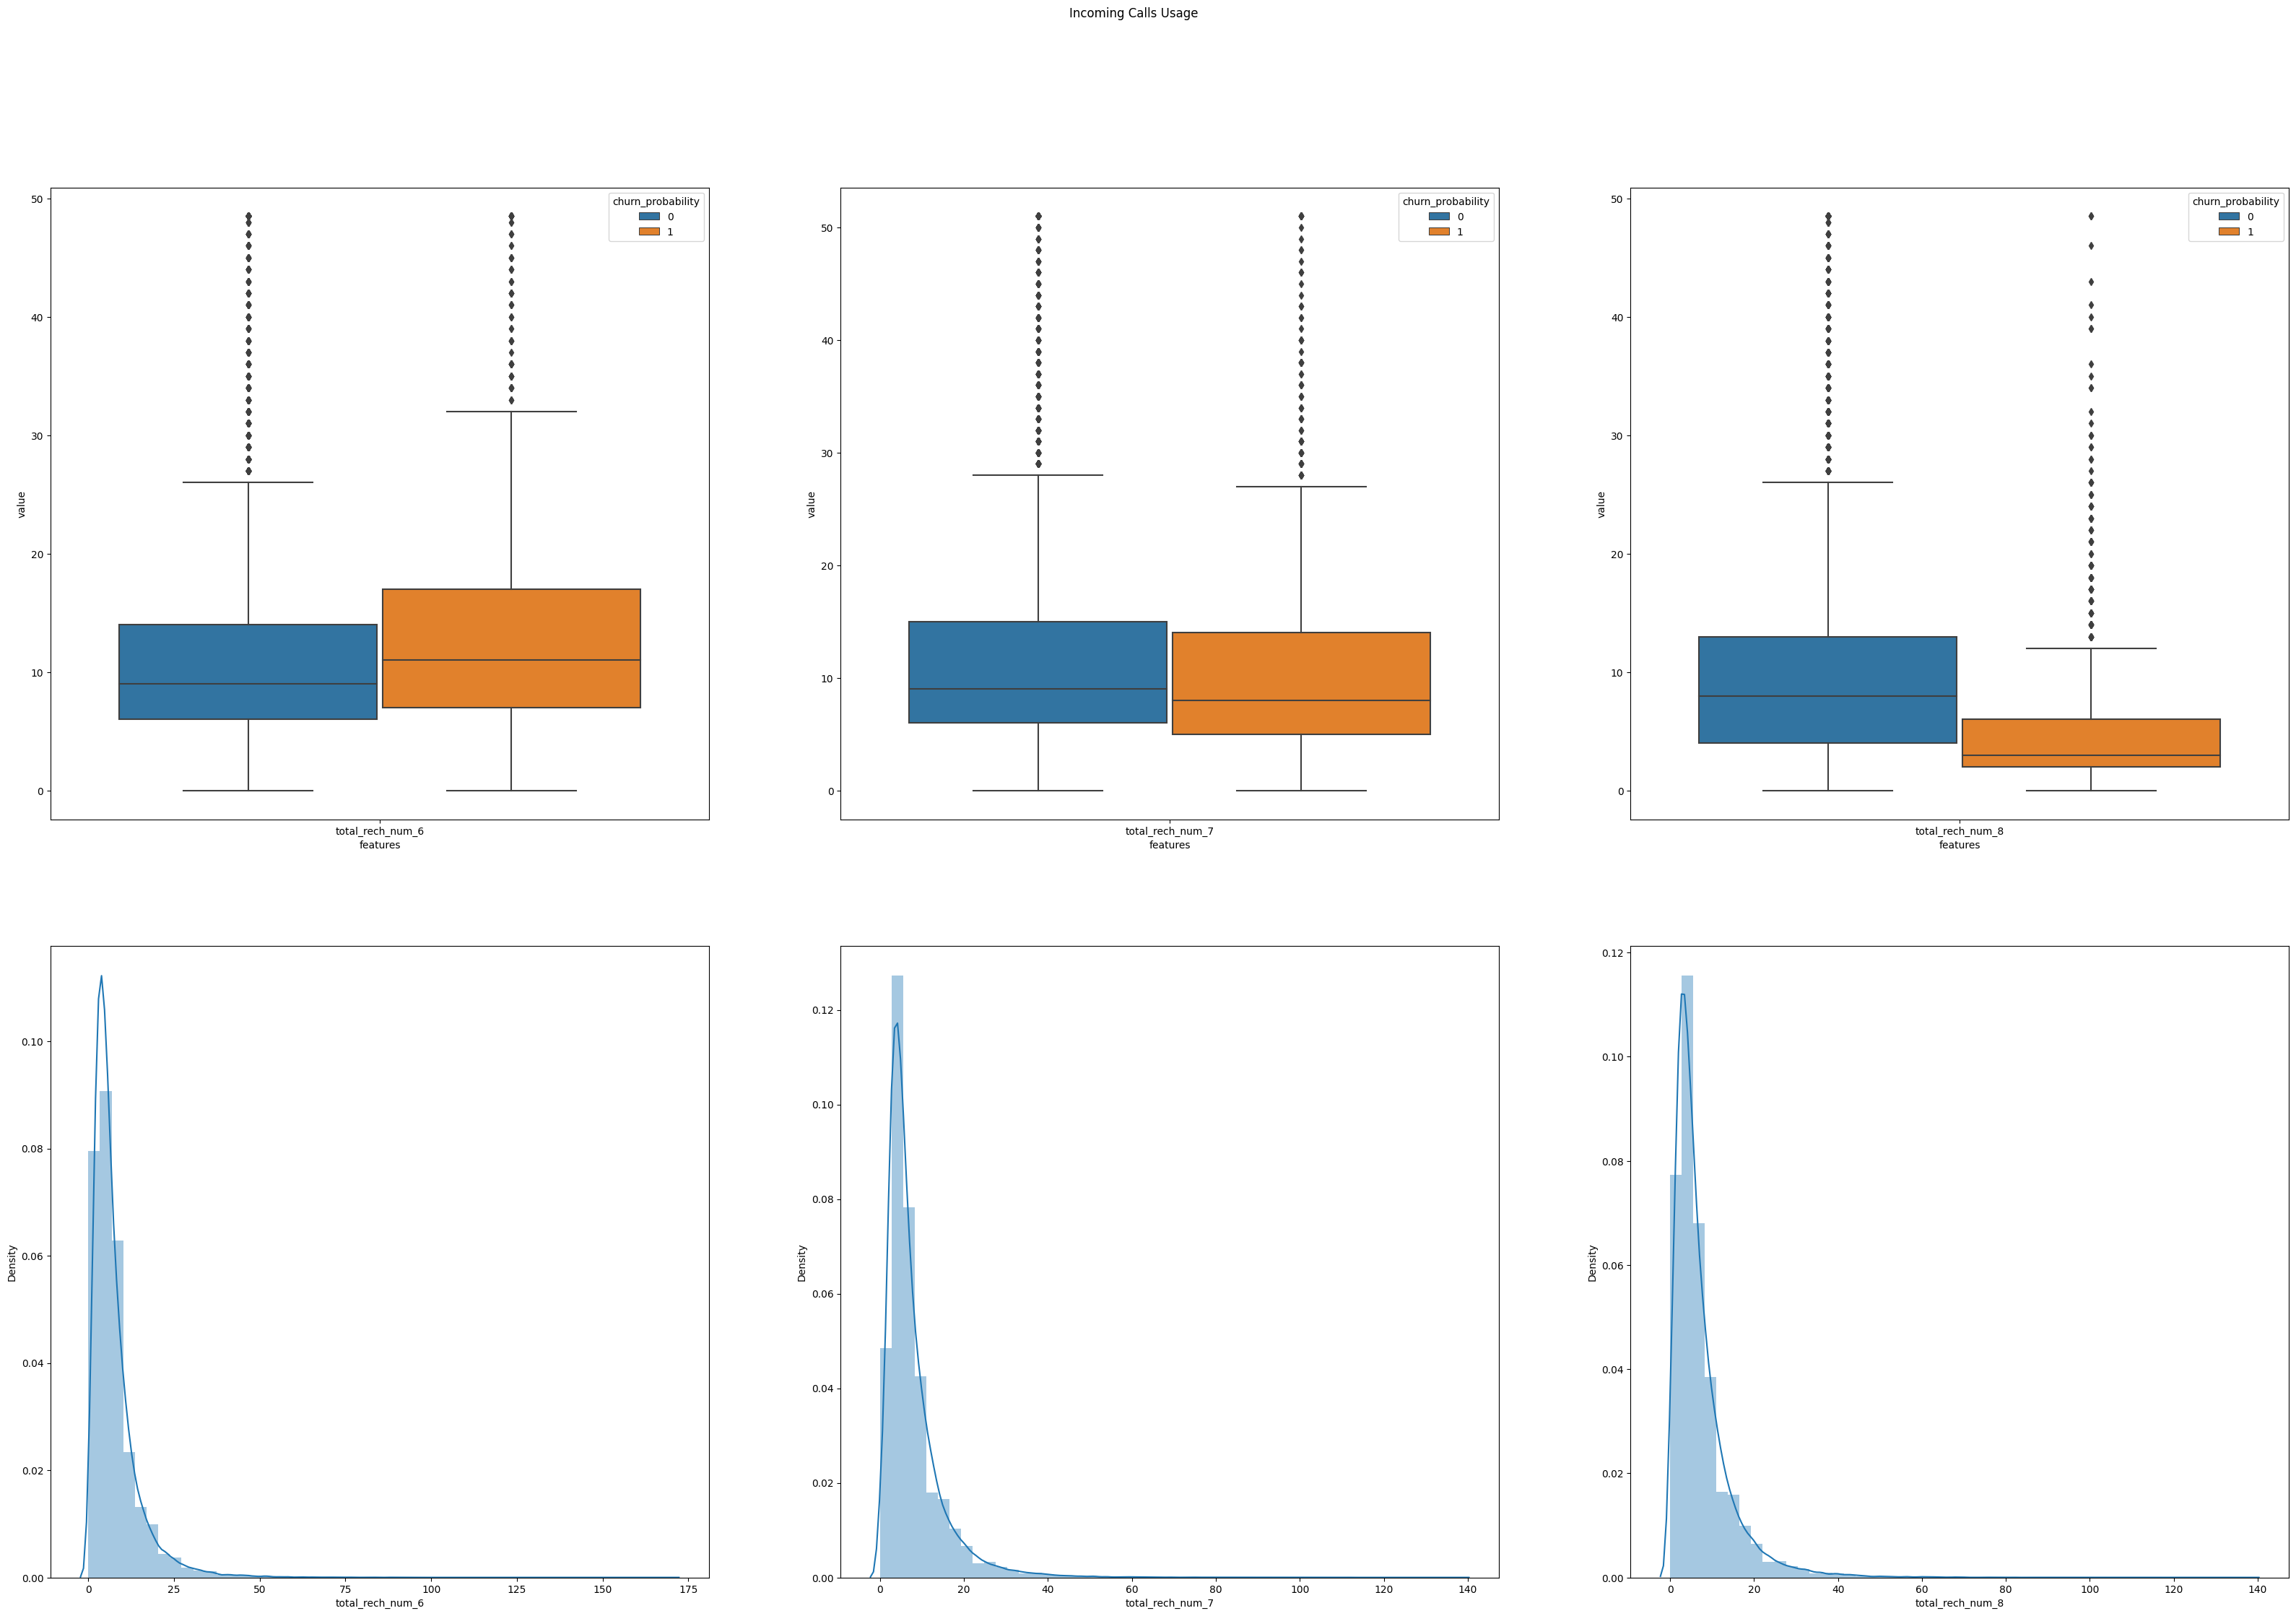

In [105]:
#Analysis total recharge
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
colboxplt(cols)


#### Observation(s):

 - For June month, increase in the total rechage, can observe for more churn 

In [106]:
#define custom function to draw boxplot for bivariate analysis
def Bivariate_boxplt(cols):
    plt.figure(figsize=(60, 45))
    for i in range(0,11):
        plt.subplot(4,3,i+1)
        BV = pd.concat([data_v1_hvc[cols[i]],data_v1_hvc['churn_probability']], axis=1)
        BV = pd.melt(BV,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = BV)
        plt.xticks()    
        plt.suptitle('2G-3G Volume')

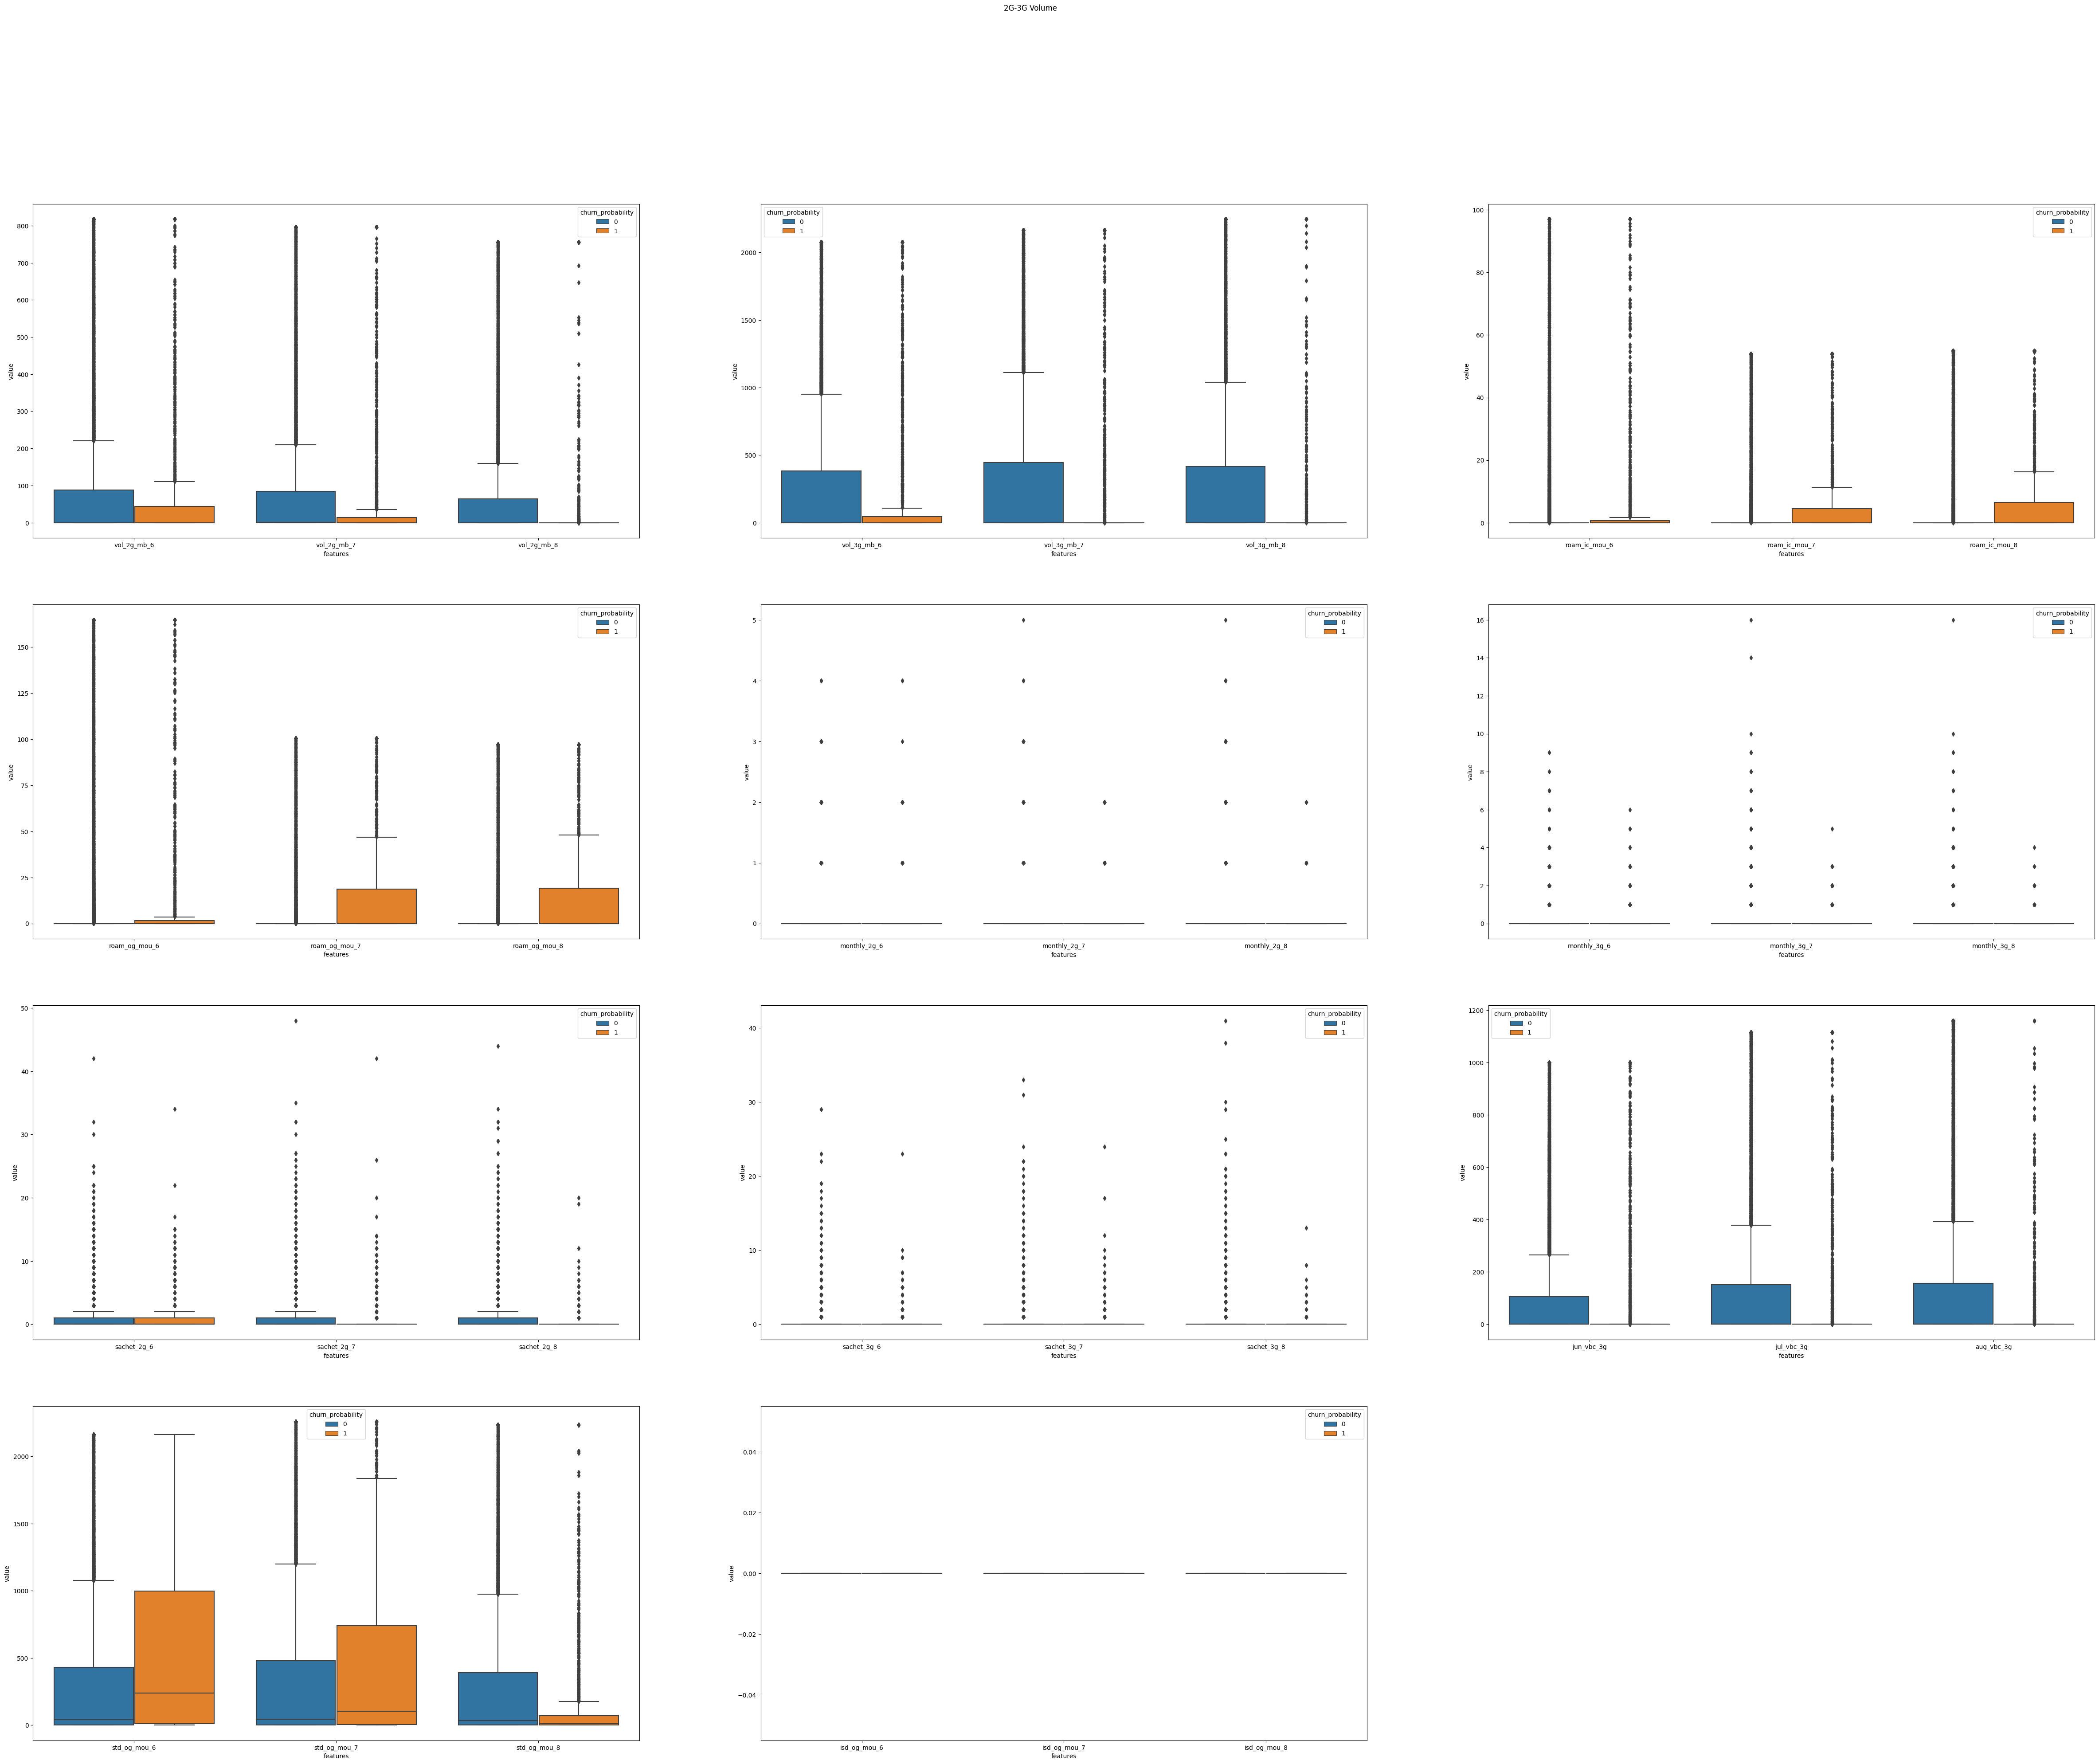

In [107]:
# Drawing box plot for below continuous variables and compare with chrun across different months
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],
        ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],
        ['std_og_mou_6','std_og_mou_7','std_og_mou_8'],
        ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
       ]
Bivariate_boxplt(cols)

#### Observations:
 - Increase in roaming, churn is increasing
 - Increase in outgoing std, churn is high

##### Step 7: Correlation Analysis

<Axes: >

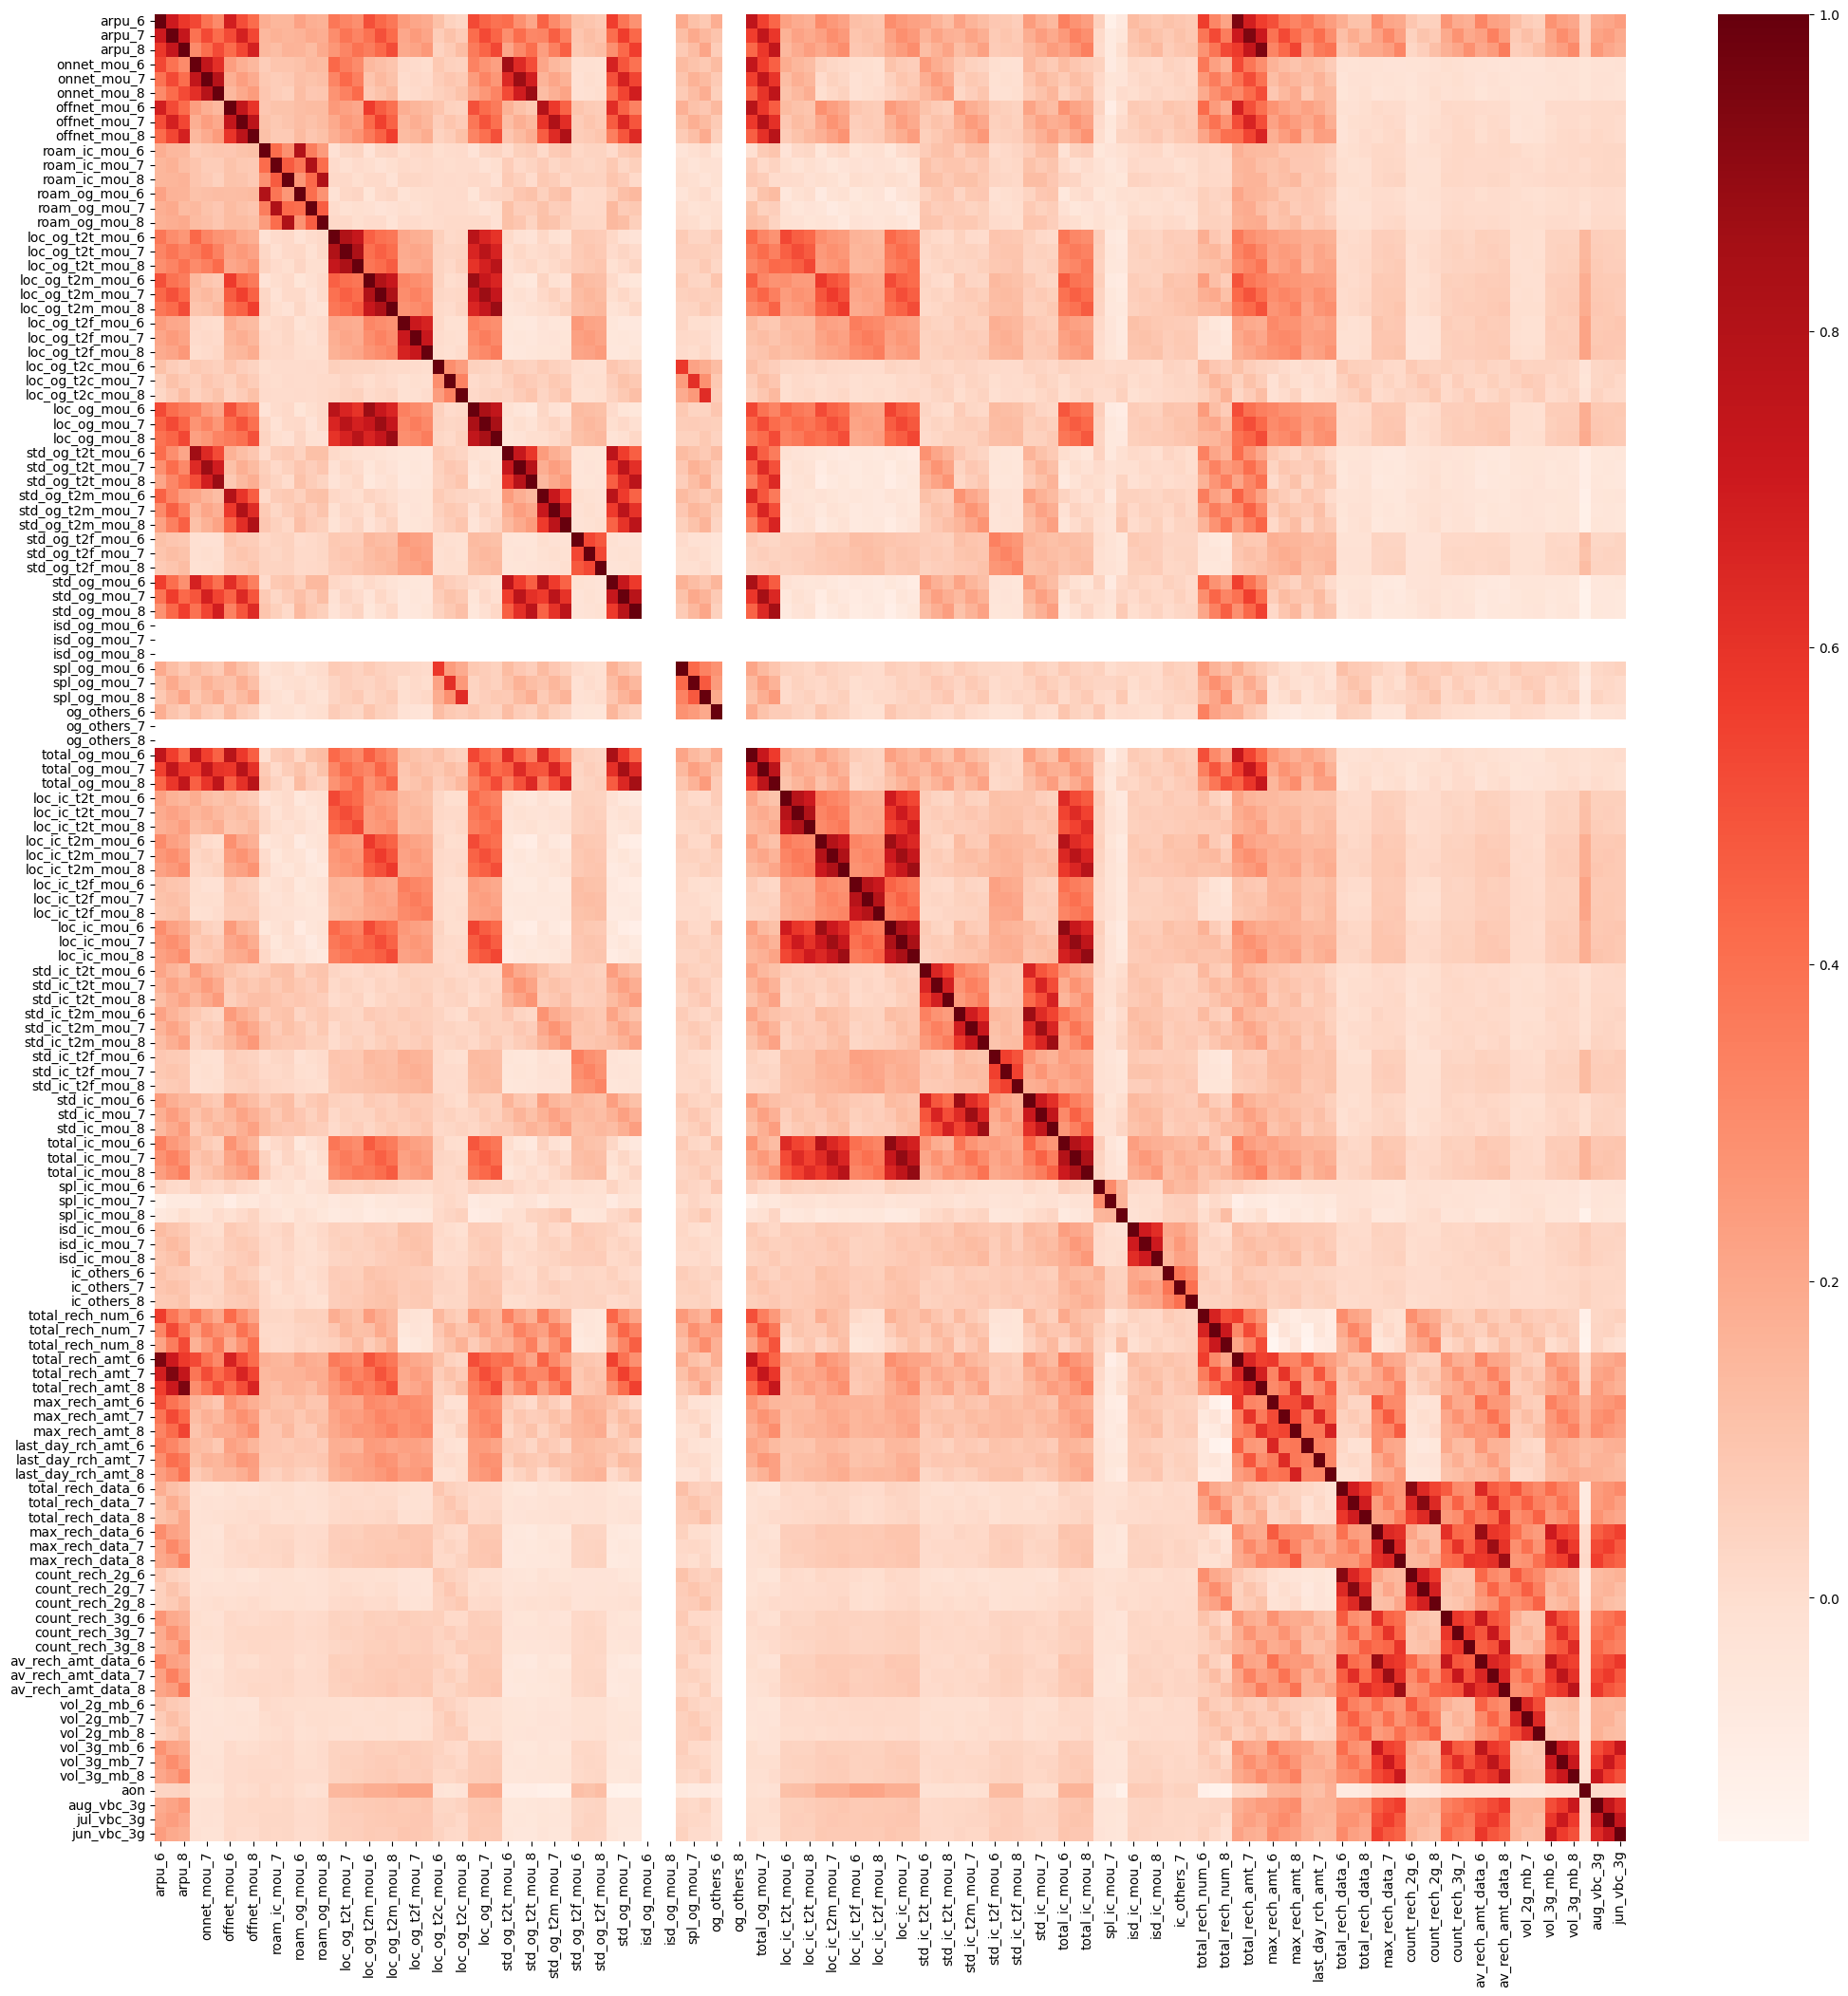

In [108]:
#Ploting Heat map for Correlation analyis

plt.figure(figsize=(25,25))
sb.heatmap(data_v1[num_col].corr(),cmap="Reds")


##### Observation(s):
- Most of the features seems highly correlated.  
- We need to use PCA to handle multicollinearity and dimensionality reductions

In [109]:
data_v1_hvc.isnull().sum()

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

#### Step 5: Model Design Phase starts with filtered "High Valued" customer data.

In [110]:
#Spliting testing and training data 

X = data_v1_hvc.drop(["churn_probability"],axis=1)
Y = data_v1_hvc.churn_probability

In [111]:
# Check for dimensionality after droping "Churn_probability"
X.shape

(21009, 174)

In [112]:
# Check for dimensionality in provided Test data file
test_v1.shape

(30000, 174)

#### Splitting "High Value Customer" base data into train and test for designing various model(s).

In [113]:
# In case of Splitting Train , 
# stratify option is used so that it preserves the same proportions of examples 
# in each class as observed in the original dataset.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [114]:
xtrain.shape

(14706, 174)

##### Check for Class imbalance existence 

In [115]:
Y.value_counts(normalize=True).to_frame()

proportion
churn_probability            
0                    0.917321
1                    0.082679

In [116]:
# Ratio of classes 
class_0 = Y[Y == 0].count()
class_1 = Y[Y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.09


##### Handle class imbalance in further process:
 - Synthetic Minority Class Oversampling Technique (SMOTE) could be used.

In [117]:
# Aggregating the Categorical Columns

train = pd.concat([xtrain, ytrain], axis=1)

# aggregate the categorical variables
display(train.groupby('night_pck_user_6').churn_probability.mean())
display(train.groupby('night_pck_user_7').churn_probability.mean())
display(train.groupby('night_pck_user_8').churn_probability.mean())
display(train.groupby('fb_user_6').churn_probability.mean())
display(train.groupby('fb_user_7').churn_probability.mean())
display(train.groupby('fb_user_8').churn_probability.mean())

# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.107529, 0: 0.084044, 1: 0.127596},
           'night_pck_user_7' : {-1: 0.114231, 0: 0.065649, 1: 0.068750},
           'night_pck_user_8' : {-1: 0.126636, 0: 0.032644, 1: 0.034602},
           'fb_user_6'        : {-1: 0.107529, 0: 0.105496, 1: 0.083258},
           'fb_user_7'        : {-1: 0.114231, 0: 0.087029, 1: 0.063630},
           'fb_user_8'        : {-1: 0.126636, 0: 0.062458, 1: 0.029049}
          }
xtrain.replace(mapping, inplace = True)
xtest.replace(mapping, inplace = True)

night_pck_user_6
-1.0    0.098598
 0.0    0.068796
 1.0    0.113990
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.114313
 0.0    0.058338
 1.0    0.061538
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.142836
 0.0    0.030319
 1.0    0.023952
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.098598
 0.0    0.087838
 1.0    0.068459
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.114313
 0.0    0.068217
 1.0    0.057590
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.142836
 0.0    0.070238
 1.0    0.025385
Name: churn_probability, dtype: float64

In [118]:
# Check for dimensionality of "High value customer"
data_v1_hvc.shape

(21009, 175)

In [119]:
# Check for dimensionality of Test data file
test_v1.shape

(30000, 174)

#### Model(s) Implementation Phase:

 ##### Case 1: Generating various models with / without PCA applied on split "High Value Customer" data.

In [120]:
#find value count % of churn probability on High value Customer data

round(100*data_v1_hvc['churn_probability'].value_counts()/len(data_v1_hvc.index),2)

churn_probability
0    91.73
1     8.27
Name: count, dtype: float64

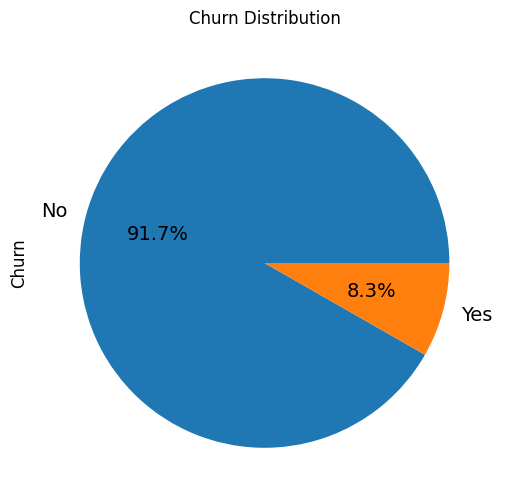

In [121]:
#Churn Distribution to interprete data in terms of %.

pie_chart = data_v1_hvc['churn_probability'].value_counts()*100.0 /len(data_v1_hvc)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [122]:
xtrain.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 14706 entries, 10821 to 18815
Data columns (total 174 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    arpu_6                       float64
 1    arpu_7                       float64
 2    arpu_8                       float64
 3    onnet_mou_6                  float64
 4    onnet_mou_7                  float64
 5    onnet_mou_8                  float64
 6    offnet_mou_6                 float64
 7    offnet_mou_7                 float64
 8    offnet_mou_8                 float64
 9    roam_ic_mou_6                float64
 10   roam_ic_mou_7                float64
 11   roam_ic_mou_8                float64
 12   roam_og_mou_6                float64
 13   roam_og_mou_7                float64
 14   roam_og_mou_8                float64
 15   loc_og_t2t_mou_6             float64
 16   loc_og_t2t_mou_7             float64
 17   loc_og_t2t_mou_8             float64
 18   loc_og_t2m_mou_6         

In [123]:
xtest.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6303 entries, 7750 to 4636
Data columns (total 174 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    arpu_6                       float64
 1    arpu_7                       float64
 2    arpu_8                       float64
 3    onnet_mou_6                  float64
 4    onnet_mou_7                  float64
 5    onnet_mou_8                  float64
 6    offnet_mou_6                 float64
 7    offnet_mou_7                 float64
 8    offnet_mou_8                 float64
 9    roam_ic_mou_6                float64
 10   roam_ic_mou_7                float64
 11   roam_ic_mou_8                float64
 12   roam_og_mou_6                float64
 13   roam_og_mou_7                float64
 14   roam_og_mou_8                float64
 15   loc_og_t2t_mou_6             float64
 16   loc_og_t2t_mou_7             float64
 17   loc_og_t2t_mou_8             float64
 18   loc_og_t2m_mou_6            

In [124]:
# Retaining numerical columns for applying on PCA with scaler for standardization

nums_col = xtrain.select_dtypes(include = ['int64','float64']).columns.tolist()

In [125]:
# Check for details of numerical columns
nums_col

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [126]:
# Scaling the data using Standard Scaler

# Data Scaling

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain[nums_col])
xtest_scaled = scaler.transform(xtest[nums_col])
test_v1_scaled = scaler.transform(test_v1[nums_col])


# Applying Principal Component Analysis
pca = PCA()
pca.fit(xtrain)
xtrain_pca = pca.fit_transform(xtrain_scaled)

In [127]:
xtest_scaled.shape

(6303, 174)

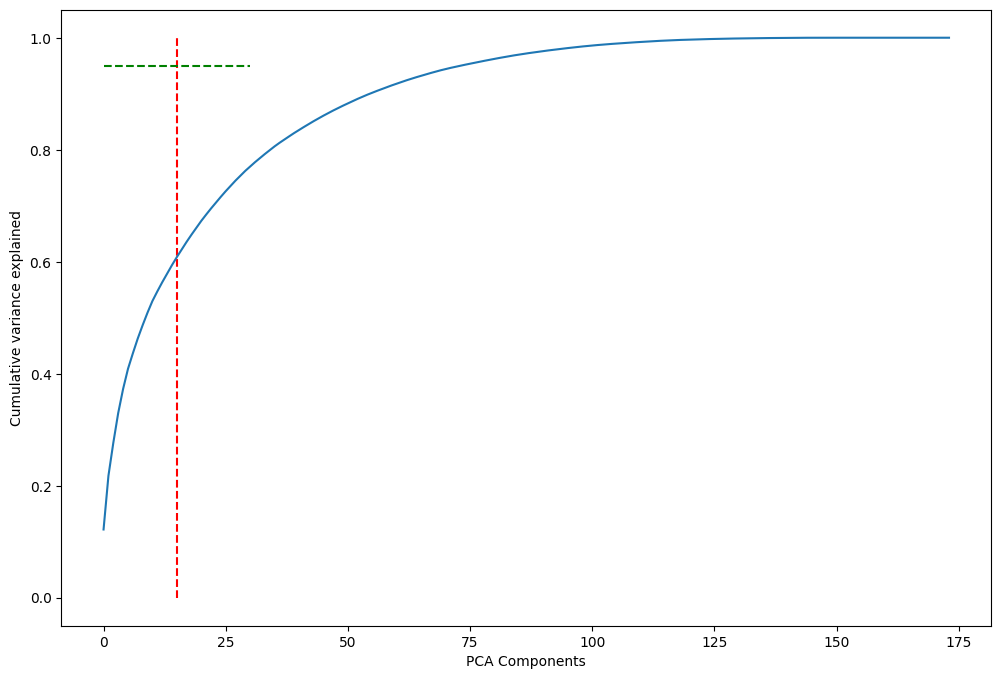

In [128]:
#  Generate feature variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("PCA Components")
plt.ylabel("Cumulative variance explained")
plt.show()


###### Observation(s):
 - 80 variables will be enough to explain 95% variance in the dataset and hence selecting 80 variables for our modelling

In [129]:
#Viewing the PCA components
pca.components_

array([[ 1.12303045e-01,  1.17440431e-01,  1.01264719e-01, ...,
         2.46778946e-02,  2.43704013e-02,  7.57197734e-03],
       [ 6.53700026e-02,  7.74872007e-02,  1.07994480e-01, ...,
         2.30151498e-02,  1.35685679e-02,  2.15879502e-02],
       [ 6.13365315e-02,  1.33886446e-01,  1.83458519e-01, ...,
         6.97002001e-02,  3.46860552e-02,  5.22839368e-02],
       ...,
       [ 0.00000000e+00,  8.10983225e-17, -7.53395487e-17, ...,
        -5.48886962e-02, -1.63445439e-01,  1.30992647e-01],
       [-0.00000000e+00, -2.54642677e-17,  1.69009085e-17, ...,
         1.74538821e-14,  1.51976080e-14, -1.20400013e-14],
       [ 0.00000000e+00,  1.75640752e-17,  1.76374282e-16, ...,
        -3.82090419e-02,  1.47978395e-02, -1.66697080e-02]])

In [130]:
# Check for generated PCA components using explained variance ratio

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.18, 21.77, 27.67, 32.98, 37.27, 40.86, 43.64, 46.28, 48.66,
       50.9 , 52.97, 54.68, 56.31, 57.85, 59.38, 60.82, 62.19, 63.54,
       64.82, 66.06, 67.28, 68.41, 69.5 , 70.54, 71.58, 72.58, 73.54,
       74.47, 75.35, 76.21, 76.99, 77.76, 78.49, 79.21, 79.9 , 80.58,
       81.21, 81.8 , 82.38, 82.96, 83.51, 84.04, 84.57, 85.08, 85.58,
       86.06, 86.52, 86.98, 87.41, 87.84, 88.25, 88.66, 89.06, 89.44,
       89.81, 90.16, 90.5 , 90.83, 91.16, 91.48, 91.78, 92.08, 92.38,
       92.66, 92.93, 93.19, 93.45, 93.7 , 93.94, 94.17, 94.39, 94.59,
       94.78, 94.97, 95.16, 95.34, 95.52, 95.7 , 95.87, 96.04, 96.21,
       96.37, 96.52, 96.67, 96.82, 96.96, 97.1 , 97.23, 97.35, 97.47,
       97.59, 97.71, 97.82, 97.93, 98.03, 98.13, 98.23, 98.32, 98.41,
       98.5 , 98.58, 98.66, 98.74, 98.81, 98.88, 98.94, 99.  , 99.06,
       99.12, 99.18, 99.23, 99.28, 99.33, 99.38, 99.43, 99.47, 99.51,
       99.55, 99.58, 99.61, 99.64, 99.67, 99.7 , 99.72, 99.74, 99.76,
       99.78, 99.8 ,

#### As mentioned earlier, we need to handle class imbalance by applying SMOTE 

In [131]:
#!pip install imblearn

# Resampling Train set to account for class imbalance

display("Applying SMOTE to normalize class imbalance ")
#from imblearn.over_sampling import SMOTE
#from sklearn import preprocessing, metrics
smote = SMOTE(random_state=42)
display("Shape of train datatset before SMOTE : "+ str(xtrain_scaled.shape))
x_smote,y_smote = smote.fit_resample(xtrain_scaled,ytrain)
display("Shape of train datatset after SMOTE : "+ str(x_smote.shape))

# Applying Incremental PCA
pca = IncrementalPCA(n_components=80)    
x_train_smote_pca = pca.fit_transform(x_smote)
x_test_smote_pca = pca.transform(xtest_scaled)
test_v1_scaled_pca = pca.transform(test_v1_scaled)


'Applying SMOTE to normalize class imbalance '

'Shape of train datatset before SMOTE : (14706, 174)'

'Shape of train datatset after SMOTE : (26980, 174)'

In [132]:
# PCA component details
X_train_pca = pd.DataFrame(x_train_smote_pca, columns=["PC_"+str(x) for x in range(0,80)])
data_train_pca = pd.concat([X_train_pca, ytrain], axis=1)

data_train_pca.head()

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
0 -1.924101  3.959222  0.147294  1.764758 -1.812147 -3.563178  8.470842   
1  0.145927 -0.307749 -3.641060  0.878825 -3.373975  0.923428 -1.276766   
2 -1.659852  5.245389 -0.844359  2.293887  0.895266 -0.934848  5.192802   
3  1.893529  9.344582 -2.956585 -2.331828 -3.477663 -1.727873  0.100092   
4  0.952581 -0.172891  2.727292 -0.635545 -4.749140 -0.783649 -0.733587   

       PC_7      PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  \
0 -0.661176  8.098729 -4.623490  2.649509 -0.019475 -0.918947 -0.501390   
1 -0.399263 -1.345343 -0.128286 -0.287580  1.817555  0.646305 -3.759641   
2  1.440554  7.473318  5.169060  1.542548 -3.828114  1.226317 -0.633051   
3 -0.621658 -1.643307 -0.330519  1.050236  1.814373  4.633873 -0.370766   
4 -0.820565 -0.515824 -1.321427 -0.587305  0.105699 -0.848881 -1.163339   

      PC_14     PC_15     PC_16     PC_17     PC_18     PC_19     PC_20  \
0 -0.233797 -0.672696 -2.989268 -1.714319  0.905105 -0.525584 -1.932221   
1 -0.525805  1.290246  0.513012 -0.334487 -2.098735 -1.135399  1.313907   
2 -0.082140  1.121360  1.489027 -1.867237 -1.314264 -1.111445 -1.136011   
3 -2.429191 -0.115849 -3.671457  0.649209 -0.437351 -2.092282  0.140276   
4 -1.636780 -1.376733 -0.202140  0.355033  0.171198  0.282077  0.246973   

      PC_21     PC_22     PC_23     PC_24     PC_25     PC_26     PC_27  \
0 -1.214644  1.196009  2.474343 -0.327255 -0.828835  0.005091  0.156368   
1 -0.069625  0.692732  1.986765  1.303776 -0.634025  0.769929  3.120274   
2  3.300821  0.190585  1.875472  0.832769  1.543378  0.717164 -2.371474   
3 -0.874947 -0.807940 -1.808683 -0.778344  0.298512 -1.065937 -0.050878   
4  0.223656  0.211940  0.365374  0.890239  0.755157 -0.167233  0.000777   

      PC_28     PC_29     PC_30     PC_31     PC_32     PC_33     PC_34  \
0 -1.823597 -1.708380 -0.056300 -0.512871  1.128857 -0.205770 -1.003842   
1 -1.647411  3.184660 -1.038570  0.668479 -2.722773 -2.243819 -1.680197   
2 -1.033301  0.868863 -1.049577 -1.695217  1.088488  2.668668 -1.408542   
3 -1.432724 -1.335153  0.570896  1.441817 -0.054969  0.806054  4.154163   
4  0.469288 -0.636188  1.357115 -0.805991  0.049216  0.603177 -1.263419   

      PC_35     PC_36     PC_37     PC_38     PC_39     PC_40     PC_41  \
0 -1.524349  0.720062  1.276512 -0.007628  1.659371 -0.074232  0.331779   
1  0.318748  1.169544  1.422641  0.661347 -0.982336 -1.076002 -0.218744   
2 -0.781569  1.373970  1.239996  0.299725  1.304197 -1.809133  0.559146   
3 -1.995611  2.259679  1.415873  3.908360 -1.150450  1.746703 -0.666867   
4 -0.461624 -0.051507 -0.028254  0.011238  1.199478 -1.082439  0.361033   

      PC_42     PC_43     PC_44     PC_45     PC_46     PC_47     PC_48  \
0 -1.537232 -0.052340  0.742404 -0.526710  0.303341 -1.430041  0.610021   
1  1.154525  0.457656  0.933098  0.012473  1.521996  3.309814  1.613009   
2  0.394803  0.820146 -0.264358 -0.023468  0.011354  0.005404  0.688136   
3  0.910619  0.710976 -1.971263  1.579096  0.267226 -0.634386 -0.033332   
4 -0.809061  0.615084 -0.471301 -0.102054  0.705469  0.256781  0.714778   

      PC_49     PC_50     PC_51     PC_52     PC_53     PC_54     PC_55  \
0  0.319260  1.462095  1.122352  0.093561  0.464182  0.188593 -1.948099   
1 -1.732554  0.266474 -1.999397  0.682011  0.764601 -1.775677  0.852240   
2  0.686413 -0.182321  1.145419  0.205792  1.464235  1.980590  0.704062   
3  0.793454 -0.148575  0.130704  0.855393 -0.078196 -0.014753 -0.080140   
4 -0.229668  0.571816 -0.044689 -0.442649 -1.048332 -0.545648 -0.056712   

      PC_56     PC_57     PC_58     PC_59     PC_60     PC_61     PC_62  \
0 -0.068475 -0.295653  1.306486 -0.491966 -0.224287 -1.097535 -0.429471   
1  1.544324 -1.471257  0.203205 -1.394114 -1.548997  0.065927 -0.261034   
2 -1.140886  0.112900 -0.125210  0.321711  0.155465  0.127475 -0.174634   
3 -0.402135 -0.479120 -1.704635 -0.609740 -0.165852 -0.140078 -0.105388   
4  0.064224  0.410011  0

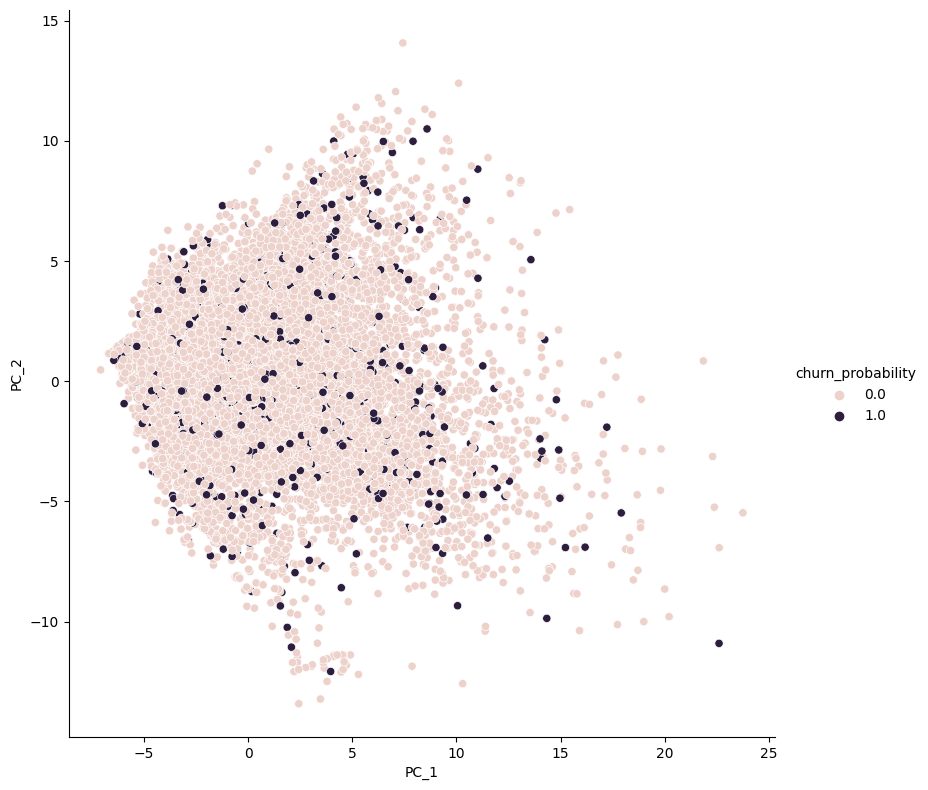

In [133]:
## Plotting principal components 
sb.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8);

In [134]:
# After Smote and PCA checking rows and columns dimensionality
display("Shape of train datatset after SMOTE and PCA : "+str(x_train_smote_pca.shape))

'Shape of train datatset after SMOTE and PCA : (26980, 80)'

In [135]:
x_test_smote_pca.shape

(6303, 80)

#### General Function to retrieve Model Evaluation Metrics 

In [136]:
def evaluate_model_metric(dt_classifier,ytrain,ytest,xtrain,xtest):
    print("Train Accuracy :", accuracy_score(ytrain, dt_classifier.predict(xtrain)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(ytrain, dt_classifier.predict(xtrain)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(ytest, dt_classifier.predict(xtest)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(ytest, dt_classifier.predict(xtest)))
    sensitivity, specificity, _ = sensitivity_specificity_support(ytest, dt_classifier.predict(xtest), average='binary')
    print("Sensitivity:", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))
    print("Recall Score:",round(metrics.recall_score(ytest,dt_classifier.predict(xtest)),2))
    print("Precision Score:",round(metrics.precision_score(ytest,dt_classifier.predict(xtest)),2))
    print("ROC AUC:",round(metrics.roc_auc_score(ytest,dt_classifier.predict(xtest)),2))
    print("F1 Score:",round(metrics.f1_score(ytest,dt_classifier.predict(xtest)),2))
    

## Model(s) Creation

### Model 1 : Logistic Regression 

 - With PCA 
 - Without Hyperparameter Tuning

In [137]:
# Logistic Regression without Hyper Parameter Turning

#Training the model on the train data

lr = LogisticRegression()
model = lr.fit(x_train_smote_pca,y_smote)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test_smote_pca)[:,1]
display("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(ytest, pred_probs_test)))
evaluate_model_metric(lr,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

'Logistic Regression Accurancy : 0.88'

Train Accuracy : 0.8648999258710156
Train Confusion Matrix:
[[11381  2109]
 [ 1536 11954]]
--------------------------------------------------
Test Accuracy : 0.8415040456925273
Test Confusion Matrix:
[[4900  882]
 [ 117  404]]
Sensitivity: 0.78
Specificity: 0.85
Recall Score: 0.78
Precision Score: 0.31
ROC AUC: 0.81
F1 Score: 0.45


#### Observation(s):

 - Minimized Feature(s) inclusion with PCA components 
 - Accuracy score also looks optimal with Base model as Logistic Regression
 - Need to review Sensitivity, Specificity, Recall and Precision score(s) which looks optimal.

### Model 2 : Logistic Regression 
 - With PCA 
 - With Hyperparameter Tuning

In [138]:
# Logistic Regression with Hyper Parameter Turning

logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)


# create gridsearch object
lr_hp = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

# fit model
lr_hp.fit(x_train_smote_pca, y_smote)

evaluate_model_metric(lr_hp,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Train Accuracy : 0.8648999258710156
Train Confusion Matrix:
[[11382  2108]
 [ 1537 11953]]
--------------------------------------------------
Test Accuracy : 0.841345391083611
Test Confusion Matrix:
[[4899  883]
 [ 117  404]]
Sensitivity: 0.78
Specificity: 0.85
Recall Score: 0.78
Precision Score: 0.31
ROC AUC: 0.81
F1 Score: 0.45


#### Observation(s):

 - Minimized Feature(s) inclusion with PCA components and inclusion of hyperparameter values.
 - Accuracy score(with 0.84 for Test) also looks optimal with Base model as Logistic Regression.
 - Will consider Sensitivity, Specificity, Recall and Precision score(s) which looks optimal and apply same on Test data in further analysis of churn probability.

#### Model 3 : Random Forest 
 - With PCA 
 - Without Hyperparameter Tuning

In [139]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train_smote_pca,y_smote)
evaluate_model_metric(rf,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 13490]]
--------------------------------------------------
Test Accuracy : 0.9121053466603205
Test Confusion Matrix:
[[5526  256]
 [ 298  223]]
Sensitivity: 0.43
Specificity: 0.96
Recall Score: 0.43
Precision Score: 0.47
ROC AUC: 0.69
F1 Score: 0.45


#### Observation(s):

 - Minimized Feature(s) inclusion with PCA components and non-inclusion of hyperparameter values.
 - Accuracy score(with 0.90 for Test) also looks optimal with Random Forest classifier than compared to earlier model.
 - In this case,Sensitivity is decreased compared to Logistic regression and will re-check for improvement with inclusion of tuning parameter values.
 

#### Model 4 : Random Forest
 - With PCA 
 - With Hyperparameter Tuning

In [140]:
# Random Forest Classifier Tuning 7: parameters = # Final Model after all the tuning

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [17],
    'n_estimators' : [200],
    'min_samples_leaf' : [15,20,25,30]
}

rf_final_model = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
rf_final_model.fit(x_train_smote_pca, y_smote)

evaluate_model_metric(rf_final_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(rf_final_model.cv_results_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Train Accuracy : 0.9585989621942179
Train Confusion Matrix:
[[12738   752]
 [  365 13125]]
--------------------------------------------------
Test Accuracy : 0.8959225765508488
Test Confusion Matrix:
[[5329  453]
 [ 203  318]]
Sensitivity: 0.61
Specificity: 0.92
Recall Score: 0.61
Precision Score: 0.41
ROC AUC: 0.77
F1 Score: 0.49


#### Observation(s):

 - Minimized Feature(s) inclusion with PCA components included best fit tuning parameter values.
 - Accuracy score(with 0.89 for Test) also looks optimal with Random Forest classifier than compared to earlier model(s).
 - Sensitivity is improved with inclusion of tuning parameter values and will be considering same to apply on Test data in further analysis of churn probability.

#### Model 5 : Decision Tree
 - With PCA 
 - With Hyperparameter Tuning

In [141]:
# Check for Best fit parameter value.
from sklearn.tree import DecisionTreeClassifier
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train_smote_pca, y_smote)

print(grid_search.best_estimator_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=100)


In [142]:
# Apply hyper parameter tuning with best calculated parameters
params = {
    'max_depth': [10],
    'min_samples_leaf': [50]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

dtc_pca1 = GridSearchCV(estimator=dtc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
dtc_pca1.fit(x_train_smote_pca, y_smote)

evaluate_model_metric(dtc_pca1,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(dtc_pca1.cv_results_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Train Accuracy : 0.8784284655300222
Train Confusion Matrix:
[[11638  1852]
 [ 1428 12062]]
--------------------------------------------------
Test Accuracy : 0.8294462954148818
Test Confusion Matrix:
[[4871  911]
 [ 164  357]]
Sensitivity: 0.69
Specificity: 0.84
Recall Score: 0.69
Precision Score: 0.28
ROC AUC: 0.76
F1 Score: 0.4


#### Observation(s):

 - Minimized Feature(s) inclusion with PCA components included best fit tuning parameter values.
 - Accuracy score(with 0.82 for Test) also looks optimal with Decision Tree Classifier which is lesser than other 2 earlier models.
 - Will be considering same as it includes good Sensitivity score than compared to Random Forest classifier and will apply on Test data in further analysis of churn probability.

#### Model 6 : Decision Tree
 - Without PCA 
 - With Hyperparameter Tuning

In [143]:
# Check for Best fit parameter value.
from sklearn.tree import DecisionTreeClassifier
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(xtrain, ytrain)
print(grid_search.best_estimator_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=100)


In [144]:
params = {
    'max_depth': [3],
    'min_samples_leaf': [50]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

dtc_final_nopca1 = GridSearchCV(estimator=dtc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
dtc_final_nopca1.fit(xtrain, ytrain)

evaluate_model_metric(dtc_final_nopca1,ytrain,ytest,xtrain,xtest)
scores = pd.DataFrame(dtc_final_nopca1.cv_results_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Train Accuracy : 0.9434924520603836
Train Confusion Matrix:
[[13265   225]
 [  606   610]]
--------------------------------------------------
Test Accuracy : 0.9416151039187688
Test Confusion Matrix:
[[5686   96]
 [ 272  249]]
Sensitivity: 0.48
Specificity: 0.98
Recall Score: 0.48
Precision Score: 0.72
ROC AUC: 0.73
F1 Score: 0.58


#### Observation(s):

 - Non-inclusion of PCA components and included best fit tuning parameter values.
 - Accuracy score(with 0.94 for Test) also looks optimal with Decision Tree Classifier which is more than earlier generated models.
 - Will NOT be considering same to apply on Test data as it includes poor Sensitivity score than compared to earlier models.

#### Model 7 : AdaBoost
 - With PCA 
 - With Default Hyperparameter Tuning

In [145]:
#Using adaBoosting to predict 'Churn Prob' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(x_train_smote_pca, y_smote)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [146]:
display('Accuracy of the Train model is:  ',accuracy_score(y_smote, adaboost.predict(x_train_smote_pca)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(x_test_smote_pca)))
evaluate_model_metric(adaboost,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

'Accuracy of the Train model is:  '

0.8872127501853224

'Accuracy of the Test model is:  '

0.8538791051880057

Train Accuracy : 0.8872127501853224
Train Confusion Matrix:
[[11865  1625]
 [ 1418 12072]]
--------------------------------------------------
Test Accuracy : 0.8538791051880057
Test Confusion Matrix:
[[5037  745]
 [ 176  345]]
Sensitivity: 0.66
Specificity: 0.87
Recall Score: 0.66
Precision Score: 0.32
ROC AUC: 0.77
F1 Score: 0.43


#### Observation(s):

 - Inclusion of PCA components and ADABOOST default parameter values.
 - Accuracy score of Train and Test is not looking Optimal.
 - Will NOT be considering same to apply on Test data and will re-check with further combination of ADABOOST classifier.

#### Model 8 : AdaBoost
 - Without PCA 
 - With Default Hyperparameter Tuning

In [147]:
#Using xtrain and ytrain without PCA, build ADABOOST
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [148]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, adaboost.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(xtest)))
evaluate_model_metric(adaboost,ytrain,ytest,xtrain,xtest)

'Accuracy of the Train model is:  '

0.9471644226846185

'Accuracy of the Test model is:  '

0.9370141202601936

Train Accuracy : 0.9471644226846185
Train Confusion Matrix:
[[13234   256]
 [  521   695]]
--------------------------------------------------
Test Accuracy : 0.9370141202601936
Test Confusion Matrix:
[[5665  117]
 [ 280  241]]
Sensitivity: 0.46
Specificity: 0.98
Recall Score: 0.46
Precision Score: 0.67
ROC AUC: 0.72
F1 Score: 0.55


#### Observation(s):

 - Non - Inclusion of PCA components and considered ADABOOST default parameter values.
 - Accuracy score of Train and Test are looking very much closer - Need to review same     with inclusion of best fit tuning parameter values.
 - Will NOT be considering same to apply on Test data and will re-check with further combination of ADABOOST classifier.
 

#### Model 9 : AdaBoost
 - Without PCA 
 - With Hyperparameter Tuning

In [149]:
##Using xtrain and ytrain without PCA, build ADABOOST with hyperparameter tuning
params = {
        'n_estimators' : [50,100, 200], # no of trees   # eta
        'algorithm': ['SAMME', 'SAMME.R'],
        }

folds = 5

param_comb = 800

random_search_ada = RandomizedSearchCV(adaboost, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search_ada.fit(xtrain, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..algorithm=SAMME, n_estimators=50;, score=0.933 total time=   8.3s
[CV 2/5] END ..algorithm=SAMME, n_estimators=50;, score=0.944 total time=   8.6s
[CV 3/5] END ..algorithm=SAMME, n_estimators=50;, score=0.940 total time=   8.6s
[CV 4/5] END ..algorithm=SAMME, n_estimators=50;, score=0.945 total time=   8.7s
[CV 5/5] END ..algorithm=SAMME, n_estimators=50;, score=0.934 total time=   8.3s
[CV 1/5] END .algorithm=SAMME, n_estimators=100;, score=0.932 total time=  16.5s
[CV 2/5] END .algorithm=SAMME, n_estimators=100;, score=0.944 total time=  16.5s
[CV 3/5] END .algorithm=SAMME, n_estimators=100;, score=0.941 total time=  16.6s
[CV 4/5] END .algorithm=SAMME, n_estimators=100;, score=0.942 total time=  16.6s
[CV 5/5] END .algorithm=SAMME, n_estimators=100;, score=0.936 total time=  16.8s
[CV 2/5] END .algorithm=SAMME, n_estimators=200;, score=0.945 total time=  33.0s
[CV 1/5] END .algorithm=SAMME, n_estimators=200;,

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=1),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=3)

In [150]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, random_search_ada.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, random_search_ada.predict(xtest)))
evaluate_model_metric(adaboost,ytrain,ytest,xtrain,xtest)

'Accuracy of the Train model is:  '

0.94281245750034

'Accuracy of the Test model is:  '

0.9381247025226083

Train Accuracy : 0.9471644226846185
Train Confusion Matrix:
[[13234   256]
 [  521   695]]
--------------------------------------------------
Test Accuracy : 0.9370141202601936
Test Confusion Matrix:
[[5665  117]
 [ 280  241]]
Sensitivity: 0.46
Specificity: 0.98
Recall Score: 0.46
Precision Score: 0.67
ROC AUC: 0.72
F1 Score: 0.55


#### Observation(s):

 - Non - Inclusion of PCA components and considered tuning parameter values.
 - Accuracy score of Train and Test are looking very much closer with optimal Sensitivity and Precision score.
 - Will be considering same to apply on Test data in further analysis of churn probability.

#### Model 10 : XGBoost
 - With PCA 
 - Without Hyperparameter Tuning

In [151]:
### XG Boost - Model 1 
# fit model on training data with default hyperparameters

XGB_model = XGBClassifier()
XGB_model.fit(x_train_smote_pca, y_smote)
evaluate_model_metric(XGB_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 0.9992587101556709
Train Confusion Matrix:
[[13470    20]
 [    0 13490]]
--------------------------------------------------
Test Accuracy : 0.9067110899571632
Test Confusion Matrix:
[[5436  346]
 [ 242  279]]
Sensitivity: 0.54
Specificity: 0.94
Recall Score: 0.54
Precision Score: 0.45
ROC AUC: 0.74
F1 Score: 0.49


#### Observation(s):

 - Inclusion of PCA components and considered default values of XGBOOST classifier.
 - Accuracy score of Train and Test arelooking optimal 
 - Sensitivity and Precision score are looking optimal.
 - Will be considering to review with inclusion of best fit tuning parameter values.

#### Model 11 : XGBoost
 - With PCA 
 - With Hyperparameter Tuning

In [152]:
# hyperparameter tuning with XGBoost

# creating a KFold object with 5 folds
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model_tune = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model_tune, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(x_train_smote_pca, y_smote)
evaluate_model_metric(model_cv,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 0.924351371386212
Train Confusion Matrix:
[[12230  1260]
 [  781 12709]]
--------------------------------------------------
Test Accuracy : 0.875614786609551
Test Confusion Matrix:
[[5158  624]
 [ 160  361]]
Sensitivity: 0.69
Specificity: 0.89
Recall Score: 0.69
Precision Score: 0.37
ROC AUC: 0.79
F1 Score: 0.48


In [153]:
# displaying the best accuracy score and hyperparameters
print('We  get best score of '+str(round(model_cv.best_score_,2)) +' using parameters '+str(model_cv.best_params_))

We  get best score of 0.9 using parameters {'learning_rate': 0.3, 'subsample': 0.5}


In [154]:
param_grid = {'learning_rate': [0.3], 
              'subsample': [0.5],
               'gamma': [1],
              'objective':['binary:logistic']
             }    

# tune model with best hyperparameter values

xgb_model_hyperp = XGBClassifier(max_depth=3,n_estimators=200, n_jobs=-1,min_child_weight=1,scale_pos_weight = 1)

# set up GridSearchCV()
xgb_model_tune_2 = GridSearchCV(estimator = xgb_model_hyperp, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
xgb_model_tune_2.fit(x_train_smote_pca, y_smote)
evaluate_model_metric(xgb_model_tune_2,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy : 0.9657524091919941
Train Confusion Matrix:
[[12786   704]
 [  220 13270]]
--------------------------------------------------
Test Accuracy : 0.8913215928922735
Test Confusion Matrix:
[[5301  481]
 [ 204  317]]
Sensitivity: 0.61
Specificity: 0.92
Recall Score: 0.61
Precision Score: 0.4
ROC AUC: 0.76
F1 Score: 0.48


#### Observation(s):

 - Inclusion of PCA components and considered best fit tuning parameter values.
 - Accuracy score of Train and Test are looking optimal 
 - Sensitivity and Precision score are looking optimal.
 - Will be considering to review without PCA for better Precision score.

#### Model 12 : XGBoost
 - Without PCA 
 - With Hyperparameter Tuning

In [155]:
# hyperparameter tuning with XGBoost

# creating a KFold object with 5 folds
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model_tune = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
xgb_model_no_pca = GridSearchCV(estimator = xgb_model_tune, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

xgb_model_no_pca.fit(xtrain, ytrain)
evaluate_model_metric(xgb_model_no_pca,ytrain,ytest,xtrain,xtest)
scores = pd.DataFrame(xgb_model_no_pca.cv_results_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 0.9512443900448796
Train Confusion Matrix:
[[13268   222]
 [  495   721]]
--------------------------------------------------
Test Accuracy : 0.9406631762652705
Test Confusion Matrix:
[[5679  103]
 [ 271  250]]
Sensitivity: 0.48
Specificity: 0.98
Recall Score: 0.48
Precision Score: 0.71
ROC AUC: 0.73
F1 Score: 0.57


In [156]:
# displaying the best accuracy score and hyperparameters
print('We  get best score of '+str(round(xgb_model_no_pca.best_score_,2)) +' using parameters '+str(xgb_model_no_pca.best_params_))

We  get best score of 0.95 using parameters {'learning_rate': 0.1, 'subsample': 0.4}


In [157]:
##Using xtrain and ytrain without PCA, build ADABOOST with hyperparameter tuning
param_grid = {'learning_rate': [0.1], 
             'subsample': [0.4]
             }     

folds = 5
xgb_model_tune = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)
xgb_model_no_pca1 = RandomizedSearchCV(estimator = xgb_model_tune, 
                        param_distributions = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)
xgb_model_no_pca1.fit(xtrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=2,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=200, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1],
                                        'subsample': [0.4]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [158]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, xgb_model_no_pca1.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, xgb_model_no_pca1.predict(xtest)))
evaluate_model_metric(xgb_model_no_pca1,ytrain,ytest,xtrain,xtest)

'Accuracy of the Train model is:  '

0.9512443900448796

'Accuracy of the Test model is:  '

0.9406631762652705

Train Accuracy : 0.9512443900448796
Train Confusion Matrix:
[[13268   222]
 [  495   721]]
--------------------------------------------------
Test Accuracy : 0.9406631762652705
Test Confusion Matrix:
[[5679  103]
 [ 271  250]]
Sensitivity: 0.48
Specificity: 0.98
Recall Score: 0.48
Precision Score: 0.71
ROC AUC: 0.73
F1 Score: 0.57


#### Observation(s):

 - Inclusion of PCA components and considered best fit tuning parameter values.
 - Accuracy score of Train and Test are looking optimal 
 - Sensitivity and Precision score are looking optimal than compared to earlier models.
 - Will be considering same to apply on Test data in further analysis of churn probability

#### Predict results on provided "Test" data file based on below derived multiple model outputs.

- Logistic Regression with PCA and Hyperparameter values resulted in good sensivity score.
- RandomForest Classifier with PCA and Hyperparameter valules with good sensitivity score and accuracy score. 
- Decistion Tree with PCA and Hyperparameter values due to good sensitivity score than compared to Random Forest.
- ADABoost without PCA and inclusion of best fit hyperparameter tuning values due to good sensitivity as well as precision score 
- XGBoost without PCA and inclusion of best fit hyperparameter tuning values due to improved sensitivity and precision

In [159]:
# Check to ensure dimensionality on "Test" data file is intact
test_v1.shape

(30000, 174)

In [160]:
# Predict on "Test" using XGBOOOST without PCA
churn_probability_XGB = xgb_model_no_pca1.predict(test_v1)
csvdata = {'id':test['id'],'churn_probability_xgboost':churn_probability_XGB}
df = pd.DataFrame(csvdata)
display(df.shape)

(30000, 2)

In [161]:
#find the churn prob value count
df['churn_probability_xgboost'].value_counts()

churn_probability_xgboost
0    28166
1     1834
Name: count, dtype: int64

In [162]:
# Predict on "Test" using Logistic Regression with PCA applied.
churn_probability_logistic = lr_hp.predict(test_v1_scaled_pca)
df['churn_probability_logistic'] = pd.DataFrame(churn_probability_logistic,columns=['churn_probability_logistic'])
display(df.shape)

(30000, 3)

In [163]:
df['churn_probability_logistic'].value_counts()

churn_probability_logistic
0    25162
1     4838
Name: count, dtype: int64

In [164]:
# Random Forest Final model with hyperparater tuning
churn_probability_randomforest = rf_final_model.predict(test_v1_scaled_pca)
df['churn_probability_randomforest'] = pd.DataFrame(churn_probability_randomforest,columns=['churn_probability_randomforest'])
display(df.shape)

(30000, 4)

In [165]:
df['churn_probability_randomforest'].value_counts()

churn_probability_randomforest
0    30000
Name: count, dtype: int64

In [166]:
# Decision Tree Final model with PCA and hyperparameter tuning
churn_probability_decisiontree = dtc_pca1.predict(test_v1_scaled_pca)
df['churn_probability_decisiontree'] = pd.DataFrame(churn_probability_decisiontree,columns=['churn_probability_decisiontree'])
display(df.shape)

(30000, 5)

In [167]:
df['churn_probability_decisiontree'].value_counts()

churn_probability_decisiontree
1    19415
0    10585
Name: count, dtype: int64

In [168]:
#Print churn probability of different model for respective id
df.head()

id  churn_probability_xgboost  churn_probability_logistic  \
0  69999                          0                           0   
1  70000                          0                           0   
2  70001                          1                           0   
3  70002                          0                           0   
4  70003                          0                           1   

   churn_probability_randomforest  churn_probability_decisiontree  
0                               0                               1  
1                               0                               0  
2                               0                               1  
3                               0                               1  
4                               0                               0

In [169]:
# Adaboost without PCA and inclusion of best fit tuning parameter values

churn_probability_adaboost = random_search_ada.predict(test_v1)
df['churn_probability_adaboost'] = pd.DataFrame(churn_probability_adaboost,columns=['churn_probability_adaboost'])


In [170]:
df.shape

(30000, 6)

In [171]:
df.head()

id  churn_probability_xgboost  churn_probability_logistic  \
0  69999                          0                           0   
1  70000                          0                           0   
2  70001                          1                           0   
3  70002                          0                           0   
4  70003                          0                           1   

   churn_probability_randomforest  churn_probability_decisiontree  \
0                               0                               1   
1                               0                               0   
2                               0                               1   
3                               0                               1   
4                               0                               0   

   churn_probability_adaboost  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0

In [172]:
df['churn_probability_adaboost'].value_counts()

churn_probability_adaboost
0    27821
1     2179
Name: count, dtype: int64

In [173]:
#Sum up all churn prob
df['total_churn'] = df['churn_probability_xgboost'] + df['churn_probability_adaboost'] + df['churn_probability_randomforest']+df['churn_probability_decisiontree']

In [174]:
#Derive final churn prob: if value is more than 1 then 1 else 0; Conisdering if two or more model results 1 then 1
df['Total_Case1'] = df['total_churn'].apply(lambda x : 1 if x>1 else 0)

In [175]:
df['Total_Case1'].value_counts()

Total_Case1
0    27771
1     2229
Name: count, dtype: int64

In [176]:
df.head()

id  churn_probability_xgboost  churn_probability_logistic  \
0  69999                          0                           0   
1  70000                          0                           0   
2  70001                          1                           0   
3  70002                          0                           0   
4  70003                          0                           1   

   churn_probability_randomforest  churn_probability_decisiontree  \
0                               0                               1   
1                               0                               0   
2                               0                               1   
3                               0                               1   
4                               0                               0   

   churn_probability_adaboost  total_churn  Total_Case1  
0                           0            1            0  
1                           0            0            0  
2                           1            3            1  
3                           0            1            0  
4                           0            0            0

In [177]:
#Execute command to export the results of test data
df[['id','Total_Case1']].to_csv('final_model.csv',index=False)

 #### Observation(s):
 
 - In order to improve further accuracy lets build another set of models on train data directly instead of spliting.

#### Case 2: Generating various models with / without PCA applied on X and Y train


In [178]:
# Create a copy of "High Valued" customer Data and explicitly provided test data.
trainX = X.copy()
trainY = Y.copy()

display(trainX.shape,trainY.shape)

(21009, 174)

(21009,)

In [179]:
# Aggregating the Categorical Columns

Dtrain = pd.concat([trainX, trainY], axis=1)

# aggregate the categorical variables
display(Dtrain.groupby('night_pck_user_6').churn_probability.mean())
display(Dtrain.groupby('night_pck_user_7').churn_probability.mean())
display(Dtrain.groupby('night_pck_user_8').churn_probability.mean())
display(Dtrain.groupby('fb_user_6').churn_probability.mean())
display(Dtrain.groupby('fb_user_7').churn_probability.mean())
display(Dtrain.groupby('fb_user_8').churn_probability.mean())

night_pck_user_6
-1.0    0.099925
 0.0    0.067941
 1.0    0.109091
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.116903
 0.0    0.056424
 1.0    0.062500
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.142189
 0.0    0.030350
 1.0    0.029412
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.099925
 0.0    0.080432
 1.0    0.068025
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.116903
 0.0    0.070099
 1.0    0.055439
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.142189
 0.0    0.076923
 1.0    0.024883
Name: churn_probability, dtype: float64

In [180]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099925, 0: 0.067941, 1: 0.109091},
           'night_pck_user_7' : {-1: 0.116903, 0: 0.056424, 1: 0.062500},
           'night_pck_user_8' : {-1: 0.142189, 0: 0.030350, 1: 0.029412},
           'fb_user_6'        : {-1: 0.099925, 0: 0.080432, 1: 0.068025},
           'fb_user_7'        : {-1: 0.116903, 0: 0.070099, 1: 0.055439},
           'fb_user_8'        : {-1: 0.142189, 0: 0.076923, 1: 0.024883}
          }
trainX.replace(mapping, inplace = True)

##### Check for Class imbalance existence

In [181]:
Y.value_counts(normalize=True).to_frame()

proportion
churn_probability            
0                    0.917321
1                    0.082679

In [182]:
# Ratio of classes 
class_0 = Y[Y == 0].count()
class_1 = Y[Y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.09


#### Data Scaling

In [183]:
#Scaling on entire set 

# Scaling the data - Using Standard Scaler
col = list(trainX.columns)
# Data Scaling
scaler1 = StandardScaler()
trainX_scaled = scaler1.fit_transform(trainX)
testX_v1_scaled = scaler1.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(trainX)
trainx_pca = pca.fit_transform(trainX_scaled)

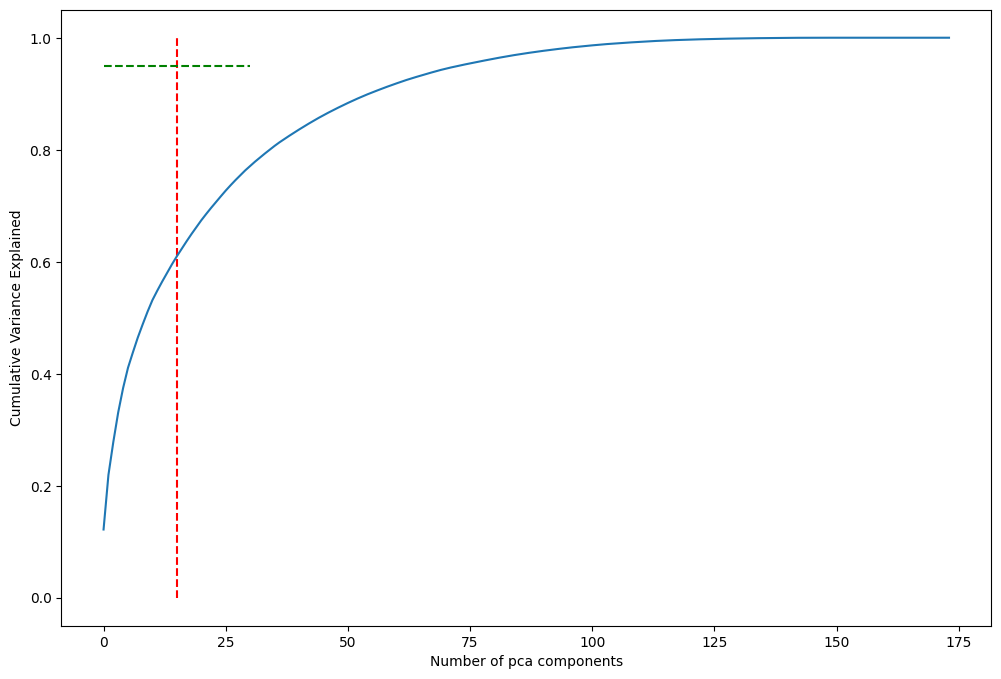

In [184]:
#  Plot variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Number of pca components")
plt.show()

##### Observation(s):

 - 80 variables will be enough to explain 95% variance in the dataset and hence selecting 80 variables for our modelling

#### Handling Class Imbalance using SMOTE

In [185]:
# Resampling Train set to account for class imbalance

smote = SMOTE(random_state=42)
trainX_smote,trainY_smote = smote.fit_resample(trainX_scaled,trainY)
display("Shape of train datatset after SMOTE : "+ str(trainX_smote.shape))

# Applying Incremental PCA
pca = IncrementalPCA(n_components=80)    
trainX_smote_pca = pca.fit_transform(trainX_smote)
testX_v1_scaled_pca = pca.transform(testX_v1_scaled)

'Shape of train datatset after SMOTE : (38544, 174)'

In [186]:
# PCA component details
XTrain2_pca = pd.DataFrame(trainX_smote_pca, columns=["PC_"+str(x) for x in range(0,80)])
data_train2_pca = pd.concat([XTrain2_pca, trainY], axis=1)

data_train2_pca.head()

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
0 -5.226698 -4.306890  3.107066 -2.873481  3.310112  2.550507  0.493470   
1 -3.139468  3.974754 -0.825987 -2.641010 -1.455823 -1.091352 -2.219745   
2  4.165079  3.664648 -5.014540 -2.914383  1.318559 -0.745329  1.034929   
3 -0.788368 -0.974647  0.251540 -1.682244  0.250530 -0.227425 -2.358933   
4 -6.087285  1.799040 -1.580367  0.018544  1.176543 -0.340166 -1.055878   

       PC_7      PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  \
0  0.644548 -1.796976 -0.303806  1.338720  0.334183  1.543541 -1.523790   
1  2.211345  0.194111 -1.330472  1.797223 -2.124702  0.057431  0.768743   
2  1.386656 -1.106090 -0.116475 -1.694987  0.549619 -0.385376 -1.159022   
3  0.401796  0.325514 -0.023636  1.069114 -0.621374 -0.931004 -1.179115   
4  2.271858  0.429502 -0.835334  1.273431 -0.001214  1.696763  1.087326   

      PC_14     PC_15     PC_16     PC_17     PC_18     PC_19     PC_20  \
0  0.392643 -0.189647 -1.095708  0.011738 -0.617993  0.873345  0.512351   
1 -1.268534  0.521633 -0.165553  0.729325 -2.321419  0.252041 -0.421596   
2 -0.032900 -1.693161 -0.315229 -2.470626  0.289932 -1.592239 -2.354951   
3 -1.211525  0.432188 -0.344672 -0.447769  0.385951  0.633713  0.027046   
4  0.150337 -1.956580 -0.724545  3.141188  0.942735 -0.505952  0.638885   

      PC_21     PC_22     PC_23     PC_24     PC_25     PC_26     PC_27  \
0 -0.360202 -0.439414 -0.680293 -0.324687  0.097367 -0.613723 -0.574711   
1  1.170625  0.183457  0.284335  1.526910  1.488777  0.162803 -0.482516   
2  0.064897 -0.691405  0.075775 -0.392945  0.565972  0.770394  1.585895   
3 -0.275455  0.264411  0.243420 -0.609440  0.448220 -0.747920 -1.559669   
4  1.343882 -1.291664 -1.123272  0.346277 -0.819310  0.334255 -0.778492   

      PC_28     PC_29     PC_30     PC_31     PC_32     PC_33     PC_34  \
0  0.610270  0.284237 -0.129656 -0.341357  0.548983 -0.615328 -0.050363   
1 -0.780446 -2.390747  0.724413  1.271911 -1.245339  0.912219 -1.007460   
2  1.283075  2.709809  1.855742 -0.611239 -0.342138 -0.121002  0.405498   
3 -0.685672 -0.265062  0.279446  0.448850 -0.298827 -0.097685  0.328656   
4 -1.318734  3.160189  0.007784  0.981858 -0.381213 -1.037063  1.354252   

      PC_35     PC_36     PC_37     PC_38     PC_39     PC_40     PC_41  \
0 -0.884334 -0.519497  0.102811 -0.071428 -0.788789  1.192376 -0.775347   
1  0.121968 -0.488292 -0.096881 -1.353810 -0.325583  0.598631  0.379845   
2 -0.517792  0.338148 -1.838762  0.956169  0.335224 -0.840902 -0.133180   
3  0.468698 -1.309433  0.015691  0.362950  0.019820 -0.208854 -0.306490   
4  0.492954  0.582867 -0.115669  0.752718  0.395530 -0.513179 -0.189722   

      PC_42     PC_43     PC_44     PC_45     PC_46     PC_47     PC_48  \
0 -0.817630 -1.489240  0.080603  0.495295  0.106034  0.546431 -0.172003   
1 -1.041511 -1.199322 -0.387553  1.019456 -1.132777 -0.553660 -0.258074   
2 -1.346171 -0.499161 -1.034403 -0.006738 -0.733233  0.396613 -0.064867   
3  0.057080  0.064144 -0.380721  1.335341  0.021941  0.804394 -0.667797   
4 -0.469648 -1.009446  0.476438  0.903972 -1.174193 -1.248969 -0.221348   

      PC_49     PC_50     PC_51     PC_52     PC_53     PC_54     PC_55  \
0  0.362442 -1.169764  0.357591  0.350984  0.074494  0.086154 -0.026398   
1 -0.244397  0.053936 -1.249356  0.640460 -0.935042 -0.098235  0.822370   
2  0.048762 -1.059485  0.070186 -0.511120  0.686901 -0.069222 -0.982190   
3 -0.456163  0.272659 -0.364441 -0.221189 -0.055976 -0.011681  0.129986   
4 -0.570734 -0.509712 -0.306460  1.509320  0.389178  0.473073 -0.489727   

      PC_56     PC_57     PC_58     PC_59     PC_60     PC_61     PC_62  \
0  0.313535 -0.115447 -0.329142 -0.213134  0.139046  0.265741 -0.036294   
1 -0.542855 -1.379570  0.440020 -1.711656  0.274697 -1.235588  0.232530   
2  0.183939  0.085645 -0.673679 -0.089147  0.495158 -1.950396  0.143792   
3  0.078636 -0.112761 -0.078663  0.078246  0.202033 -0.063884  0.281407   
4  0.221527  1.448534 -0

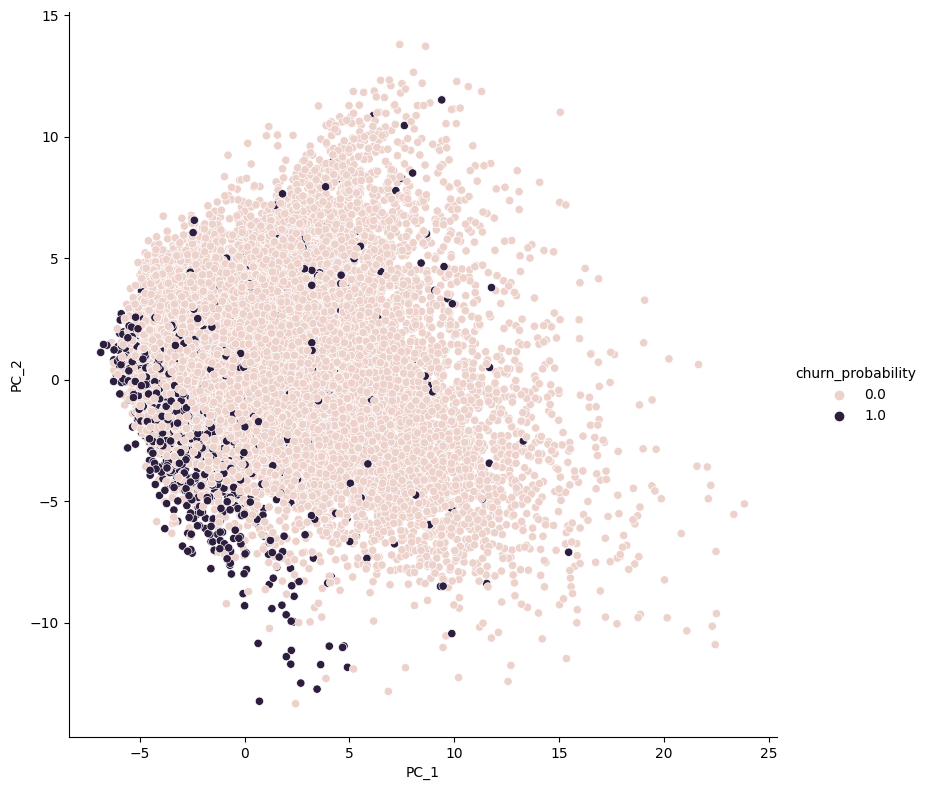

In [187]:
## Plotting principal components 
sb.pairplot(data=data_train2_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8);

##### Generating various models which were baselined in Case1

#### Model 13 : Random Forest
 - With PCA 
 - With Hyperparameter Tuning

In [188]:
# Random Forest Classifier - using same hyperparameters that we derived before on split train set

cv = KFold(n_splits=4, shuffle=True, random_state=1)

rf_test = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

params = {
    'max_depth': [17],
    'n_estimators' : [200],
    'min_samples_leaf' : [15,30]
}

rf_final_model = GridSearchCV(estimator=rf_test,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
rf_final_model.fit(trainX_smote_pca, trainY_smote)

scores = pd.DataFrame(rf_final_model.cv_results_)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


In [189]:
#Check for Train Accuracy details and confusion matrix details on Train data

display("Train Accuracy:", accuracy_score(trainY_smote, rf_final_model.predict(trainX_smote_pca)))
display("Train Confusion Matrix:",confusion_matrix(trainY_smote, rf_final_model.predict(trainX_smote_pca)))


'Train Accuracy:'

0.9545195101701951

'Train Confusion Matrix:'

array([[18147,  1125],
       [  628, 18644]])

#### Model 14 : AdaBoost
 - Without PCA 
 - With Hyperparameter Tuning

In [190]:
#Using adaBoosting
adaboost_1 =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost_1.fit(trainX, trainY)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [191]:
display('Accuracy of the Train model is:  ',accuracy_score(trainY, adaboost_1.predict(trainX)))

'Accuracy of the Train model is:  '

0.944642772145271

In [192]:
# Adaboost with Hyperparameter Tuning
param = {
        'n_estimators' : [50,100, 200], 
        'algorithm': ['SAMME', 'SAMME.R'],
        }

cv = KFold(n_splits=5, shuffle=True, random_state=1)

param_comb = 800

random_search_ada_1 = RandomizedSearchCV(adaboost_1, param_distributions=param, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=cv, verbose=3, random_state=42)
random_search_ada_1.fit(trainX, trainY)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 3/5] END ..algorithm=SAMME, n_estimators=50;, score=0.940 total time=  12.1s
[CV 1/5] END ..algorithm=SAMME, n_estimators=50;, score=0.941 total time=  12.2s
[CV 2/5] END ..algorithm=SAMME, n_estimators=50;, score=0.935 total time=  12.3s
[CV 4/5] END ..algorithm=SAMME, n_estimators=50;, score=0.942 total time=  12.3s
[CV 5/5] END ..algorithm=SAMME, n_estimators=50;, score=0.942 total time=  12.0s
[CV 1/5] END .algorithm=SAMME, n_estimators=100;, score=0.944 total time=  24.5s
[CV 2/5] END .algorithm=SAMME, n_estimators=100;, score=0.936 total time=  24.4s
[CV 3/5] END .algorithm=SAMME, n_estimators=100;, score=0.939 total time=  24.7s
[CV 4/5] END .algorithm=SAMME, n_estimators=100;, score=0.943 total time=  24.2s
[CV 5/5] END .algorithm=SAMME, n_estimators=100;, score=0.941 total time=  24.2s
[CV 1/5] END .algorithm=SAMME, n_estimators=200;, score=0.945 total time=  48.4s
[CV 2/5] END .algorithm=SAMME, n_estimators=200;,

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=1),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=3)

In [193]:
display('Accuracy of the Train model is:  ',accuracy_score(trainY, random_search_ada_1.predict(trainX)))

'Accuracy of the Train model is:  '

0.941834451901566

#### Model 15 : XGBoost
 - With PCA 
 - With Hyperparameter Tuning

In [194]:
### XG Boost Model-1: fit model on training data with default hyperparameters

xgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1,learning_rate=.3,subsample=.5)
xgb_model.fit(trainX_scaled, trainY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [195]:

# creating a KFold object 
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model_1 = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv_1 = GridSearchCV(estimator = xgb_model_1, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv_1.fit(trainX_smote_pca, trainY_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.4, 0.5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [196]:
# displaying the best accuracy score and hyperparameters
display('We  get best score of '+str(round(model_cv_1.best_score_,2)) +' using parameters: '+str(model_cv_1.best_params_))

"We  get best score of 0.89 using parameters: {'learning_rate': 0.3, 'subsample': 0.4}"

In [197]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.3], 
              'subsample': [0.4],
               'gamma': [1],
              'objective':['binary:logistic']
             }          


# specify model
xgb_model_tune_fit = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv_2 = GridSearchCV(estimator = xgb_model_tune_fit, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

model_cv_2.fit(trainX_smote_pca, trainY_smote)

display('Accuracy of the Train model is:  ',accuracy_score(trainY_smote, model_cv_2.predict(trainX_smote_pca)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


'Accuracy of the Train model is:  '

0.9084163553341635

#### Model 16 : Decision Tree
 - With PCA 
 - With Hyperparameter Tuning

In [198]:
# Apply hyper parameter tuning with best calculated parameters
params = {
    'max_depth': [10],
    'min_samples_leaf': [50]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

dtc_pca1 = GridSearchCV(estimator=dtc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)

dtc_pca1.fit(trainX_smote_pca, trainY_smote)

display('Accuracy of the Train model is:  ',accuracy_score(trainY_smote, model_cv_2.predict(trainX_smote_pca)))


Fitting 4 folds for each of 1 candidates, totalling 4 fits


'Accuracy of the Train model is:  '

0.9084163553341635

In [199]:
# Random Forest 
churn_probability_randomforest_1 = rf_final_model.predict(testX_v1_scaled_pca)
df['churn_probability_randomforest_1'] = pd.DataFrame(churn_probability_randomforest_1,columns=['churn_probability_randomforest_1'])
display(df.shape)

(30000, 9)

In [200]:
# XGBOOST 
churn_XGBOOST_1 = model_cv_2.predict(testX_v1_scaled_pca)
df['churn_XGBOOST_1'] = pd.DataFrame(churn_XGBOOST_1,columns=['churn_XGBOOST_1'])
display(df.shape)

(30000, 10)

In [201]:
#ADABOOST
churn_probability_adaboost_1 = random_search_ada_1.predict(test_v1)
df['churn_probability_adaboost_1'] = pd.DataFrame(churn_probability_adaboost_1,columns=['churn_probability_adaboost_1'])
display(df.shape)

(30000, 11)

In [202]:
#Decision Tree
churn_probability_decisiontree_1 = dtc_pca1.predict(testX_v1_scaled_pca)
df['churn_probability_decisiontree_1'] = pd.DataFrame(churn_probability_decisiontree_1,columns=['churn_probability_decisiontree_1'])
display(df.shape)


(30000, 12)

In [203]:
df['churn_probability_decisiontree_1'].value_counts()

churn_probability_decisiontree_1
1    15324
0    14676
Name: count, dtype: int64

In [204]:
df.head()

id  churn_probability_xgboost  churn_probability_logistic  \
0  69999                          0                           0   
1  70000                          0                           0   
2  70001                          1                           0   
3  70002                          0                           0   
4  70003                          0                           1   

   churn_probability_randomforest  churn_probability_decisiontree  \
0                               0                               1   
1                               0                               0   
2                               0                               1   
3                               0                               1   
4                               0                               0   

   churn_probability_adaboost  total_churn  Total_Case1  \
0                           0            1            0   
1                           0            0            0   
2                           1            3            1   
3                           0            1            0   
4                           0            0            0   

   churn_probability_randomforest_1  churn_XGBOOST_1  \
0                                 0                0   
1                                 0                0   
2                                 0                0   
3                                 0                0   
4                                 0                0   

   churn_probability_adaboost_1  churn_probability_decisiontree_1  
0                             0                                 1  
1                             0                                 1  
2                             1                                 0  
3                             0                                 0  
4                             0                                 0

In [205]:
df['total_churn_1'] = df['churn_XGBOOST_1'] + df['churn_probability_adaboost_1'] + df['churn_probability_randomforest_1']+df['churn_probability_decisiontree_1']

In [206]:
df['Total_Case2'] = df['total_churn_1'].apply(lambda x : 1 if x>1 else 0)

In [207]:
df['Total_sum'] = df['Total_Case2'] + df['Total_Case1']

In [208]:
df['churn_probability'] = df['Total_sum'].apply(lambda x : 1 if x>=1 else 0)

In [209]:
df['churn_probability'].value_counts()

churn_probability
0    27534
1     2466
Name: count, dtype: int64

In [210]:
df.head()

id  churn_probability_xgboost  churn_probability_logistic  \
0  69999                          0                           0   
1  70000                          0                           0   
2  70001                          1                           0   
3  70002                          0                           0   
4  70003                          0                           1   

   churn_probability_randomforest  churn_probability_decisiontree  \
0                               0                               1   
1                               0                               0   
2                               0                               1   
3                               0                               1   
4                               0                               0   

   churn_probability_adaboost  total_churn  Total_Case1  \
0                           0            1            0   
1                           0            0            0   
2                           1            3            1   
3                           0            1            0   
4                           0            0            0   

   churn_probability_randomforest_1  churn_XGBOOST_1  \
0                                 0                0   
1                                 0                0   
2                                 0                0   
3                                 0                0   
4                                 0                0   

   churn_probability_adaboost_1  churn_probability_decisiontree_1  \
0                             0                                 1   
1                             0                                 1   
2                             1                                 0   
3                             0                                 0   
4                             0                                 0   

   total_churn_1  Total_Case2  Total_sum  churn_probability  
0              1            0          0                  0  
1              1            0          0                  0  
2              1            0          1                  1  
3              0            0          0                  0  
4              0            0          0                  0

In [211]:
# Export "churn_probability" results to submission.csv file
df[['id','churn_probability']].to_csv('submission.csv',index=False)

### Recommended Model :

 - From above, we would recommend XGBoost as the preferred model for churn prediction.
 
 - **XGBoost** provides a built-in feature importance ranking, allowing us to easily identify the most influential features in predicting churn. This aligns with our goal of understanding the key factors contributing to churn.


#### Check for Feature(s) Importance

In [212]:
xgb_model.feature_importances_

array([0.00580035, 0.00697219, 0.00522264, 0.00245783, 0.00520968,
       0.00710439, 0.00391755, 0.00368342, 0.00551714, 0.        ,
       0.00515534, 0.00534465, 0.00513043, 0.00451126, 0.01807566,
       0.00417708, 0.00487079, 0.00482656, 0.00477146, 0.00416375,
       0.00859037, 0.00494008, 0.00841419, 0.00783195, 0.00458536,
       0.00539613, 0.0048817 , 0.00492846, 0.0039984 , 0.00594827,
       0.00802058, 0.00660701, 0.00374301, 0.00487526, 0.00397225,
       0.00405025, 0.00431808, 0.        , 0.00335435, 0.00312041,
       0.0028907 , 0.01353951, 0.        , 0.        , 0.        ,
       0.00520313, 0.00401243, 0.0046016 , 0.0069737 , 0.        ,
       0.        , 0.0054371 , 0.00325695, 0.00702449, 0.00428863,
       0.0034281 , 0.00423555, 0.00400891, 0.0039257 , 0.01168548,
       0.00333813, 0.00538908, 0.00419665, 0.00402125, 0.00441708,
       0.01183165, 0.00438224, 0.00412395, 0.00391219, 0.003565  ,
       0.0052962 , 0.00469391, 0.00411684, 0.00491977, 0.00472

In [213]:
py.init_notebook_mode(connected=True) 

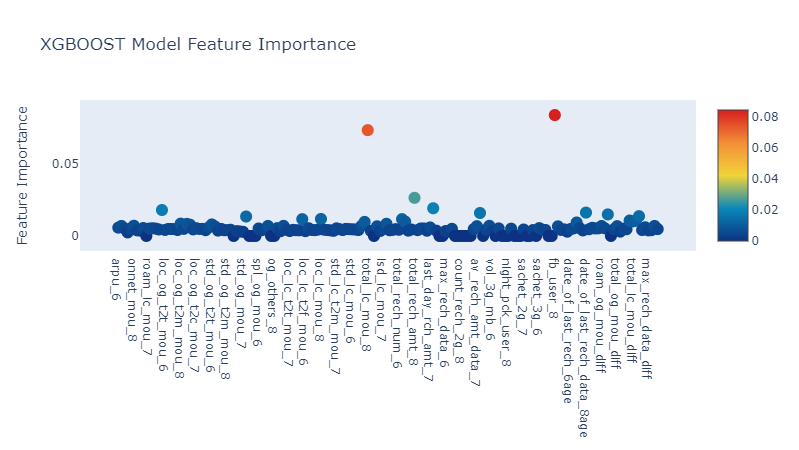

In [214]:
# Scatter plot
trace = go.Scatter(
y = xgb_model.feature_importances_, x = xtrain.columns.values, mode='markers',
marker=dict(
sizemode = 'diameter',
sizeref = 1.3,
size = 12,
color = xgb_model.feature_importances_, colorscale='Portland', showscale=True
),
text = xtrain.columns.values )
data = [trace]
layout= go.Layout( autosize= True,
title= 'XGBOOST Model Feature Importance', hovermode= 'closest',
xaxis= dict( ticklen= 5,
showgrid=False, zeroline=False, showline=False
), yaxis=dict(
title= 'Feature Importance', showgrid=False, zeroline=False,
ticklen= 5,
gridwidth= 2 ),
showlegend= False )
fig = go.Figure(data=data, layout=layout) 
py.iplot(fig,filename='scatter')

In [215]:
# Top 20 Features based on Feature Selection

results = pd.DataFrame()
results['columns'] = xtrain.columns.values
results['importances'] = xgb_model.feature_importances_ *100
results.sort_values(by = 'importances', ascending = False, inplace=True)
results[:20]

columns  importances
140                    fb_user_8     8.425042
80                total_ic_mou_8     7.373121
95              total_rech_amt_8     2.657228
101           last_day_rch_amt_8     1.928844
14                 roam_og_mou_8     1.807566
150  date_of_last_rech_data_8age     1.626946
116           av_rech_amt_data_8     1.599455
157              std_og_mou_diff     1.501350
167          total_rech_amt_diff     1.380293
41                  std_og_mou_8     1.353951
65                  loc_ic_mou_8     1.183165
91              total_rech_num_7     1.172325
59              loc_ic_t2m_mou_8     1.168548
164              spl_ic_mou_diff     1.074669
166          total_rech_num_diff     1.056618
165            total_ic_mou_diff     1.015162
92              total_rech_num_8     1.000077
79                total_ic_mou_7     0.979118
147       date_of_last_rech_8age     0.938369
20              loc_og_t2m_mou_8     0.859037

#### Top Features affecting churn are mentioned below:

- fb_user_8
- total_ic_mou_8
- total_rech_amt_8
- last_day_rch_amt_8
- roam_og_mou_8
- date_of_last_rech_data_8age
- av_rech_amt_data_8
- std_og_mou_diff
- total_rech_amt_diff
- std_og_mou_8
- loc_ic_mou_8
- total_rech_num_7
- loc_ic_t2m_mou_8
- spl_ic_mou_diff
- total_rech_num_diff
- total_ic_mou_diff
- total_rech_num_8
- total_ic_mou_7
- date_of_last_rech_8age
- loc_og_t2m_mou_8

### Recommendations:

Below mentioned Top 5 features are crucial in determining churn and are ranked by their importance, as indicated by the importances values.


- fb_user_8 (8.425042):

  This feature appears to be the most influential in predicting churn. It likely refers  to whether a customer is a Facebook user in the 8th month. A high importance score suggests that customers who use Facebook in the 8th month are more likely to churn. This insight could inform retention strategies, such as targeting Facebook users with personalized offers.
  

- total_ic_mou_8 (7.373121):

  The total incoming call minutes in the 8th month is the second most important feature. High values of this feature suggest more engagement with incoming calls, which may indicate a lower likelihood of churn. Customers who use their phones extensively for incoming calls might be more loyal.
  

- total_rech_amt_8 (2.657228):

  This feature represents the total recharge amount in the 8th month. A higher recharge amount in the 8th month is associated with a reduced likelihood of churn. It indicates that customers who spend more on recharges are less likely to switch to other networks.
  

- last_day_rch_amt_8 (1.928844):

  The last day recharge amount in the 8th month is another important feature. Customers who recharge more on the last day of the month seem to have a lower churn probability. This suggests the importance of end-of-month offers and incentives in retaining customers.
  

- roam_og_mou_8 (1.807566):

  This feature represents the roaming outgoing minutes in the 8th month. It suggests that customers who use their phones for outgoing calls while roaming are less likely to churn. This might indicate that customers who travel frequently and use their phones during roaming are more loyal.
  

**These top 5 features provide valuable insights into customer behavior and their impact on churn. Utilizing this information, the telecom company can design targeted strategies to retain customers, such as tailored offers for Facebook users, incentives for higher recharge amounts, and promotions for end-of-month recharges and roaming users.** 

